In this nootebook covid data from our world in data is used. Currently, data downloaded on 6th September 2022 is used. The data is loaded and then inspected with visually and by statistical tests for the time series which are not too much affected by problems like gaps.

In [1]:
#basic libraries
import numpy as np

import pandas as pd
#for categorial ordering 
from pandas.api.types import CategoricalDtype

import scipy as sp
from scipy.fft import fft, fftfreq

from datetime import date, time, datetime
from dateutil.parser import parse

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

import statsmodels.formula.api as sm
import statsmodels.tsa.stattools as smtime
#We mainly use xgboost
from xgboost import XGBClassifier
import xgboost as xgb

#some skitlearn tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight

#trials
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import sklearn.metrics as met
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

Below the data is loaded. 

In [2]:
#Symbolic in numeric columns
#-           0, can be caused by secrecy 
#/           not given, too uncertain
#0           less than 0.5 but more than 0.0
#( )         strongly changed because of secrecy
#NaN          not given, likely caused by secrecy

#Abweichungen in den Summen durch Runden der Zahlen

#census data frame
path='/home/tobias/ml-testing/Deutschland/'
cdf=pd.read_csv(path+"Zensus11_Datensatz_Bevoelkerung.csv",sep=';',encoding= 'unicode_escape',low_memory=False)
#changing columns to engligh and without tabs
#all property columns done, not yet the keys 
cdf.rename(columns={'RS_Gem':'RS_Gemeinde', 'AEWZ':'population','DEM_1.1':'gender_total','DEM_1.2':'male','DEM_1.3':'female','DEM_2.1':'marital_status_total','DEM_2.2':'marital_status_male','DEM_2.3':'marital_status_female','DEM_2.4':'single_total','DEM_2.5':'single_male','DEM_2.6':'single_female','DEM_2.7':'married_total','DEM_2.8':'married_male','DEM_2.9':'married_female','DEM_2.10':'widowed_total','DEM_2.11':'widowed_male','DEM_2.12':'widowed_female','DEM_2.13':'divorced_total','DEM_2.14':'divorced_male','DEM_2.15':'divorced_female','DEM_2.16':'civil_union_total','DEM_2.17':'civil_union_male','DEM_2.18':'civil_union_female','DEM_2.19':'civil_union_widowed_total','DEM_2.20':'civil_union_widowed_male','DEM_2.21':'civil_union_widowed_female','DEM_2.22':'civil_union_divorced_total','DEM_2.23':'civil_union_divorced_male','DEM_2.24':'civil_union_divorved_female','DEM_2.25':'not_specified_total','DEM_2.26':'not_specified_male','DEM_2.27':'not_specified_female','DEM_3.1':'age_groups1_total','DEM_3.2':'age_groups1_male','DEM_3.3':'age_groups1_female','DEM_3.4':'0_9_total','DEM_3.5':'0_9_male','DEM_3.6':'0_9_female','DEM_3.7':'10_19_total','DEM_3.8':'10_19_male','DEM_3.9':'10_19_female','DEM_3.10':'20_29_total','DEM_3.11':'20_29_male','DEM_3.12':'20_29_female','DEM_3.13':'30_39_total','DEM_3.14':'30_39_male','DEM_3.15':'30_39_female','DEM_3.16':'40_49_total','DEM_3.17':'40_49_male','DEM_3.18':'40_49_female','DEM_3.19':'50_59_total','DEM_3.20':'50_59_male','DEM_3.21':'50_59_female','DEM_3.22':'60_69_total','DEM_3.23':'60_69_male','DEM_3.24':'60_69_female','DEM_3.25':'70_79_total','DEM_3.26':'70_79_male','DEM_3.27':'70_79_female','DEM_3.28':'over_80_total','DEM_3.29':'over_80_male','DEM_3.30':'over_80_female','DEM_4.1':'age_groups2_total','DEM_4.2':'age_groups2_male','DEM_4.3':'age_groups2_female','DEM_4.4':'total_0_2','DEM_4.5':'male_0_2','DEM_4.6':'female_0_2','DEM_4.7':'total_3_5','DEM_4.8':'male_3_5','DEM_4.9':'female_3_5','DEM_4.10':'total_6_14','DEM_4.11':'male_6_14','DEM_4.12':'female_6_14','DEM_4.13':'total_15_17','DEM_4.14':'male_15_17','DEM_4.15':'female_15_17','DEM_4.16':'total_18_24','DEM_4.17':'male_18_24','DEM_4.18':'female_18_24','DEM_4.19':'total_25_29','DEM_4.20':'male_25_29','DEM_4.21':'female_25_29','DEM_4.22':'total_30_39','DEM_4.23':'male_30_39','DEM_4.24':'female_30_39','DEM_4.25':'total_40_49','DEM_4.26':'male_40_49','DEM_4.27':'female_40_49','DEM_4.28':'total_50_64','DEM_4.29':'male_50_64','DEM_4.30':'female_50_64','DEM_4.31':'total_65_74','DEM_4.32':'male_65_74','DEM_4.33':'female_65_74','DEM_4.34':'total_75_and_older','DEM_4.35':'male_75_and_older','DEM_4.36':'female_75_and_older','DEM_5.1':'citizen_total','DEM_5.2':'citizen_german','DEM_5.3':'citizen_foreign','DEM_5.4':'citizen_eu27','DEM_5.5':'citizen_other_europe','DEM_5.6':'citizen_other_continents','DEM_5.7':'citizen_other','DEM_6.1':'birth_country_total','DEM_6.2':'birth_country_germany','DEM_6.3':'birth_country_foreign','DEM_6.4':'birth_country_eu27','DEM_6.5':'birth_country_other_europe','DEM_6.6':'birth_country_other_continents','DEM_6.7':'birth_country_other','REL_1.1':'religion_total','REL_1.2':'religion_catholic','REL_1.3':'religion_protestant','REL_1.4':'religion_other','MIG_1.1':'migration_background_all','MIG_1.2':'migration_background_no','MIG_1.3':'migration_background_yes','MIG_1.4':'migration_background_foreign_all','MIG_1.5':'migration_background_foreign_foreign_born','MIG_1.6':'migration_background_foreign_german_born','MIG_1.7':'migration_background_german_all','MIG_1.8':'migration_background_german_foreign_born','MIG_1.9':'migration_background_german_german_born','MIG_1.10':'migration_background_german_german_born_mig_2parents','MIG_1.11':'migration_background_german_german_born_mig_1parents','MIG_2.1':'migration_all_years','MIG_2.2':'migration_56-59','MIG_2.3':'migration_60-69','MIG_2.4':'migration_70-79','MIG_2.5':'migration_80-89','MIG_2.6':'migration_90-99','MIG_2.7':'migration_00-11','MIG_2.8':'migration_year_nan','MIG_3.1':'migration_all_regions','MIG_3.2':'migration_eu27','MIG_3.3':'migration_rest_europes','MIG_3.4':'migration_other_continents','MIG_3.5':'migration_regions_nan','ERW_1.1':'employment_status_all','ERW_1.2':'employment_status_male','ERW_1.3':'employment_status_female','ERW_1.4':'employment_prefering_all','ERW_1.5':'employment_prefered_male','ERW_1.6':'employment_preferred_female','ERW_1.7':'employed_all','ERW_1.8':'employed_male','ERW_1.9':'employed_female','ERW_1.10':'unemployed_all','ERW_1.11':'unemployed_male','ERW_1.12':'unemployed_female','ERW_1.13':'not_employable_all','ERW_1.14':'not_employable_male','ERW_1.15':'not_employable_female','ERW_2.1':'profession_status_all','ERW_2.2':'worker_employee','ERW_2.3':'officier','ERW_2.4':'self-employed_single','ERW_2.5':'self_employed_company','ERW_2.6':'helpers_family','ERW_3.1':'profession_all','ERW_3.2':'manager','ERW_3.3':'academic','ERW_3.4':'technical_trained','ERW_3.5':'office','ERW_3.6':'sale','ERW_3.7':'agriculture_trained','ERW_3.8':'tradesman','ERW_3.9':'workers','ERW_3.10':'unskilled_laborers','ERW_3.11':'soldier','ERW_4.1':'branches','ERW_4.2':'agriculture','ERW_4.3':'production','ERW_4.4':'mining_and_industry','ERW_4.5':'distribution','ERW_4.6':'building','ERW_4.7':'sale_car_repaing_dining_traffic_communication','ERW_4.8':'sale_car_repair_dining','ERW_4.9':'traffic_communication','ERW_4.10':'other_services','ERW_4.11':'finance_insurance','ERW_4.12':'real_estate_science','ERW_4.13':'public_administration','ERW_4.14':'public_private_services','ERW_4.15':'branch_nan','BIL_2.1':'in_education_level_total','BIL_2.2':'in_education_primary','BIL_2.3':'in_education_secondary1','BIL_2.4':'in_education_secondary2','BIL_3.1':'in_education_school_form_total','BIL_3.2':'in_education_elementary','BIL_3.3':'in_education_secondary_basic','BIL_3.4':'in_education_secondary_middle','BIL_3.5':'in_education_grammar','BIL_3.6':'in_education_secondary_general','BIL_3.7':'in_education_school_other','BIL_4.1':'educated_school_15_and_older','BIL_4.2':'not_and_not_yet_educated','BIL_4.3':'no_school_certificate','BIL_4.4':'school_time_not_finished','BIL_4.5':'basic_secondary','BIL_4.6':'middle_secondary','BIL_4.7':'middle_secondary_finished','BIL_4.8':'in_grammar_school','BIL_4.9':'qualified_for_community_college','BIL_4.10':'qualified_for_university','BIL_5.1':'profession_education_total','BIL_5.2':'no_profession_education','BIL_5.3':'apprenticeship','BIL_5.4':'professional_school','BIL_5.5':'professional_academy','BIL_5.6':'community_college','BIL_5.7':'university','BIL_5.8':'PhD_and_MD'}, inplace=True)
column_names=list(cdf.columns)
print(f"columns are {column_names}")
print(f"the transition from key to integer columns {column_names[7:9]}")

print(f"number of colums {len(column_names)}")

columns are ['AGS_12', 'RS_Land', 'RS_RB_NUTS2', 'RS_Kreis', 'RS_VB', 'RS_Gemeinde', 'Name', 'Reg_Hier', 'population', 'gender_total', 'male', 'female', 'marital_status_total', 'marital_status_male', 'marital_status_female', 'single_total', 'single_male', 'single_female', 'married_total', 'married_male', 'married_female', 'widowed_total', 'widowed_male', 'widowed_female', 'divorced_total', 'divorced_male', 'divorced_female', 'civil_union_total', 'civil_union_male', 'civil_union_female', 'civil_union_widowed_total', 'civil_union_widowed_male', 'civil_union_widowed_female', 'civil_union_divorced_total', 'civil_union_divorced_male', 'civil_union_divorved_female', 'not_specified_total', 'not_specified_male', 'not_specified_female', 'age_groups1_total', 'age_groups1_male', 'age_groups1_female', '0_9_total', '0_9_male', '0_9_female', '10_19_total', '10_19_male', '10_19_female', '20_29_total', '20_29_male', '20_29_female', '30_39_total', '30_39_male', '30_39_female', '40_49_total', '40_49_mal

We are now checking the types of some columns. 

In [3]:
for i in range(12):
    print(f"type of column {column_names[i]} is {cdf[column_names[i]].dtypes}")

type of column AGS_12 is int64
type of column RS_Land is int64
type of column RS_RB_NUTS2 is float64
type of column RS_Kreis is float64
type of column RS_VB is float64
type of column RS_Gemeinde is float64
type of column Name is object
type of column Reg_Hier is object
type of column population is int64
type of column gender_total is int64
type of column male is object
type of column female is object


The key columns are mostly integers and partly objects. We will whether they can be stored better as categories. In the property columns many are objects. That is not good for using them, thus we change them to numbers. That requires the addition of quality indicators to not loose the not numeric information.

In [4]:
print(f"number of rows in data frame is {len(cdf)}")
print(f"number of unique 'Name' is {cdf.Name.nunique()}")
print(f"number of unique 'Reg_Hier' is {cdf.Reg_Hier.nunique()}")
print(f"unique values of is {cdf.Reg_Hier.unique()}")


number of rows in data frame is 12544
number of unique 'Name' is 11735
number of unique 'Reg_Hier' is 6
unique values of is ['Bund' 'Land' 'Gemeinde' 'Stadtkreis/kreisfreie Stadt/Landkreis'
 'Gemeindeverband' 'Regierungsbezirk/NUTS2']


While Name is nearly the same number of values and there are rows, there much less in Reg_Hier. Reg_Hier is the level in 
administartion hierarchie, thus we also set the order. 

In [5]:
cdf['Reg_hier'] = CategoricalDtype(categories=['Gemeinde', 'Gemeindeverband', 'Stadtkreis/kreisfreie Stadt/Landkreis','Regierungsbezirk/NUTS2','Land','Bund'], ordered=True)


We are now checking the states (Land) with the fwest rows. That should be the city states, where it varies whther they are subdivided or not.

In [6]:
print(cdf.AGS_12.groupby(cdf['RS_Land']).count())
print(cdf.iloc[:,0:8].loc[cdf['RS_Land']==0])
print(cdf.iloc[:,0:8].loc[cdf['RS_Land']==2])
print(cdf.iloc[:,0:8].loc[cdf['RS_Land']==4])
print(cdf.iloc[:,0:8].loc[cdf['RS_Land']==11])

RS_Land
0        1
1     1219
2        3
3     1209
4        5
5      455
6      456
7     2506
8     1150
9     2160
10      59
11       3
12     491
13     905
14     583
15     252
16    1087
Name: AGS_12, dtype: int64
   AGS_12  RS_Land  RS_RB_NUTS2  RS_Kreis  RS_VB  RS_Gemeinde         Name  \
0       0        0          NaN       NaN    NaN          NaN  Deutschland   

  Reg_Hier  
0     Bund  
           AGS_12  RS_Land  RS_RB_NUTS2  RS_Kreis  RS_VB  RS_Gemeinde  \
1220            2        2          NaN       NaN    NaN          NaN   
1221         2000        2          0.0       0.0    NaN          NaN   
1222  20000000000        2          0.0       0.0    0.0          0.0   

                               Name                               Reg_Hier  
1220                        Hamburg                                   Land  
1221  Hamburg, Freie und Hansestadt  Stadtkreis/kreisfreie Stadt/Landkreis  
1222  Hamburg, Freie und Hansestadt                               Gemei

For Berlin and Hamburg, there are no subdivision, just different entries on the different bhiearchical levels. For Bremen there are two city subdivision. The basic key is Gemeinde. There are partly several of it, but they are just duplicated and duplicated can be avoided by setting Reg_Hier to Gemeinde.

For now we just work on the city level, later we might do more research to add census or other information on subdivision of city levels for big cities. 


In [7]:
cdf.married_total.value_counts()
cdf.married_total.dtypes
print(cdf[column_names[18]])
#cdf.married_total=cdf.married_total.replace('\(','',regex=True).replace('\)','',regex=True).replace('-','0').astype(int) #later better method needed to not 
#remove () - of all numeric columns
#() means secret datat thus should be recorced and best replaced with higher level data when possible 
for i in range(8, 223):
    print(i)
    new="qual_"+column_names[i]
    if cdf[column_names[i]].dtypes==object:
        print(new)
        cdf[new] =cdf[column_names[i]].str.contains('\(')
        print(cdf[new])
    else:  #create dummy 
        cdf[new] = 0   
    cdf[column_names[i]]=cdf[column_names[i]].replace('\(','',regex=True).replace('\)','',regex=True).replace('-','0').replace('/','-2').fillna(-1).astype(int)
    
#to have some indication for it
#works but is likely not best use
print(cdf.married_total.describe())
print(cdf.citizen_german.describe())
print(cdf.PhD_and_MD.describe())
print(cdf.qual_PhD_and_MD.describe())

0        36669868
1         1280114
2           31073
3           31073
4           83790
           ...   
12539         159
12540        2720
12541        1776
12542          73
12543         871
Name: married_total, Length: 12544, dtype: object
8
9
10
qual_male
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_male, Length: 12544, dtype: bool
11
qual_female
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_female, Length: 12544, dtype: bool
12
13
qual_marital_status_male
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_marital_status_male, Length: 12544, dtype: bool
14
qual_marital_status_female
0        False


0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543     True
Name: qual_10_19_total, Length: 12544, dtype: bool
46
qual_10_19_male
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_10_19_male, Length: 12544, dtype: bool
47
qual_10_19_female
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543     True
Name: qual_10_19_female, Length: 12544, dtype: bool
48
qual_20_29_total
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542     True
12543    False
Name: qual_20_29_total, Length: 12544, dtype: bool
49
qual_20_29_male
0        False
1        False
2        False
3        Fal

/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

58
qual_50_59_male
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_50_59_male, Length: 12544, dtype: bool
59
qual_50_59_female
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543     True
Name: qual_50_59_female, Length: 12544, dtype: bool
60
qual_60_69_total
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_60_69_total, Length: 12544, dtype: bool
61
qual_60_69_male
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_60_69_male, Length: 12544, dtype: bool


/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

62
qual_60_69_female
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_60_69_female, Length: 12544, dtype: bool
63
qual_70_79_total
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_70_79_total, Length: 12544, dtype: bool
64
qual_70_79_male
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_70_79_male, Length: 12544, dtype: bool
65
qual_70_79_female
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_70_79_female, Length: 12544, dtype: bool
66
qual_over_80_total
0        False
1        False
2 

/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

72
qual_total_0_2
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_total_0_2, Length: 12544, dtype: bool
73
qual_male_0_2
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_male_0_2, Length: 12544, dtype: bool
74
qual_female_0_2
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_female_0_2, Length: 12544, dtype: bool
75
qual_total_3_5
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541     True
12542    False
12543     True
Name: qual_total_3_5, Length: 12544, dtype: bool
76
qual_male_3_5
0        False
1        False
2        False
3        F

/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

78
qual_total_6_14
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543     True
Name: qual_total_6_14, Length: 12544, dtype: bool
79
qual_male_6_14
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_male_6_14, Length: 12544, dtype: bool
80
qual_female_6_14
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_female_6_14, Length: 12544, dtype: bool
81
qual_total_15_17
0        False
1        False
2        False
3        False
4        False
         ...  
12539     True
12540    False
12541    False
12542    False
12543    False
Name: qual_total_15_17, Length: 12544, dtype: bool
82
qual_male_15_17
0        False
1        False
2        Fals

/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

83
qual_female_15_17
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_female_15_17, Length: 12544, dtype: bool
84
qual_total_18_24
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543     True
Name: qual_total_18_24, Length: 12544, dtype: bool
85
qual_male_18_24
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541     True
12542    False
12543    False
Name: qual_male_18_24, Length: 12544, dtype: bool
86
qual_female_18_24
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_female_18_24, Length: 12544, dtype: bool
87
qual_total_25_29
0        False
1        False
2   

/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

89
qual_female_25_29
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_female_25_29, Length: 12544, dtype: bool
90
qual_total_30_39
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542     True
12543    False
Name: qual_total_30_39, Length: 12544, dtype: bool
91
qual_male_30_39
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_male_30_39, Length: 12544, dtype: bool
92
qual_female_30_39
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_female_30_39, Length: 12544, dtype: bool
93
qual_total_40_49
0        False
1        False
2   

/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543     True
Name: qual_male_40_49, Length: 12544, dtype: bool
95
qual_female_40_49
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_female_40_49, Length: 12544, dtype: bool
96
qual_total_50_64
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_total_50_64, Length: 12544, dtype: bool
97
qual_male_50_64
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_male_50_64, Length: 12544, dtype: bool
98
qual_female_50_64
0        False
1        False
2        False
3        Fa

/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

101
qual_female_65_74
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_female_65_74, Length: 12544, dtype: bool
102
qual_total_75_and_older
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_total_75_and_older, Length: 12544, dtype: bool
103
qual_male_75_and_older
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_male_75_and_older, Length: 12544, dtype: bool
104
qual_female_75_and_older
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_female_75_and_older, Length: 12544, dtype: bool
105
106


/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

108
qual_citizen_eu27
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_citizen_eu27, Length: 12544, dtype: bool
109
qual_citizen_other_europe
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_citizen_other_europe, Length: 12544, dtype: bool
110
qual_citizen_other_continents
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_citizen_other_continents, Length: 12544, dtype: bool
111
qual_citizen_other
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_citizen_other, Length: 12544, dtype: bool
11

/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_birth_country_foreign, Length: 12544, dtype: bool
115
qual_birth_country_eu27
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_birth_country_eu27, Length: 12544, dtype: bool
116
qual_birth_country_other_europe
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_birth_country_other_europe, Length: 12544, dtype: bool
117
qual_birth_country_other_continents
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540     True
12541    False
12542    False
12543    False
Name: qual_birth_country_other_continents, Length: 

/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

122
qual_religion_other
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_religion_other, Length: 12544, dtype: bool
123
124
125
qual_migration_background_yes
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_migration_background_yes, Length: 12544, dtype: object
126
qual_migration_background_foreign_all
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_migration_background_foreign_all, Length: 12544, dtype: object
127
qual_migration_background_foreign_foreign_born
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12

/tmp/ipykernel_8634/1310224102.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] = 0
/tmp/ipykernel_8634/1310224102.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] = 0
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_na

129
qual_migration_background_german_all
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_migration_background_german_all, Length: 12544, dtype: object
130
qual_migration_background_german_foreign_born
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_migration_background_german_foreign_born, Length: 12544, dtype: object
131
qual_migration_background_german_german_born
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_migration_background_german_german_born, Length: 12544, dtype: object
132
qual_migration_background_german_german_born_mig_2parents
0        False
1        False
2        False
3        False
4      

/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

138
qual_migration_80-89
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_migration_80-89, Length: 12544, dtype: object
139
qual_migration_90-99
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_migration_90-99, Length: 12544, dtype: object
140
qual_migration_00-11
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_migration_00-11, Length: 12544, dtype: object
141
qual_migration_year_nan
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_migration_year_nan, Length: 12544, dtype: object
142
qu

/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_migration_regions_nan, Length: 12544, dtype: object
147
148
149
150
151
152
153
154
155
156
qual_unemployed_all
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_unemployed_all, Length: 12544, dtype: object
157
qual_unemployed_male
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_unemployed_male, Length: 12544, dtype: object
158
qual_unemployed_female
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_unemployed_female, Length: 12544, dtype: 

/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

166
qual_self_employed_company
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_self_employed_company, Length: 12544, dtype: object
167
qual_helpers_family
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_helpers_family, Length: 12544, dtype: object
168
169
qual_manager
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_manager, Length: 12544, dtype: object
170
171
172
173
174
qual_agriculture_trained
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_agriculture_trained, Length: 12544, dtyp

/tmp/ipykernel_8634/1310224102.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] = 0
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fr

181
qual_production
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_production, Length: 12544, dtype: object
182
qual_mining_and_industry
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_mining_and_industry, Length: 12544, dtype: object
183
qual_distribution
0        False
1        False
2         True
3         True
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_distribution, Length: 12544, dtype: object
184
qual_building
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_building, Length: 12544, dtype: object
185
qual_sale_car_repaing_dining_t

/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

191
qual_public_administration
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_public_administration, Length: 12544, dtype: object
192
qual_public_private_services
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_public_private_services, Length: 12544, dtype: object
193
qual_branch_nan
0        False
1         True
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_branch_nan, Length: 12544, dtype: object
194
195
196
197
qual_in_education_secondary2
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_in_education_seconda

/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

205
206
207
qual_no_school_certificate
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_no_school_certificate, Length: 12544, dtype: object
208
qual_school_time_not_finished
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_school_time_not_finished, Length: 12544, dtype: object
209
210
211
212
qual_in_grammar_school
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_in_grammar_school, Length: 12544, dtype: object
213
214
215
216
217
218
219
qual_professional_academy
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
1

/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_8634/1310224102.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

We are now checking whether the changes wroked.  

In [8]:
print(column_names[125])
print(cdf.migration_background_yes)
print(cdf.qual_PhD_and_MD)

migration_background_yes
0        15297460
1          334410
2           13050
3           13050
4           44330
           ...   
12539          -1
12540          -1
12541          -1
12542          -1
12543          -1
Name: migration_background_yes, Length: 12544, dtype: int64
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_PhD_and_MD, Length: 12544, dtype: object


Some properties are available for nearly all units.

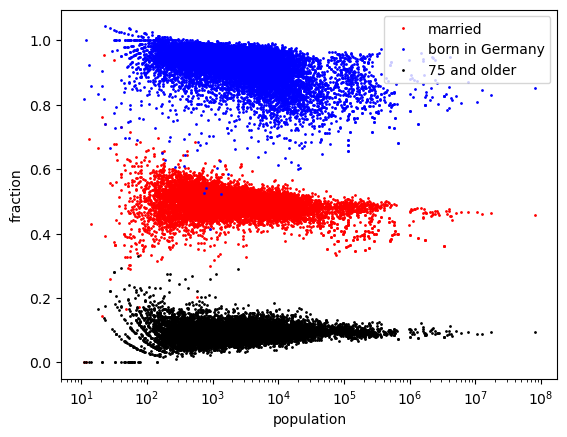

In [9]:

plt.plot(cdf['population'],cdf['married_total']/cdf['population'],'o',ms=1,color='red',label='married') 
plt.plot(cdf['population'],cdf['birth_country_germany']/cdf['population'],'o',ms=1,color='blue',label='born in Germany')
plt.plot(cdf['population'],cdf['total_75_and_older']/cdf['population'],'o',ms=1,color='black',label='75 and older')
plt.legend(loc="best")
plt.xlabel("population")
plt.ylabel("fraction")
#plt.yscale("log")
plt.xscale("log")

However, some of them are unreliable because they were changed for conserving privacy. Below they are displayed. The problems is larger for units with small population and for properties which are rare as fraction of population. 

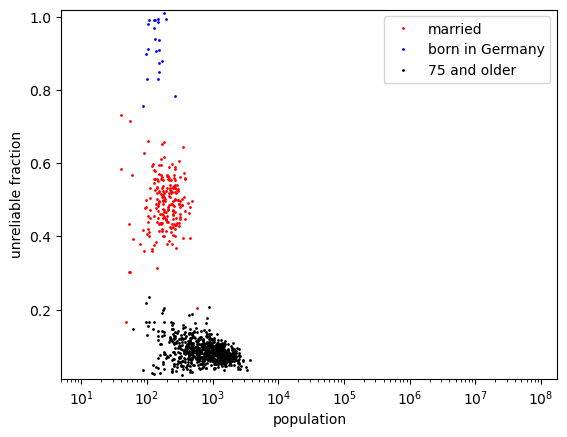

In [10]:

plt.plot(cdf['population'],(cdf['married_total']*cdf['qual_married_total'])/cdf['population'],'o',ms=1,color='red',label='married') 
plt.plot(cdf['population'],(cdf['birth_country_germany']*cdf['qual_birth_country_germany'])/cdf['population'],'o',ms=1,color='blue',label='born in Germany')
plt.plot(cdf['population'],(cdf['total_75_and_older']*cdf['qual_total_75_and_older'])/cdf['population'],'o',ms=1,color='black',label='75 and older')
plt.legend(loc="best")
plt.xlabel("population")
plt.ylabel("unreliable fraction")
#plt.yscale("log")
plt.ylim(0.01,1.02)
plt.xscale("log")

Some properties are only available for large units, usually when population is above 10000.

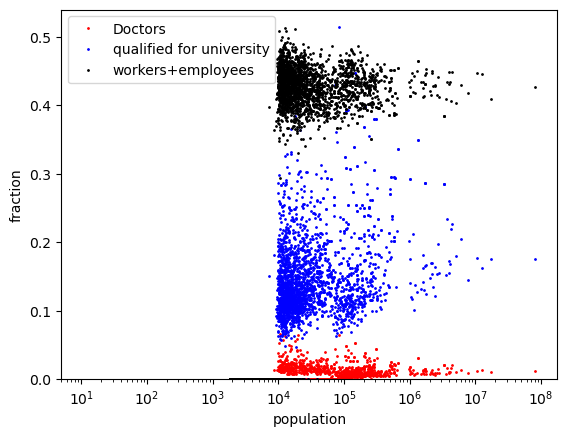

In [11]:
#first plotting takes time 
plt.plot(cdf['population'],cdf['PhD_and_MD']/cdf['population'],'o',ms=1,color='red',label='Doctors') 
plt.plot(cdf['population'],cdf['qualified_for_university']/cdf['population'],'o',ms=1,color='blue',label='qualified for university')
plt.plot(cdf['population'],cdf['worker_employee']/cdf['population'],'o',ms=1,color='black',label='workers+employees')
plt.legend(loc="best")
plt.xlabel("population")
plt.ylabel("fraction")
plt.ylim(0,0.54)
#plt.yscale("log")
plt.xscale("log")

In [12]:
#could use kreise and substract the cities in them to get some informations also for lower levels

Now we load the federal election data of 2021.

In [13]:
wdf=pd.read_csv(path+"btw21_wbz_ergebnisse.csv",sep=';',low_memory=False,skiprows=[1,1]) #row 1 is kind an additional header row
#it is not read well when included and we anyway need to translate the column names
print(wdf.head)

<bound method NDFrame.head of        Wahlkreis  Land  Regierungsbezirk  Kreis  Verbandsgemeinde  Gemeinde  \
0              1     1                 0      1                 0         0   
1              1     1                 0      1                 0         0   
2              1     1                 0      1                 0         0   
3              1     1                 0      1                 0         0   
4              1     1                 0      1                 0         0   
...          ...   ...               ...    ...               ...       ...   
94663        296    10                 0     41               519       519   
94664        296    10                 0     41               519       519   
94665        296    10                 0     41               519       519   
94666        296    10                 0     41               519       519   
94667        296    10                 0     41               519       519   

      Kennziffer Urne

We are looking on the column names and translate the election system ones and the translate name of the partyies which made it into parliament.

In [14]:

#done ar main parties, voters, not yet level and minore parties
print(wdf.columns[11:30])
wdf.rename(columns={'Wahlberechtigte (A)':'eligible_voters','Wahlberechtigte mit Sperrvermerk (A2)':'eligible_voters_not_locally' ,'Wahlberechtigte ohne Sperrvermerk (A1)':'eligible_voters_locally','Wahlberechtigte nach § 25 Abs. 2 BWO (A3)':'eligile_voters_added','CDU.1':'christian_democrats_party_votes','CDU':'christian_democrats_person_votes','Wählende (B)':'voters' ,'Wählende mit Wahlschein (B1)':'voters_not_local','Ungültige':'not_valid_votes_person_votes','Gültige':'valid_votes_person_votes','Ungültige.1':'not_valid_votes_party_votes','Gültige.1':'valid_votes_party_votes','SPD.1':'social_democrats_party_votes','SPD':'social_democrats_person_votes','CSU.1':'christian_socials_party_votes','CSU':'christian_socials_person_votes','FDP.1':'libertarians_party_votes','FDP':'libertarians_person_votes','DIE LINKE.1':'lefts_party_votes','DIE LINKE':'lefts_person_votes','AfD.1':'alternative_for_germany_party_votes','AfD':'alternative_for_germany_person_votes','GRÜNE.1':'greens_party_votes','GRÜNE':'greens_person_votes',},inplace=True)
print(wdf.columns[11:30])
print(wdf.columns[51:70])

Index(['Wahlberechtigte (A)', 'Wahlberechtigte ohne Sperrvermerk (A1)',
       'Wahlberechtigte mit Sperrvermerk (A2)',
       'Wahlberechtigte nach § 25 Abs. 2 BWO (A3)', 'Wählende (B)',
       'Wählende mit Wahlschein (B1)', 'Ungültige', 'Gültige', 'CDU', 'SPD',
       'AfD', 'FDP', 'DIE LINKE', 'GRÜNE', 'CSU', 'FREIE WÄHLER', 'Die PARTEI',
       'Tierschutzpartei', 'NPD'],
      dtype='object')
Index(['eligible_voters', 'eligible_voters_locally',
       'eligible_voters_not_locally', 'eligile_voters_added', 'voters',
       'voters_not_local', 'not_valid_votes_person_votes',
       'valid_votes_person_votes', 'christian_democrats_person_votes',
       'social_democrats_person_votes', 'alternative_for_germany_person_votes',
       'libertarians_person_votes', 'lefts_person_votes',
       'greens_person_votes', 'christian_socials_person_votes', 'FREIE WÄHLER',
       'Die PARTEI', 'Tierschutzpartei', 'NPD'],
      dtype='object')
Index(['LKR', 'SSW', 'Team Todenhöfer', 'UNABHÄNGIGE',

We now look on the elegible voeters and the fraction of one party.

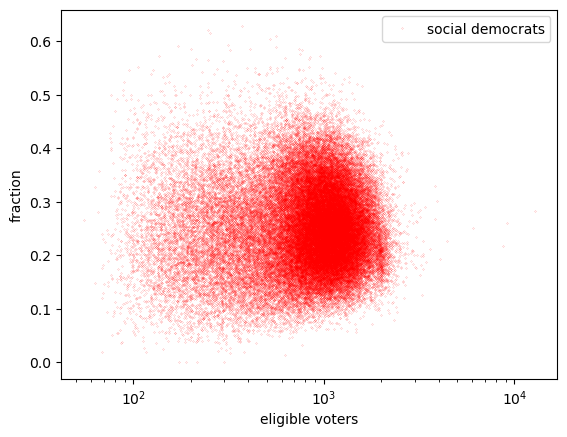

In [15]:
plt.plot(wdf['eligible_voters'],wdf['social_democrats_party_votes']/wdf['valid_votes_party_votes'],'o',ms=0.1,color='red',label='social democrats') 
plt.legend(loc="best")
plt.xlabel("eligible voters")
plt.ylabel("fraction")
#plt.yscale("log")
plt.xscale("log")

The data is per election district. We now group by Gemeinde to get the smallest level possible in the census data. 

Index(['Wahlkreis', 'Land', 'Regierungsbezirk', 'Kreis', 'Verbandsgemeinde',
       'Gemeinde', 'Kennziffer Urnenwahlbezirke nach § 68 BWO',
       'Kennziffer Briefwahlzugehörigkeit', 'Gemeinde Name', 'Wahlbezirk'],
      dtype='object')
(94668, 107)
(10955, 102)
               Wahlkreis  Land  Regierungsbezirk  Kreis  Verbandsgemeinde  \
Gemeinde Name                                                               
Aach               203.0   7.0               2.0   35.0            5007.0   
Aach, Stadt        287.0   8.0               3.0   35.0            5001.0   
Aachen, Stadt       87.0   5.0               3.0   34.0               2.0   
Aalen, Stadt       270.0   8.0               1.0   36.0            5001.0   
Aarbergen          178.0   6.0               4.0   39.0               1.0   
Aasbüttel            3.0   1.0               0.0   61.0            5168.0   
Abenberg, St       246.0   9.0               5.0   76.0             111.0   
Abensberg, St      228.0   9.0            

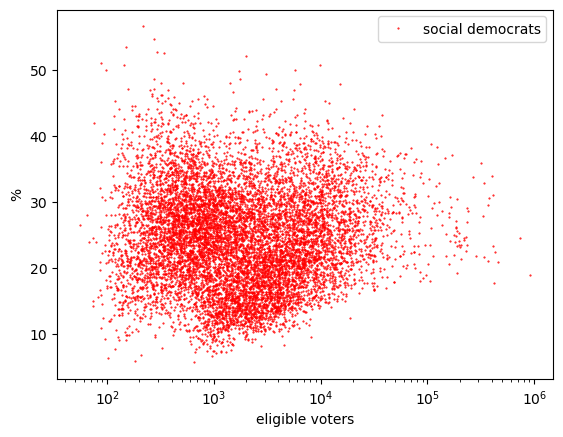

In [16]:
print(wdf.columns[0:10])
print(wdf.shape)
#goup by Gemeinde is either (village,city)  in voter file
wdf2=wdf.groupby(wdf['Gemeinde Name']).sum(numeric_only=True)
#mean is used for numbers which are keys common to Gemeinde
wdf3=wdf.groupby(wdf['Gemeinde Name']).mean(numeric_only=True)#.astype(int)

wdf2['Wahlkreis']=wdf3['Wahlkreis']
wdf2['Land']=wdf3['Land']
wdf2['Regierungsbezirk']=wdf3['Regierungsbezirk']
wdf2['Kreis']=wdf3['Kreis']
wdf2['Verbandsgemeinde']=wdf3['Verbandsgemeinde']
wdf2['Gemeinde']=wdf3['Gemeinde']

print(wdf2.shape)
plt.plot(wdf2['eligible_voters'],100*wdf2['social_democrats_party_votes']/wdf2['valid_votes_party_votes'],'o',ms=0.5,color='red',label='social democrats') 
plt.legend(loc="best")
plt.xlabel("eligible voters")
plt.ylabel("%")
#plt.yscale("log")
plt.xscale("log")
print(wdf2.iloc[0:10,0:10])
print(wdf2.columns)

In [17]:
#select only villages in census data
print(cdf.columns)
cdf2=cdf.loc[cdf['Reg_Hier']=='Gemeinde']
#we are also selecting Land and Kreis to make it easier to check name of this ids (this ids are the most important ones
#because they exist for nearly all Gemeinde)
#should be past as additional column for cdf2 also 
cdf3=cdf.loc[cdf['Reg_Hier']=='Stadtkreis/kreisfreie Stadt/Landkreis']
print(cdf3)
cdf4=cdf.loc[cdf['Reg_Hier']=='Land']
cdf4.loc[:,'land_name']=cdf4.loc[:,'Name']#warning but works
cdf4s=cdf4[['RS_Land','land_name']]
cdf4s['unification']='West'  #classify states as existing before and after german unification as east (berlin east here) and west 
cdf4s.unification[cdf4s.RS_Land>10]='East'
print(cdf4s)
#create dictionary of Name and RS_Land to have names of Land in cdf2 
#print(cdf2['Land'])
print(len(cdf2))
cdf2=cdf2.merge(cdf4s,left_on='RS_Land',right_on='RS_Land')  
print(len(cdf2))
#the same for Kreis
cdf3.loc[:,'kreis_name']=cdf3.loc[:,'Name']
#create new kreis-id as key because old is only unique within each Land 
cdf3.loc[:,'kreis_id']=cdf3.loc[:,'RS_Kreis']+100*cdf3.loc[:,'RS_Land']
cdf2.loc[:,'kreis_id']=cdf2.loc[:,'RS_Kreis']+100*cdf2.loc[:,'RS_Land']
cdf3s=cdf3[['kreis_id','kreis_name']]
print(cdf3s)
print(cdf2.kreis_id.isnull().sum())
print(cdf3s.kreis_id.isnull().sum())
print(cdf2.Name[1200:1210])
print(cdf2.loc[1113:1129,['Name','RS_Kreis','land_name','kreis_id','population']])
print(cdf2[cdf2.Name.str.contains('Oldenburg')])
#cdf2=cdf2.merge(cdf3s,left_on='kreis_id',right_on='kreis_id')  somehow second merge does not work for now not done
#print(cdf2.loc[1113:1129,['Name','RS_Kreis','land_name','kreis_id','population']])
print(len(cdf2))
print(len(cdf))
print(cdf2[cdf2.Name.str.contains('Oldenburg')])

Index(['AGS_12', 'RS_Land', 'RS_RB_NUTS2', 'RS_Kreis', 'RS_VB', 'RS_Gemeinde',
       'Name', 'Reg_Hier', 'population', 'gender_total',
       ...
       'qual_qualified_for_community_college', 'qual_qualified_for_university',
       'qual_profession_education_total', 'qual_no_profession_education',
       'qual_apprenticeship', 'qual_professional_school',
       'qual_professional_academy', 'qual_community_college',
       'qual_university', 'qual_PhD_and_MD'],
      dtype='object', length=439)
       AGS_12  RS_Land  RS_RB_NUTS2  RS_Kreis  RS_VB  RS_Gemeinde  \
3        1001        1          0.0       1.0    NaN          NaN   
5        1002        1          0.0       2.0    NaN          NaN   
7        1003        1          0.0       3.0    NaN          NaN   
9        1004        1          0.0       4.0    NaN          NaN   
10       1051        1          0.0      51.0    NaN          NaN   
...       ...      ...          ...       ...    ...          ...   
12192   16073   

/tmp/ipykernel_8634/889639970.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  print(cdf3)
/tmp/ipykernel_8634/889639970.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf4.loc[:,'land_name']=cdf4.loc[:,'Name']#warning but works
/tmp/ipykernel_8634/889639970.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf4s['unification']='West'  #classify states as existing befo

0           Flensburg, Stadt
1     Kiel, Landeshauptstadt
2         Lübeck, Hansestadt
3          Neumünster, Stadt
4         Brunsbüttel, Stadt
5               Heide, Stadt
6                    Averlak
7                   Brickeln
8                   Buchholz
9        Burg (Dithmarschen)
10                    Dingen
11                   Eddelak
12                  Eggstedt
13                  Frestedt
14                Großenrade
15                  Hochdonn
16                     Kuden
17                 Quickborn
18       Sankt Michaelisdonn
19              Süderhastedt
Name: Name, dtype: object


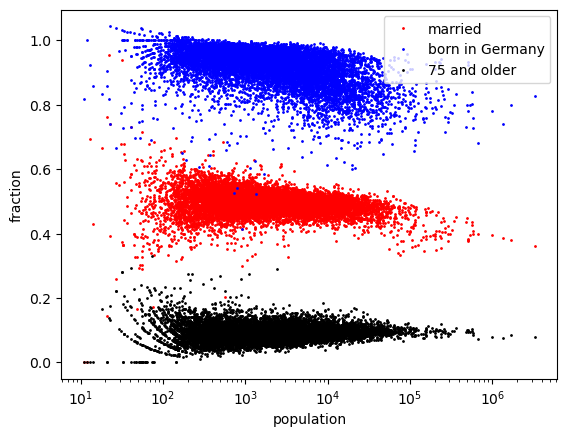

In [18]:
print(cdf2.Name[0:20])
plt.plot(cdf2['population'],cdf2['married_total']/cdf2['population'],'o',ms=1,color='red',label='married') 
plt.plot(cdf2['population'],cdf2['birth_country_germany']/cdf2['population'],'o',ms=1,color='blue',label='born in Germany')
plt.plot(cdf2['population'],cdf2['total_75_and_older']/cdf2['population'],'o',ms=1,color='black',label='75 and older')
plt.legend(loc="best")
plt.xlabel("population")
plt.ylabel("fraction")
#plt.yscale("log")
plt.xscale("log")

That gets about the same range of populations. There are some differences, at both ends. Very small villages are missing in the election data. They are likely in lkkarger villages included. Probably, they are not so important, since their overall population is small and also the census data on them not so useful. 

On the other end there are larger cities in the population data than in the election data. The largest two cities Hamburg and Berlin are thus certainly split up in the election data. We are also checking other large cities.

In [19]:
print(wdf2[(wdf2['eligible_voters']>300000)])  #usually only teil , probably wahlkreis
print(wdf2[(wdf2['eligible_voters']>150000)]) 
#still trying to find mmacthes in Name
#print(wdf2.str.contain(wdf2['Gemeinde Name'==Frankfurt]))
#print(cdf2)
print(cdf2[cdf2.Name.str.contains('Frankfurt')])
print(wdf2[wdf2.index.str.contains('Frankfurt')])
print(wdf[wdf['Gemeinde Name'].str.contains('Frankfurt am')])
#is complte it is just that teil are removed

                                                     Wahlkreis  Land  \
Gemeinde Name                                                          
Bremen, Stadt (Teil)                                 54.365854   4.0   
Dortmund, Stadt (Teil)                              142.493849   5.0   
Dresden, Stadt (Teil)                               159.460573  14.0   
Duisburg, Stadt (Teil)                              115.474299   5.0   
Düsseldorf, Stadt (Teil)                            106.458525   5.0   
Essen, Stadt (Teil)                                 119.314159   5.0   
Frankfurt am Main, Stadt (Teil)                     182.528696   6.0   
Hamburg, Freie und Hansestadt, Bezirk Hamburg-N...   20.401089   2.0   
Hamburg, Freie und Hansestadt, Bezirk Wandsbek ...   21.827977   2.0   
Hannover, Landeshauptstadt (Teil)                    41.521561   3.0   
Köln, Stadt (Teil)                                   94.922023   5.0   
Leipzig, Stadt (Teil)                               152.516295  

In [20]:
wdf2.reset_index(inplace=True)

#print(wdf2)
#there is still {Teil}  \(Teil\) does not work, works even less
#wdf2['Gemeinde Name']=wdf2['Gemeinde Name'].replace('\(Teil\)','')
#print(wdf2[wdf2['Gemeinde Name'].str.contains('Frankfurt')])
#automatic does not work, thus per hand 
s=wdf2[wdf2['Gemeinde Name'].str.contains('(Teil)')]
s1=wdf2[wdf2['Gemeinde Name'].str.contains('Hamburg')]
s2=wdf2[wdf2['Gemeinde Name'].str.contains('Berlin')]
print(s['Gemeinde Name'])
print(s1['Gemeinde Name'])
print(s2['Gemeinde Name'])
print(s1.columns.get_loc('Gemeinde Name'))
print(wdf2.iloc[823:837,0])
#change the names 
#wdf2.iloc[823:837,0]='Berlin, Stadt'  not anymore because double grouing seems not work 
#wdf2.iloc[4126:4132,0]='Hamburg, Freie und Hansestadt'  
wdf2.iloc[1049,0]='Bochum, Stadt'
wdf2.iloc[1230,0]='Bremen, Stadt'
wdf2.iloc[2513,0]='Dortmund, Stadt'
wdf2.iloc[2547,0]='Dresden, Stadt'
wdf2.iloc[2623,0]='Düsseldorf, Stadt'
wdf2.iloc[3012,0]='Essen, Stadt'
wdf2.iloc[3214,0]='Frankfurt am Main, Stadt'
wdf2.iloc[4160,0]='Hannover, Landeshauptstadt'
wdf2.iloc[5485,0]='Krefeld, Stadt'
wdf2.iloc[5607,0]='Köln, Stadt'
wdf2.iloc[5896,0]='Leipzig, Stadt'
wdf2.iloc[6741,0]='München, Landeshauptstadt, Stadt'
wdf2.iloc[7239,0]='Nürnberg, Stadt'
wdf2.iloc[9423,0]='Stuttgart, Landeshauptstadt'
wdf2.iloc[10766,0]='Wuppertal, Stadt'

823      Berlin, Stadt, Bezirk Charlottenburg-Wilmersdo...
831                    Berlin, Stadt, Bezirk Pankow (Teil)
1049                                  Bochum, Stadt (Teil)
1230                                  Bremen, Stadt (Teil)
2513                                Dortmund, Stadt (Teil)
2547                                 Dresden, Stadt (Teil)
2561                                Duisburg, Stadt (Teil)
2623                              Düsseldorf, Stadt (Teil)
3012                                   Essen, Stadt (Teil)
3214                       Frankfurt am Main, Stadt (Teil)
4128     Hamburg, Freie und Hansestadt, Bezirk Hamburg-...
4129     Hamburg, Freie und Hansestadt, Bezirk Hamburg-...
4131     Hamburg, Freie und Hansestadt, Bezirk Wandsbek...
4160                     Hannover, Landeshauptstadt (Teil)
5485                                 Krefeld, Stadt (Teil)
5607                                    Köln, Stadt (Teil)
5896                                 Leipzig, Stadt (Tei

/tmp/ipykernel_8634/172987969.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  s=wdf2[wdf2['Gemeinde Name'].str.contains('(Teil)')]


In [21]:
#check whether it worked
print(s2['Land'])
print(wdf2.iloc[823,0])
print(wdf2.shape)
#now group gain by name of Hamburg and Berlin  
#does not work 
#wdf4=wdf.groupby(wdf2['Gemeinde Name']).sum(numeric_only=True)
#mean is used for numbers which are keys common to Gemeinde
#wdf4b=wdf.groupby(wdf2['Gemeinde Name']).mean(numeric_only=True)#.astype(int)
#wdf4['Wahlkreis']=wdf4b['Wahlkreis']
#wdf4['Land']=wdf4b['Land']
#wdf4['Regierungsbezirk']=wdf4b['Regierungsbezirk']
#wdf4['Kreis']=wdf3['Kreis']
#wdf4['Verbandsgemeinde']=wdf4b['Verbandsgemeinde']
#wdf4['Gemeinde']=wdf4b['Gemeinde']
#print(wdf4.shape)
#wdf4.reset_index(inplace=True)
#s3=wdf4[wdf4['Gemeinde Name'].str.contains('Berlin')]
#print(s3['Gemeinde Name'])

823     11.0
824     11.0
825     11.0
826     11.0
827     11.0
828     11.0
829     11.0
830     11.0
831     11.0
832     11.0
833     11.0
834     11.0
835     11.0
836     11.0
837      7.0
838     16.0
844     12.0
6906    12.0
8466    12.0
8930    12.0
Name: Land, dtype: float64
Berlin, Stadt, Bezirk Charlottenburg-Wilmersdorf (Teil)
(10955, 103)


In [22]:
#wdf4 numbers are wrong, thus isnstead just add coumns to wdf 2
#wdf2.iloc[823:837,0]='Berlin, Stadt'
#wdf2.iloc[4126:4132,0]='Hamburg, Freie und Hansestadt'
ber=wdf2.iloc[823:837,:].sum()
c=wdf2.iloc[823:837,0].count()
print(c)
#change name and keys 
ber['Gemeinde Name']='Berlin, Stadt'
ber['Wahlkreis']=ber['Wahlkreis']/c
ber['Land']=ber['Land']/c
ber['Regierungsbezirk']=ber['Regierungsbezirk']/c
ber['Kreis']=ber['Kreis']/c
ber['Verbandsgemeinde']=ber['Verbandsgemeinde']/c
ber['Gemeinde']=ber['Gemeinde']/c
print(ber)
#same for hamburg
ham=wdf2.iloc[4126:4132,:].sum()
c=wdf2.iloc[4126:4132,0].count()
print(c)
#change name and keys 
ham['Gemeinde Name']='Hamburg, Freie und Hansestadt'
ham['Wahlkreis']=ham['Wahlkreis']/c
ham['Land']=ham['Land']/c
ham['Regierungsbezirk']=ham['Regierungsbezirk']/c
ham['Kreis']=ham['Kreis']/c
ham['Verbandsgemeinde']=ham['Verbandsgemeinde']/c
ham['Gemeinde']=ham['Gemeinde']/c
print(ham)
wdf2 = wdf2.append(ber, ignore_index=True)
wdf2 = wdf2.append(ham, ignore_index=True)
print(wdf2)
#append to wdf2 

  
#new_row = {'Name':'Dev','Subj':'comp','Marks':100}
 
#new_row2 = {'Name':'Jack','Subj':'Math','Marks':100}
  
#df_studs = df_studs.append(new_row, ignore_index=True)
#df_studs = df_studs.append(new_row2, ignore_index=True)

14
Gemeinde Name        Berlin, Stadt
Wahlkreis                80.364728
Land                          11.0
Regierungsbezirk          1.571429
Kreis                     5.785714
                         ...      
LfK                              0
SSW.1                            0
Team Todenhöfer.1            20168
UNABHÄNGIGE.1                    0
Volt.1                       11645
Length: 103, dtype: object
6
Gemeinde Name        Hamburg, Freie und Hansestadt
Wahlkreis                                20.871511
Land                                           2.0
Regierungsbezirk                               0.0
Kreis                                      4.21673
                                 ...              
LfK                                              0
SSW.1                                            0
Team Todenhöfer.1                             8952
UNABHÄNGIGE.1                                    0
Volt.1                                        5429
Length: 103, dtype: ob

/tmp/ipykernel_8634/4118422962.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wdf2 = wdf2.append(ber, ignore_index=True)
/tmp/ipykernel_8634/4118422962.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wdf2 = wdf2.append(ham, ignore_index=True)


      eligible_voters   Wahlkreis
823            217663   79.795014
824             85985   83.000000
825             84568   83.000000
826            200673   86.000000
827            197988   85.000000
828             58888   75.000000
829            148595   75.000000
830            197037   82.000000
831            285108   77.311178
832            176585   77.000000
833            159388   78.000000
834            217814   79.000000
835            231500   81.000000
836            207127   84.000000
837               187  202.000000
838               991  189.000000
844             33412   59.000000
6906            15521   59.000000
8466            13011   59.000000
8930            10608   63.000000


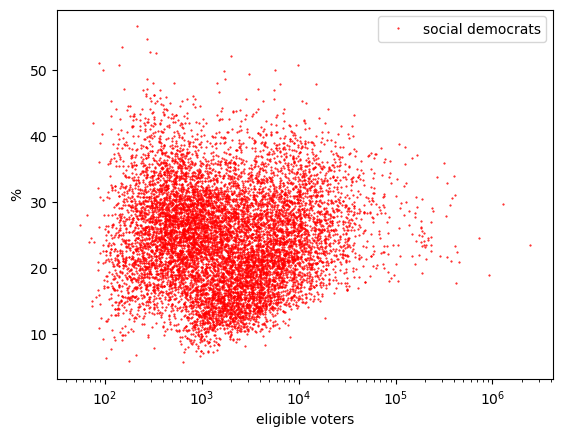

In [23]:
#print(s3[['eligible_voters','Wahlkreis']])
print(s2[['eligible_voters','Wahlkreis']])
#wdf4 numbers are wrong 
#print(wdf4.shape)
plt.plot(wdf2['eligible_voters'],100*wdf2['social_democrats_party_votes']/wdf2['valid_votes_party_votes'],'o',ms=0.5,color='red',label='social democrats') 
plt.legend(loc="best")
plt.xlabel("eligible voters")
plt.ylabel("%")
#plt.yscale("log")
plt.xscale("log")

In [24]:
#print(wdf4.shape)
#merging seems random
comb1=cdf2.merge(wdf2,left_on='Name',right_on='Gemeinde Name')  
print(comb1.shape)

(10024, 545)


2383    Frankfurt am Main, Stadt
7917     Frankfurt (Oder), Stadt
Name: Name, dtype: object
74002531


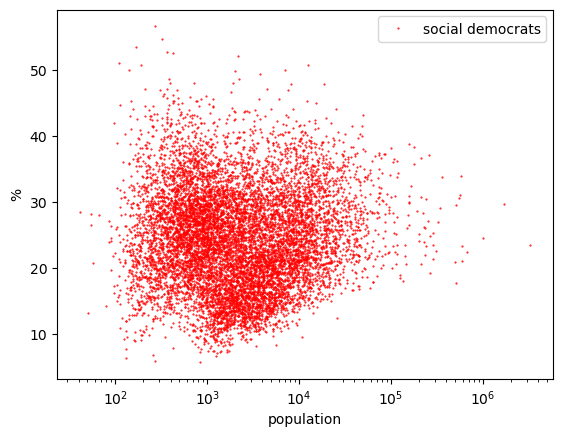

In [25]:
plt.plot(comb1['population'],100*comb1['social_democrats_party_votes']/comb1['valid_votes_party_votes'],'o',ms=0.5,color='red',label='social democrats') 
plt.legend(loc="best")
plt.xlabel("population")
plt.ylabel("%")
#plt.yscale("log")
plt.xscale("log")
#now it works 
s3=comb1[comb1['Name'].str.contains('Frankfurt')]
print(s3['Name'])
print(comb1.population.sum()) #some misisng only 74 millions

Checking the possible voters should be better way to check for problems. 

number of communities 10024
number of communities between factor 0.5 and 2: 9673


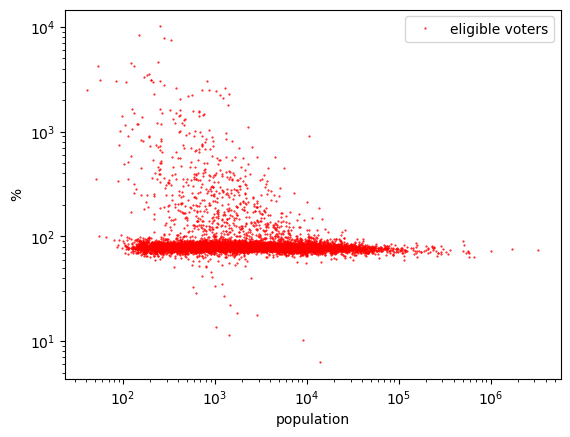

In [26]:
#but below something is wrong
plt.plot(comb1['population'],100*comb1['eligible_voters']/comb1['population'],'o',ms=0.5,color='red',label='eligible voters') 
plt.legend(loc="best")
plt.xlabel("population")
plt.ylabel("%")
plt.yscale("log")
plt.xscale("log")
print(f"number of communities {len(comb1.population)}")
print(f"number of communities between factor 0.5 and 2: {comb1.population[(comb1['eligible_voters']/comb1['population']>0.5) & (comb1['eligible_voters']/comb1['population']<2)].count()}")

Most seem have worked. Some not, but they are rather small and are thus more likely affected by different units for election and census. As expected there are problems at the high end, where cities are larger as election districts. 

median is 79.4048633117967
16% quantile is 75.07201490728181
84% quantile is 85.21815385442714
2.5% quantile is 69.47204479307597
97.5% quantile is 274.43423181086104
57.31236363636365


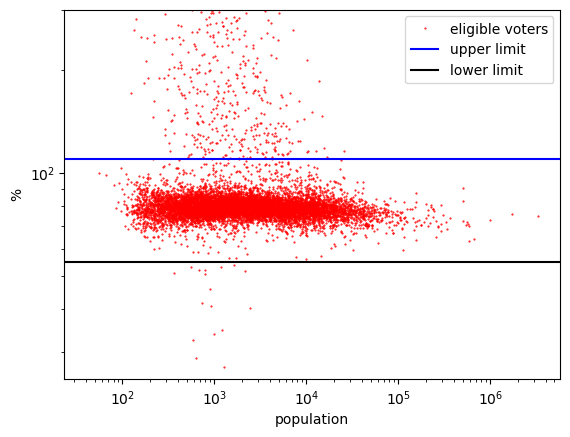

In [27]:
plt.plot(comb1['population'],100*comb1['eligible_voters']/comb1['population'],'o',ms=0.5,color='red',label='eligible voters') 
plt.axhline(y=110, color='b', linestyle='-', label='upper limit')
plt.axhline(y=55, color='k', linestyle='-', label='lower limit')
plt.legend(loc="best")
plt.xlabel("population")
plt.ylabel("%")
plt.yscale("log")
plt.xscale("log")
plt.ylim(25,300)
print(f"median is {np.median(100*comb1['eligible_voters']/comb1['population'])}")
print(f"16% quantile is {np.quantile(100*comb1['eligible_voters']/comb1['population'],0.1585)}")
print(f"84% quantile is {np.quantile(100*comb1['eligible_voters']/comb1['population'],1-0.1585)}")
print(f"2.5% quantile is {np.quantile(100*comb1['eligible_voters']/comb1['population'],0.025)}")
print(f"97.5% quantile is {np.quantile(100*comb1['eligible_voters']/comb1['population'],1-0.025)}")
print(79.4/(110/79.4))
#range of 55 to 110 by looking is also rather symmetric on median
#in principlee should be german over 18 but is less complete

We are now looking on the valid votes as function of voters. That checks for communities were votes are mssing because the mail votes were counted elsewhere. Since it is known that the mail votes is diffent, those communities are best excluded.

number of communities in census + election data 10024
number of communities in census + election data after excluding population miss matches 9395
number of communities in census + election data after also excluding mssing mail votes 5088
population in census + election data 74002531
population in census + election data after excluding population miss matches 72898464
population in census + election data after also excluding mssing mail votes 67862782


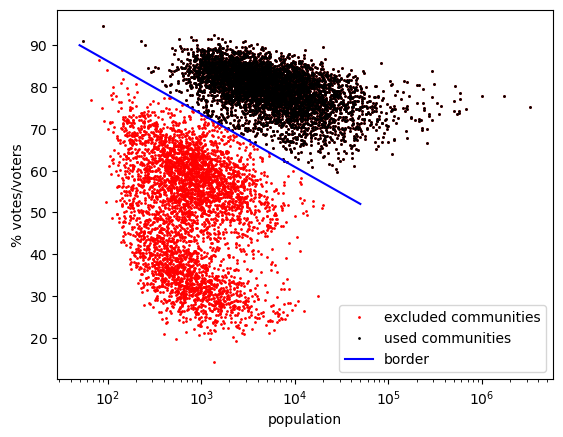

In [28]:
sel=comb1[(abs(100*comb1['eligible_voters']/comb1['population']-82.5)<27.5)]
sel2=comb1[(abs(100*comb1['eligible_voters']/comb1['population']-82.5)<27.5) & (100*comb1['voters']/comb1['eligible_voters']>90-38/3*np.log10(comb1['population']/50))]
li=np.zeros((2,2))
li[0,0]=90
li[0,1]=52
li[1,1]=50000
li[1,0]=50
plt.plot(sel['population'],100*sel['voters']/sel['eligible_voters'],'o',ms=1,color='red',label='excluded communities')
plt.plot(sel2['population'],100*sel2['voters']/sel2['eligible_voters'],'o',ms=1,color='black',label='used communities')
plt.plot(li[1],li[0],'-',ms=1,color='blue',label='border')
plt.legend(loc="best")
plt.xlabel("population")
plt.ylabel("% votes/voters")
#plt.xlim(0,30000)
plt.xscale("log")
print(f"number of communities in census + election data {len(comb1)}")
print(f"number of communities in census + election data after excluding population miss matches {len(sel)}")
print(f"number of communities in census + election data after also excluding mssing mail votes {len(sel2)}")

print(f"population in census + election data {comb1.population.sum()}")
print(f"population in census + election data after excluding population miss matches {sel.population.sum()}")
print(f"population in census + election data after also excluding mssing mail votes {sel2.population.sum()}")

In [29]:
print(wdf2.columns[10:30])

Index(['eligible_voters_not_locally', 'eligile_voters_added', 'voters',
       'voters_not_local', 'not_valid_votes_person_votes',
       'valid_votes_person_votes', 'christian_democrats_person_votes',
       'social_democrats_person_votes', 'alternative_for_germany_person_votes',
       'libertarians_person_votes', 'lefts_person_votes',
       'greens_person_votes', 'christian_socials_person_votes', 'FREIE WÄHLER',
       'Die PARTEI', 'Tierschutzpartei', 'NPD', 'PIRATEN', 'ÖDP', 'V-Partei³'],
      dtype='object')


The total population is about 8 than in should. We now check whather the reason is concentrated in some states (land) or whether it is more a random problem.

Text(0, 0.5, 'completenss in election data %')

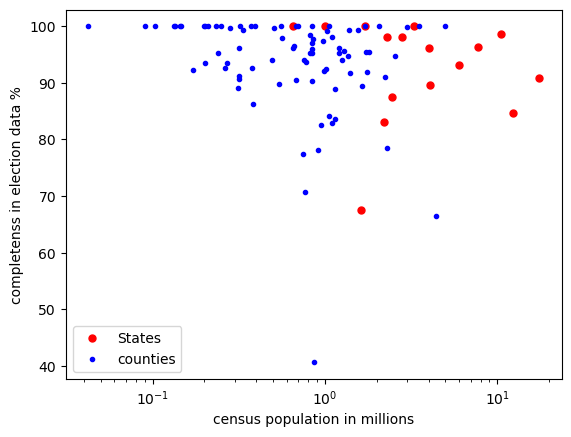

In [30]:
t=cdf2.population.groupby(cdf2['RS_Land']).sum()
u=comb1.population.groupby(comb1['RS_Land']).sum()
t2=cdf2.population.groupby(cdf2['RS_Kreis']).sum()
u2=comb1.population.groupby(comb1['RS_Kreis']).sum()
plt.plot(t/10**6,100*u/t,'o',ms=5,color='red',label='States') 
plt.plot(t2/10**6,100*u2/t2,'o',ms=3,color='blue',label='counties') 
plt.legend(loc="best")
plt.xscale("log")
plt.xlabel("census population in millions")
plt.ylabel("completenss in election data %")
#could look more on reasons, but not for now 
#hamburg berlin are double in it

There is variation between the states, but all have at least 65% completeness. On the county level the completeness is at least 40%.

Now we are looking in other census data. 

51943069
51664599


Text(0, 0.5, '% christain unions')

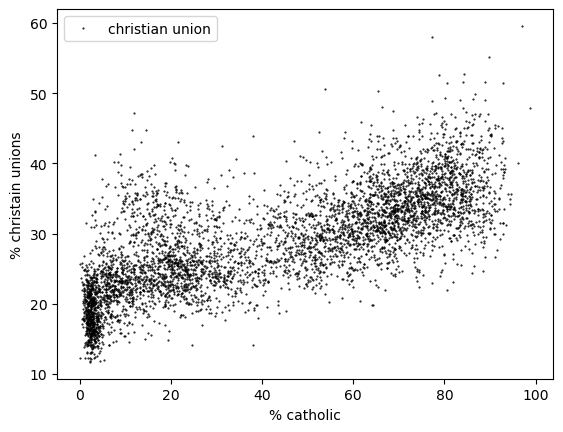

In [31]:
print(sel2.eligible_voters.sum())
print(sel2.eligible_voters[(sel2.religion_catholic>-0.5) & (sel2.qual_religion_catholic!=1)].sum())

plt.plot(100*sel2['religion_catholic']/sel2['population'],100*(sel2['christian_socials_party_votes']+sel2['christian_democrats_party_votes'])/sel2['valid_votes_party_votes'],'o',ms=0.5,color='black',label='christian union') 
plt.legend(loc="best")
plt.xlabel("% catholic")
plt.ylabel("% christain unions")
#plt.yscale("log")
#plt.xscale("log")

As expected there are more votes for christian union where a large part is catholic.

We are now checking for quality of the zensus properties, we always exclude already the communities for which the election data is bad.

In [32]:
print(f"total eligible voters {sel2.eligible_voters.sum()}")
print(f"total catholic numbers {sel2.eligible_voters[(sel2.religion_catholic>-0.5)].sum()}")
print(f"total reliable catholic numbers {sel2.eligible_voters[(sel2.religion_catholic>-0.5) & (sel2.qual_religion_catholic!=1)].sum()}")
#now automatic
print(sel2['qual_'+column_names[9]])
print(len(column_names))
stat=np.zeros((9,223))
stat[1,:]=sel2.eligible_voters.sum()
stat[4,:]=sel2.eligible_voters.count()
for i in range (8, 223):
    print(i)
    stat[0,i]=i
    stat[2,i]=sel2.eligible_voters[(sel2[column_names[i]]>-0.5)].sum()
    stat[3,i]=sel2.eligible_voters[(sel2[column_names[i]]>-0.5) & (sel2['qual_'+column_names[i]]!=1)].sum()  
    stat[5,i]=sel2.eligible_voters[(sel2[column_names[i]]>-0.5)].count()
    stat[6,i]=sel2.eligible_voters[(sel2[column_names[i]]>-0.5) & (sel2['qual_'+column_names[i]]!=1)].count()
    stat[7,i]=sel2[column_names[i]][(sel2[column_names[i]]>-0.5)].sum() 
    stat[8,i]=sel2[column_names[i]][(sel2[column_names[i]]>-0.5) & (sel2['qual_'+column_names[i]]!=1)].sum()     
print(stat[:,7:12]) 
print(max(stat[7]))

total eligible voters 51943069
total catholic numbers 51943069
total reliable catholic numbers 51664599
0       0
1       0
2       0
3       0
4       0
       ..
9989    0
9995    0
9996    0
9997    0
9998    0
Name: qual_gender_total, Length: 5088, dtype: int64
223
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213


Text(0, 0.5, '% of eligible voters w information')

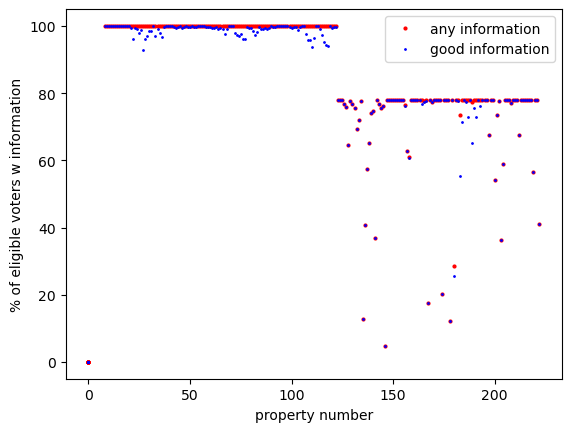

In [33]:
plt.plot(stat[0],100*stat[2]/stat[1],'o',ms=2,color='red',label='any information') 
plt.plot(stat[0],100*stat[3]/stat[1],'o',ms=1,color='blue',label='good information') 
plt.legend(loc="best")
plt.xlabel("property number")
plt.ylabel("% of eligible voters w information")

[5088. 5088. 5088. 1462. 1462. 1458. 1400. 1366.  986. 1447.]
including 122 there is most information there


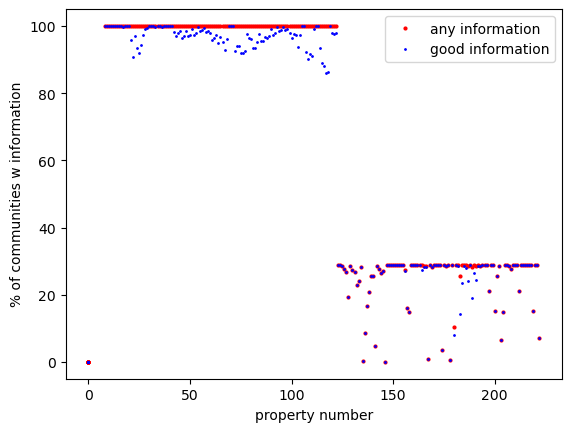

In [34]:
plt.plot(stat[0],100*stat[5]/stat[4],'o',ms=2,color='red',label='any information') 
plt.plot(stat[0],100*stat[6]/stat[4],'o',ms=1,color='blue',label='good information') 
plt.legend(loc="best")
plt.xlabel("property number")
plt.ylabel("% of communities w information")
print(stat[5,120:130])
print("including 122 there is most information there")

In [35]:
#looking at the ince with at least a limit of 10000, at most 1462 units (could add about 300 by using counties minus towns in them )
for i in range (123,len(column_names)):
    if(stat[6,i]<1000):
        print(column_names[i])
        print(stat[3,i])
        print(stat[3,i]/max(stat[3,123:len(column_names)]))
        print(stat[6,i]/max(stat[6,123:len(column_names)]))
        print(f"number of locations {stat[6,i]}")
#some have few       but not many and often not directly important like migrations, and school based and misisng data ones  

migration_background_foreign_german_born
33554597.0
0.8274863260280535
0.6744186046511628
number of locations 986.0
migration_56-59
6641594.0
0.16378763893453893
0.006839945280437756
number of locations 10.0
migration_60-69
21194921.0
0.5226856787683916
0.3002735978112175
number of locations 439.0
migration_70-79
29781044.0
0.7344271392930097
0.5820793433652531
number of locations 851.0
migration_year_nan
19091787.0
0.4708205162452153
0.1662106703146375
number of locations 243.0
migration_regions_nan
2468919.0
0.060885747266487975
0.0006839945280437756
number of locations 1.0
unemployed_male
32537789.0
0.8024109327459964
0.5554035567715458
number of locations 812.0
unemployed_female
31583714.0
0.7788825912640464
0.5129958960328317
number of locations 750.0
helpers_family
9176071.0
0.2262901050238382
0.033515731874145006
number of locations 49.0
agriculture_trained
10447135.0
0.2576356783146312
0.12448700410396717
number of locations 182.0
soldier
6341226.0
0.1563802958281266
0.01915184

           AGS_12  RS_Land  RS_RB_NUTS2  RS_Kreis  RS_VB  RS_Gemeinde  \
5888  91710117117        9          1.0      71.0  117.0        117.0   
6188  91840119119        9          1.0      84.0  119.0        119.0   

                        Name  Reg_Hier  population  gender_total  ...  \
5888        Garching a.d.Alz  Gemeinde        8495          8495  ...   
6188  Garching b.München, St  Gemeinde       15699         15701  ...   

      III. Weg.1  Bündnis21.1  LIEBE.1  LKR.1  PdF  LfK  SSW.1  \
5888           0            0        0      0    0    0      0   
6188           1            0        0      1    0    0      0   

      Team Todenhöfer.1  UNABHÄNGIGE.1  Volt.1  
5888                 19             14       4  
6188                 68             15      34  

[2 rows x 545 columns]
5888     438
6188    1056
Name: libertarians_party_votes, dtype: int64
5888    4721
6188    8498
Name: valid_votes_party_votes, dtype: int64
Grünwald


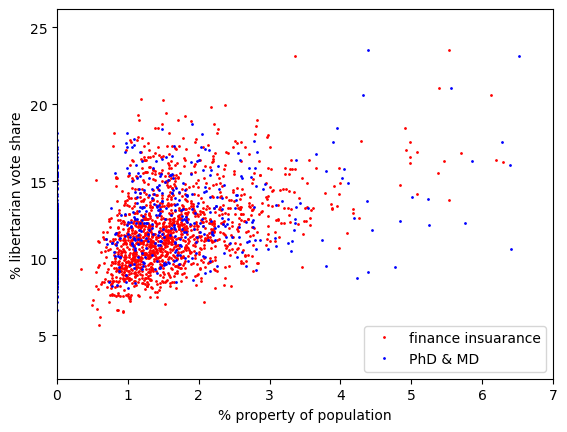

In [37]:

plt.plot(100*sel2['finance_insurance']/sel2['population'],100*sel2['libertarians_party_votes']/sel2['valid_votes_party_votes'],'o',ms=1,color='red',label='finance insuarance') 
plt.plot(100*sel2['PhD_and_MD']/sel2['population'],100*sel2['libertarians_party_votes']/sel2['valid_votes_party_votes'],'o',ms=1,color='blue',label='PhD & MD') 
plt.legend(loc="best")
plt.xlabel("% property of population")
plt.ylabel("% libertarian vote share")
plt.xlim(0,7)
#plt.xscale("log")
#plt.yscale("log")
#although insuarnce seem not useless 
#to be removed later
print(sel2[sel2.Name.str.contains('Garching')])
print(sel2.libertarians_party_votes[sel2.Name.str.contains('Garching')])
print(sel2.valid_votes_party_votes[sel2.Name.str.contains('Garching')])
print(sel2.Name[(sel2['PhD_and_MD']/sel2['population']).idxmax()])

The information is mostly complete until property 123. Therefore, we are now looking on all properties in columns 8 to 123. We will exclude the ones which are on properties which non voters like non citizen and citizens below 18, duplicates and properties which just summarize for how many of one category there is any information. There are also two age grouping in total, we use which has one border below 17 to exclude non voeters. 

In [38]:
for i in range(8,123):
    print(f"{i} {column_names[i]}")
    #list to include
pop=np.zeros((3,57))
pop[2]=np.arange(0,57,1)
print(pop[2])
listg1=column_names[10:12]
pop[0,0:2]=stat[8,10:12]
for i in range (15, 39):
    listg1.append(column_names[i])
    pop[0,2+(i-15)]=stat[8,i]
for i in range (84, 105):
    listg1.append(column_names[i])
    pop[0,26+(i-84)]=stat[8,i]    
listg1.append(column_names[106])
pop[0,47]=stat[8,106] 
for i in range (113, 119):
    listg1.append(column_names[i])
    pop[0,48+(i-113)]=stat[8,i] 
for i in range (120, 123):
    listg1.append(column_names[i])
    pop[0,54+(i-120)]=stat[8,i]     
print(listg1)
print(f"number of properties is {len(listg1)}")
#get fraction of total population
pop[1]=pop[0]/sel2.population.sum()
print(f"smallest population fraction {min(pop[1])}")
print(f"largest population fraction {max(pop[1])}")

8 population
9 gender_total
10 male
11 female
12 marital_status_total
13 marital_status_male
14 marital_status_female
15 single_total
16 single_male
17 single_female
18 married_total
19 married_male
20 married_female
21 widowed_total
22 widowed_male
23 widowed_female
24 divorced_total
25 divorced_male
26 divorced_female
27 civil_union_total
28 civil_union_male
29 civil_union_female
30 civil_union_widowed_total
31 civil_union_widowed_male
32 civil_union_widowed_female
33 civil_union_divorced_total
34 civil_union_divorced_male
35 civil_union_divorved_female
36 not_specified_total
37 not_specified_male
38 not_specified_female
39 age_groups1_total
40 age_groups1_male
41 age_groups1_female
42 0_9_total
43 0_9_male
44 0_9_female
45 10_19_total
46 10_19_male
47 10_19_female
48 20_29_total
49 20_29_male
50 20_29_female
51 30_39_total
52 30_39_male
53 30_39_female
54 40_49_total
55 40_49_male
56 40_49_female
57 50_59_total
58 50_59_male
59 50_59_female
60 60_69_total
61 60_69_male
62 60_69_fema

That includes marital status data, age data, citizen data and religion data. It does not include more detailed migration data, economic or eduction data

We are now calculating the correlation for all of them and the votes of the 6 major parties which made it into parliamentand the total of the minor parties. The two christian partiesare summarized as usual, since do no compete in states and form one parlimentary group.

In [39]:
#combining the two christain unions
comb1['christian_unions_party_votes']=comb1['christian_socials_party_votes']+comb1['christian_democrats_party_votes']
comb1['christian_unions_person_votes']=comb1['christian_socials_person_votes']+comb1['christian_democrats_person_votes']
sel2['christian_unions_party_votes']=sel2['christian_socials_party_votes']+sel2['christian_democrats_party_votes']
sel2['christian_unions_person_votes']=sel2['christian_socials_person_votes']+sel2['christian_democrats_person_votes']


/tmp/ipykernel_8634/205160679.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel2['christian_unions_party_votes']=sel2['christian_socials_party_votes']+sel2['christian_democrats_party_votes']
/tmp/ipykernel_8634/205160679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel2['christian_unions_person_votes']=sel2['christian_socials_person_votes']+sel2['christian_democrats_person_votes']


In [40]:
#get other parties total by using valid votes minus main parties
comb1['others_party_votes']=comb1['valid_votes_party_votes']-comb1['christian_unions_party_votes']-comb1['social_democrats_party_votes']-comb1['alternative_for_germany_party_votes']-comb1['libertarians_party_votes']-comb1['greens_party_votes']-comb1['lefts_party_votes']
comb1['others_person_votes']=comb1['valid_votes_person_votes']-comb1['christian_unions_person_votes']-comb1['social_democrats_person_votes']-comb1['alternative_for_germany_person_votes']-comb1['libertarians_person_votes']-comb1['greens_person_votes']-comb1['lefts_person_votes']
sel2['others_party_votes']=sel2['valid_votes_party_votes']-sel2['christian_unions_party_votes']-sel2['social_democrats_party_votes']-sel2['alternative_for_germany_party_votes']-sel2['libertarians_party_votes']-sel2['greens_party_votes']-sel2['lefts_party_votes']
sel2['others_person_votes']=sel2['valid_votes_person_votes']-sel2['christian_unions_person_votes']-sel2['social_democrats_person_votes']-sel2['alternative_for_germany_person_votes']-sel2['libertarians_person_votes']-sel2['greens_person_votes']-sel2['lefts_person_votes']


/tmp/ipykernel_8634/3306810407.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel2['others_party_votes']=sel2['valid_votes_party_votes']-sel2['christian_unions_party_votes']-sel2['social_democrats_party_votes']-sel2['alternative_for_germany_party_votes']-sel2['libertarians_party_votes']-sel2['greens_party_votes']-sel2['lefts_party_votes']
/tmp/ipykernel_8634/3306810407.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel2['others_person_votes']=sel2['valid_votes_person_votes']-sel2['christian_unions

In [41]:
# checking the princple before doing all
sel=sel2[(sel2.religion_catholic>-0.5) & (sel2.qual_religion_catholic!=1)]
s1=sel['christian_unions_party_votes']/sel['eligible_voters']
s2=sel['religion_catholic']/sel['population']
s3=sel['religion_protestant']/sel['population']
s4=sel['religion_other']/sel['population']
corr2=s1.corr(s2, method='pearson')
corr3=s1.corr(s3, method='pearson')
corr4=s1.corr(s4, method='pearson')
print(corr2)
print(corr3)
print(corr4)

0.7374684917904923
-0.3495756491306654
-0.7107357883117962


In [42]:
#list of parties and voters
listp=['voters','not_valid_votes_party_votes','valid_votes_party_votes','christian_unions_party_votes','social_democrats_party_votes','alternative_for_germany_party_votes',
'libertarians_party_votes', 'lefts_party_votes','greens_party_votes','others_party_votes']
print(listp)
sel=sel2[(sel2.religion_catholic>-0.5) & (sel2.qual_religion_catholic!=1)]
#now turn out
s1=sel[listp[0]]/sel['eligible_voters']
s2=sel['religion_catholic']/sel['population']
s3=sel['religion_protestant']/sel['population']
s4=sel['religion_other']/sel['population']
corr2=s1.corr(s2, method='pearson')
corr3=s1.corr(s3, method='pearson')
corr4=s1.corr(s4, method='pearson')
print(corr2)
print(corr3)
print(corr4)
print(len(listp))
print(len(listg1))

['voters', 'not_valid_votes_party_votes', 'valid_votes_party_votes', 'christian_unions_party_votes', 'social_democrats_party_votes', 'alternative_for_germany_party_votes', 'libertarians_party_votes', 'lefts_party_votes', 'greens_party_votes', 'others_party_votes']
0.4294149464644522
-0.13835207317069764
-0.4821021176070483
10
57


In [43]:
#gruene saarland missing in state? 
corr1=np.zeros((10,57))
for i in range(10):
    print(i)
    for j in range(57):
        sel=sel2[(comb1[listg1[j]]>-0.5) & (comb1['qual_'+listg1[j]]!=1)]
        s1=sel[listp[i]]/sel['eligible_voters']
        s2=sel[listg1[j]]/sel['population']
        corr1[i,j]=s1.corr(s2, method='pearson')


0


/tmp/ipykernel_8634/3035649683.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sel=sel2[(comb1[listg1[j]]>-0.5) & (comb1['qual_'+listg1[j]]!=1)]


1
2
3
4
5
6
7
8
9


In [44]:

for i in range(10):
    print(listp[i])
    print(f"max pos correlation of {round(np.max(corr1[i,:]),4)} at {listg1[np.argmax(corr1[i,:])]}")
    print(f"max neg correlation of {round(np.min(corr1[i,:]),4)} at {listg1[np.argmin(corr1[i,:])]}")
    print(f"no correlation of {round(np.min(abs(corr1[i,:])),4)} at {listg1[np.argmin(abs(corr1[i,:]))]}")   

#valid votes very similar to votes becuase few invalid and both relative to eligible voters

voters
max pos correlation of 0.4294 at religion_catholic
max neg correlation of -0.5242 at divorced_total
no correlation of 0.0003 at male_30_39
not_valid_votes_party_votes
max pos correlation of 0.3385 at religion_other
max neg correlation of -0.336 at religion_catholic
no correlation of 0.0002 at civil_union_divorved_female
valid_votes_party_votes
max pos correlation of 0.4424 at religion_catholic
max neg correlation of -0.5246 at divorced_total
no correlation of 0.002 at civil_union_divorced_male
christian_unions_party_votes
max pos correlation of 0.7375 at religion_catholic
max neg correlation of -0.7167 at religion_other
no correlation of 0.0028 at civil_union_divorced_male
social_democrats_party_votes
max pos correlation of 0.5075 at religion_protestant
max neg correlation of -0.4921 at religion_catholic
no correlation of 0.0065 at civil_union_widowed_female
alternative_for_germany_party_votes
max pos correlation of 0.5574 at religion_other
max neg correlation of -0.4215 at sing

The smallest absolute correlation is usually for properties which are rare like civil union (same sex civil union) related or not specified marital status. It is not clear that these properties do not correlate with voters pattern, because it is possible that the others more common properties just add so much 'noise', that it cannot be measured in single factor analysis. One of the strongest factors (with both signs) are religion. Partly, that is caused because other relgion of none is much more common in the east of germany, partly that is due one of origin of the christian unions. Other relations are more surprsing like that the strongest of libertarians is for birth country other europe. Since this group is small and many of them cannot vote, it is possible that it is proxy for another property, possible economic which is not included. 

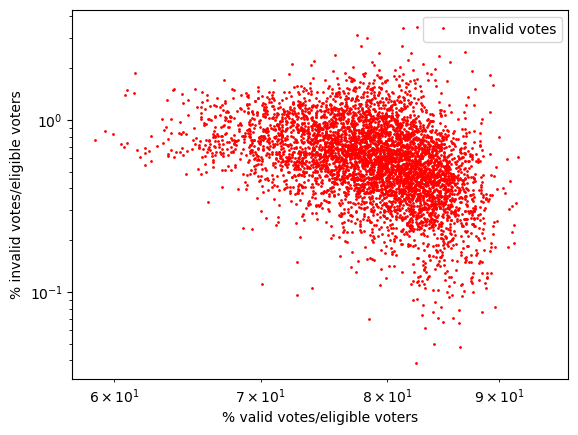

In [45]:

plt.plot(100*sel2['valid_votes_party_votes']/sel2['eligible_voters'],100*sel2['not_valid_votes_party_votes']/sel2['eligible_voters'],'o',ms=1,color='red',label='invalid votes') 
plt.legend(loc="best")
plt.xlabel("% valid votes/eligible voters")
plt.ylabel("% invalid votes/eligible voters")
plt.xscale("log")
plt.yscale("log")


['voters', 'not_valid_votes_party_votes', 'valid_votes_party_votes', 'christian_unions_party_votes', 'social_democrats_party_votes', 'alternative_for_germany_party_votes', 'libertarians_party_votes', 'lefts_party_votes', 'greens_party_votes', 'others_party_votes']


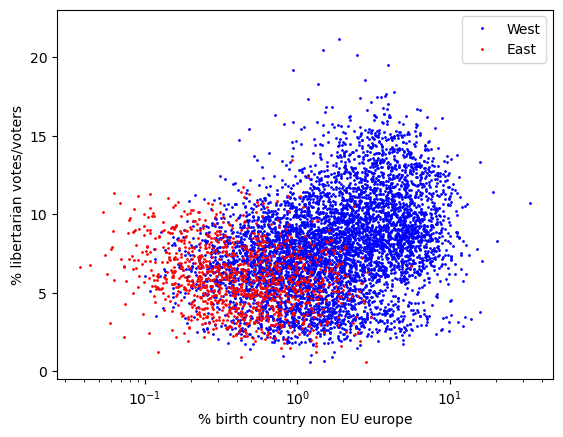

In [46]:
#libetertarian biggest correlation
print(listp)
sele=comb1[(comb1.unification=='East') & (comb1.birth_country_other_europe>-0.5) & (comb1.qual_birth_country_other_europe!=1) & (abs(100*comb1['eligible_voters']/comb1['population']-82.5)<27.5)]
selw=comb1[(comb1.unification=='West') & (comb1.birth_country_other_europe>-0.5) & (comb1.qual_birth_country_other_europe!=1) & (abs(100*comb1['eligible_voters']/comb1['population']-82.5)<27.5)]

plt.plot(100*selw['birth_country_other_europe']/selw['population'],100*selw['libertarians_party_votes']/selw['eligible_voters'],'o',ms=1,color='blue',label='West')
plt.plot(100*sele['birth_country_other_europe']/sele['population'],100*sele['libertarians_party_votes']/sele['eligible_voters'],'o',ms=1,color='red',label='East')
plt.legend(loc="best")
plt.xlabel("% birth country non EU europe")
plt.ylabel("% libertarian votes/voters")
plt.xscale("log")

There is really a correlation between birth country and libertarian vote share and it is not only caused by east and west differences, since the trend is also visible within the west. 

We now look on the impact of a property relative to its share. First for voter properties. 

['voters', 'not_valid_votes_party_votes', 'valid_votes_party_votes', 'christian_unions_party_votes', 'social_democrats_party_votes', 'alternative_for_germany_party_votes', 'libertarians_party_votes', 'lefts_party_votes', 'greens_party_votes', 'others_party_votes']


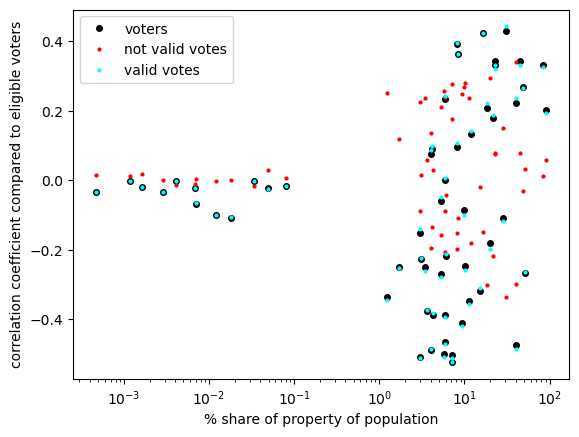

In [47]:
print(listp)
plt.plot(100*pop[1],corr1[0],'o',ms=4,color='black',label='voters') 
plt.plot(100*pop[1],corr1[1],'o',ms=2,color='red',label='not valid votes') 
plt.plot(100*pop[1],corr1[2],'o',ms=2,color='cyan',label='valid votes') 
plt.legend(loc="best")
plt.xlabel("% share of property of population")
plt.ylabel("correlation coefficient compared to eligible voters")
plt.xscale("log")
#plt.yscale("log")

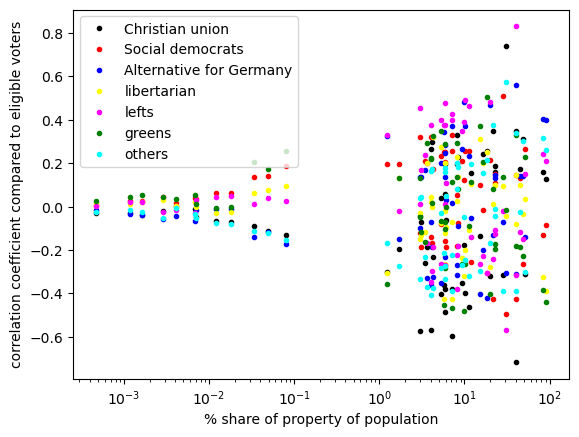

In [48]:
plt.plot(100*pop[1],(corr1[3]),'o',ms=3,color='black',label='Christian union') 
plt.plot(100*pop[1],(corr1[4]),'o',ms=3,color='red',label='Social democrats') 
plt.plot(100*pop[1],corr1[5],'o',ms=3,color='blue',label='Alternative for Germany') 
plt.plot(100*pop[1],corr1[6],'o',ms=3,color='yellow',label='libertarian') 
plt.plot(100*pop[1],corr1[7],'o',ms=3,color='magenta',label='lefts') 
plt.plot(100*pop[1],corr1[8],'o',ms=3,color='green',label='greens') 
plt.plot(100*pop[1],corr1[9],'o',ms=3,color='cyan',label='others') 
plt.legend(loc="best")
plt.xlabel("% share of property of population")
plt.ylabel("correlation coefficient compared to eligible voters")
plt.xscale("log")

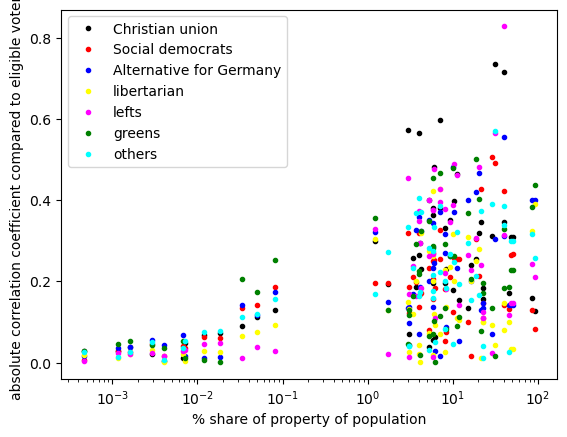

In [49]:
plt.plot(100*pop[1],abs(corr1[3]),'o',ms=3,color='black',label='Christian union') 
plt.plot(100*pop[1],abs(corr1[4]),'o',ms=3,color='red',label='Social democrats') 
plt.plot(100*pop[1],abs(corr1[5]),'o',ms=3,color='blue',label='Alternative for Germany') 
plt.plot(100*pop[1],abs(corr1[6]),'o',ms=3,color='yellow',label='libertarian') 
plt.plot(100*pop[1],abs(corr1[7]),'o',ms=3,color='magenta',label='lefts') 
plt.plot(100*pop[1],abs(corr1[8]),'o',ms=3,color='green',label='greens') 
plt.plot(100*pop[1],abs(corr1[9]),'o',ms=3,color='cyan',label='others') 
plt.legend(loc="best")
plt.xlabel("% share of property of population")
plt.ylabel("absolute correlation coefficient compared to eligible voters")
plt.xscale("log")

In general the properties with really small sahre have a small influence. Possible also the influence of properties above 80 decreases again. We now look on the median influence in the table below. 

In [50]:
for i in range(len(listg1)):
    print(f"{listg1[i]} has share of {round(100*pop[1,i],4)}% and median abs cor coev of {round(np.median(abs(corr1[:,i])),4)}")

male has share of 48.7217% and median abs cor coev of 0.2459
female has share of 51.2784% and median abs cor coev of 0.246
single_total has share of 40.1631% and median abs cor coev of 0.3136
single_male has share of 21.6174% and median abs cor coev of 0.2031
single_female has share of 18.5414% and median abs cor coev of 0.2789
married_total has share of 45.4809% and median abs cor coev of 0.1373
married_male has share of 22.7348% and median abs cor coev of 0.1359
married_female has share of 22.7444% and median abs cor coev of 0.1409
widowed_total has share of 7.0772% and median abs cor coev of 0.3888
widowed_male has share of 1.2152% and median abs cor coev of 0.3135
widowed_female has share of 5.8269% and median abs cor coev of 0.3701
divorced_total has share of 7.0861% and median abs cor coev of 0.3575
divorced_male has share of 2.9916% and median abs cor coev of 0.328
divorced_female has share of 4.0582% and median abs cor coev of 0.3468
civil_union_total has share of 0.0807% and m

The smallest percetange are really small. Thus we are excluding ended civil unions. A related question is how different are the male female parts of the total of the same property. It should no0t be used total, male and feamle at once because that would be double use. For civil union we just use the total because the number is low and it seems that just noise decreases all singal there, since most coeffeicent are larger when combined.

To decided the others we look on plots. Below we look on gender as expected it is just the mirror of each other, which means that we exclude one. We always do that for one property of one category because otherwise there would be perfect (In practice is impect data makes not perfect, but still too good for being useful.) correlation which makes weights not interpretable. 

['male', 'female', 'single_total', 'single_male', 'single_female', 'married_total', 'married_male', 'married_female', 'widowed_total', 'widowed_male', 'widowed_female', 'divorced_total', 'divorced_male', 'divorced_female', 'civil_union_total', 'civil_union_male', 'civil_union_female']


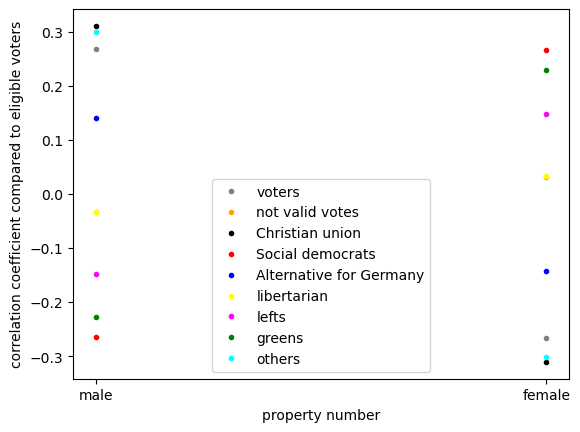

In [51]:
plt.plot(listg1[0:2],corr1[0,0:2],'o',ms=3,color='gray',label='voters') 
plt.plot(listg1[0:2],corr1[1,0:2],'o',ms=3,color='orange',label='not valid votes') 
plt.plot(listg1[0:2],(corr1[3,0:2]),'o',ms=3,color='black',label='Christian union') 
plt.plot(listg1[0:2],corr1[4,0:2],'o',ms=3,color='red',label='Social democrats') 
plt.plot(listg1[0:2],corr1[5,0:2],'o',ms=3,color='blue',label='Alternative for Germany') 
plt.plot(listg1[0:2],corr1[6,0:2],'o',ms=3,color='yellow',label='libertarian') 
plt.plot(listg1[0:2],corr1[7,0:2],'o',ms=3,color='magenta',label='lefts') 
plt.plot(listg1[0:2],corr1[8,0:2],'o',ms=3,color='green',label='greens') 
plt.plot(listg1[0:2],corr1[9,0:2],'o',ms=3,color='cyan',label='others') 
plt.legend(loc="best") 
plt.xlabel("property number")
plt.ylabel("correlation coefficient compared to eligible voters")
#plt.xscale("log")
#plt.xlim(-0.5,16.5)
print(listg1[0:17])

Now we plot to the coefficent for all marital status categories with enough data. 

(-1.8, 0.55)

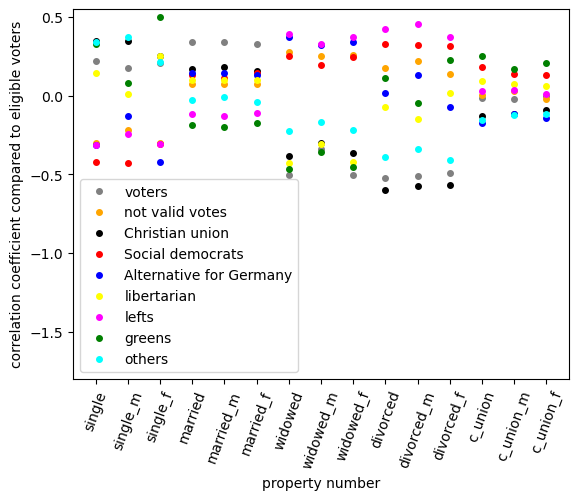

In [52]:
listpl1=['single', 'single_m', 'single_f', 'married', 'married_m', 'married_f', 'widowed', 'widowed_m', 'widowed_f', 'divorced', 'divorced_m', 'divorced_f', 'c_union', 'c_union_m', 'c_union_f']
plt.plot(listpl1,corr1[0,2:17],'o',ms=4,color='gray',label='voters') 
plt.plot(listpl1,corr1[1,2:17],'o',ms=4,color='orange',label='not valid votes') 
plt.plot(listpl1,(corr1[3,2:17]),'o',ms=4,color='black',label='Christian union') 
plt.plot(listpl1,corr1[4,2:17],'o',ms=4,color='red',label='Social democrats') 
plt.plot(listpl1,corr1[5,2:17],'o',ms=4,color='blue',label='Alternative for Germany') 
plt.plot(listpl1,corr1[6,2:17],'o',ms=4,color='yellow',label='libertarian') 
plt.plot(listpl1,corr1[7,2:17],'o',ms=4,color='magenta',label='lefts') 
plt.plot(listpl1,corr1[8,2:17],'o',ms=4,color='green',label='greens') 
plt.plot(listpl1,corr1[9,2:17],'o',ms=4,color='cyan',label='others') 
plt.legend(loc="best") 
plt.xlabel("property number")
plt.xticks(rotation=70)
plt.ylabel("correlation coefficient compared to eligible voters")
plt.ylim(-1.8,0.55)

Since for single there are clear difference we separate by gender. In contrast it seems rather similar for married, therefore we use married total there. This does not necessary means it is the same but because married couples live usually together, census based analysis cannot separate them well. For widowed the coefficents are nearly always larger absolutely together than separated, thsu we use them together. That could be just caused by low numbers. In contrast there are some parties which have with clearly different trends for divorced, thus we separate them.  At the we omit civil union from the categories because since all together sum up to 100% it is already included.


We now look on the age groups. 

['total_18_24', 'male_18_24', 'female_18_24', 'total_25_29', 'male_25_29', 'female_25_29', 'total_30_39', 'male_30_39', 'female_30_39', 'total_40_49', 'male_40_49', 'female_40_49', 'total_50_64', 'male_50_64', 'female_50_64', 'total_65_74', 'male_65_74', 'female_65_74', 'total_75_and_older', 'male_75_and_older', 'female_75_and_older']


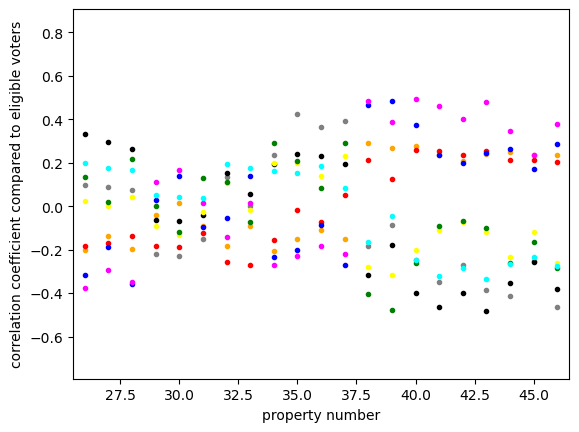

In [53]:

plt.plot(pop[2],corr1[0],'o',ms=3,color='gray',label='voters') 
plt.plot(pop[2],corr1[1],'o',ms=3,color='orange',label='not valid votes') 
plt.plot(pop[2],(corr1[3]),'o',ms=3,color='black',label='Christian union') 
plt.plot(pop[2],corr1[4],'o',ms=3,color='red',label='Social democrats') 
plt.plot(pop[2],corr1[5],'o',ms=3,color='blue',label='Alternative for Germany') 
plt.plot(pop[2],corr1[6],'o',ms=3,color='yellow',label='libertarian') 
plt.plot(pop[2],corr1[7],'o',ms=3,color='magenta',label='lefts') 
plt.plot(pop[2],corr1[8],'o',ms=3,color='green',label='greens') 
plt.plot(pop[2],corr1[9],'o',ms=3,color='cyan',label='others') 
#plt.legend(loc="best") too big improve add also labels and betetr symbols
plt.xlabel("property number")
plt.ylabel("correlation coefficient compared to eligible voters")
#plt.xscale("log")
plt.xlim(25.5,46.5)
print(listg1[26:47])

Since there are always some differences (least between 65 and 74) we use always the genders separately and discard the totals for the age groups.

Finally, we look on the citizen and religion properties

['citizen_german', 'birth_country_germany', 'birth_country_foreign', 'birth_country_eu27', 'birth_country_other_europe', 'birth_country_other_continents', 'birth_country_other', 'religion_catholic', 'religion_protestant', 'religion_other']


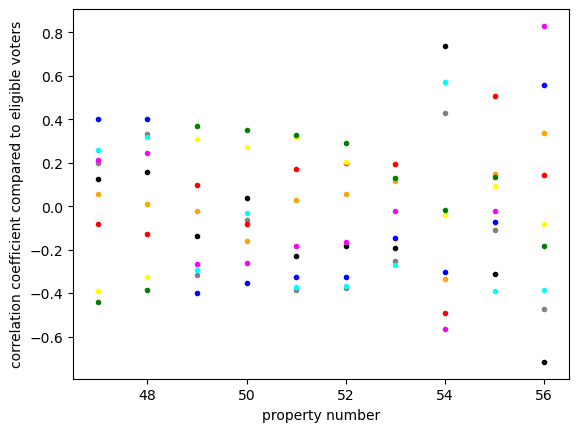

In [54]:
plt.plot(pop[2],corr1[0],'o',ms=3,color='gray',label='voters') 
plt.plot(pop[2],corr1[1],'o',ms=3,color='orange',label='not valid votes') 
plt.plot(pop[2],(corr1[3]),'o',ms=3,color='black',label='Christian union') 
plt.plot(pop[2],corr1[4],'o',ms=3,color='red',label='Social democrats') 
plt.plot(pop[2],corr1[5],'o',ms=3,color='blue',label='Alternative for Germany') 
plt.plot(pop[2],corr1[6],'o',ms=3,color='yellow',label='libertarian') 
plt.plot(pop[2],corr1[7],'o',ms=3,color='magenta',label='lefts') 
plt.plot(pop[2],corr1[8],'o',ms=3,color='green',label='greens') 
plt.plot(pop[2],corr1[9],'o',ms=3,color='cyan',label='others') 
#plt.legend(loc="best") too big improve add also labels and betetr symbols
plt.xlabel("property number")
plt.ylabel("correlation coefficient compared to eligible voters")
#plt.xscale("log")
plt.xlim(46.5,56.5)
print(listg1[47:57])

We discard citizen German since it is smaller than the birth country Germany and all voters should be citizens. We
exclude foreigen borth coiuntry since it is the negative of the former and use the eu27, other europe and other continents. We exclude other since it is unclear what is in it and the signal is small. All religions are kept since the have one of the largest signal. 

Further we discard some whose inclusion would lead too strong correlations between different features. Firstly, this is religion(other) which follows automatically when the other two are excluded. 
We also exclude divorced_female, because while in principlr we already exclude some features in the marital status category, they add up to so such a small number, that is practice there is still a very strong correlation without it. We choose divorced_female because its correlatio coefficients are most similar too civil union which domiantes the rests. 

In [225]:
print(listg1)
listg2=['male','single_male', 'single_female', 'married_total', 'widowed_total','divorced_male','male_18_24', 'female_18_24',  'male_25_29', 'female_25_29',  'male_30_39', 'female_30_39',  'male_40_49', 'female_40_49',  'male_50_64', 'female_50_64',  'male_65_74', 'female_65_74', 'male_75_and_older', 'female_75_and_older',  'birth_country_germany', 'birth_country_eu27', 'birth_country_other_europe', 'birth_country_other_continents',  'religion_catholic', 'religion_protestant']
print(len(listg2))
print(listg2)

['male', 'female', 'single_total', 'single_male', 'single_female', 'married_total', 'married_male', 'married_female', 'widowed_total', 'widowed_male', 'widowed_female', 'divorced_total', 'divorced_male', 'divorced_female', 'civil_union_total', 'civil_union_male', 'civil_union_female', 'civil_union_widowed_total', 'civil_union_widowed_male', 'civil_union_widowed_female', 'civil_union_divorced_total', 'civil_union_divorced_male', 'civil_union_divorved_female', 'not_specified_total', 'not_specified_male', 'not_specified_female', 'total_18_24', 'male_18_24', 'female_18_24', 'total_25_29', 'male_25_29', 'female_25_29', 'total_30_39', 'male_30_39', 'female_30_39', 'total_40_49', 'male_40_49', 'female_40_49', 'total_50_64', 'male_50_64', 'female_50_64', 'total_65_74', 'male_65_74', 'female_65_74', 'total_75_and_older', 'male_75_and_older', 'female_75_and_older', 'citizen_german', 'birth_country_germany', 'birth_country_foreign', 'birth_country_eu27', 'birth_country_other_europe', 'birth_count

Now we are selecting the units whoch have good data for all the selected properties. 

In [226]:
sel3=sel2.copy()
#get clean section and the use linear regression
for i in range(len(listg2)):
    print(i)
    sel3=sel3[(sel3[listg2[i]]>-0.5) & (sel3['qual_'+listg2[i]]!=1)]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [227]:
print(len(sel2))
print(len(sel3))
print(sel2.population.sum())
print(sel3.population.sum())
#are now clearly less to checked whether that causes a problem
print(sel2.population.min())
print(sel3.population.min())
print(sel2.population.median())
print(sel3.population.median())

5088
2525
67862782
58347032
55
55
5113.0
10774.0


In [228]:
#next is doing linear regression
#select properties of party, votes and valid votes are very similar thus only one and is now refernce, since usually the share is given to votes
listp2=['eligible_voters','not_valid_votes_party_votes','christian_unions_party_votes','social_democrats_party_votes','alternative_for_germany_party_votes',
'libertarians_party_votes', 'lefts_party_votes','greens_party_votes','others_party_votes']
print(listp2)
#new reference is'valid_votes_party_votes'
#select features 
print(len(listg2))
feat=sel3.loc[:,[listg2[0],listg2[1]]]
print(sel3.loc[:,'population'])
feat.iloc[:,0]=feat.iloc[:,0]/sel3.loc[:,'population']*100
feat.iloc[:,1]=feat.iloc[:,1]/sel3.loc[:,'population']*100
for i in range(2,len(listg2)):
    feat[listg2[i]]=sel3.loc[:,[listg2[i]]]
    feat.iloc[:,i]=feat.iloc[:,i]/sel3.loc[:,'population']*100
print(feat)
#now the targets which are all of listp2
tar=sel3.loc[:,[listp2[0],listp2[1]]]
print(sel3.loc[:,'population'])
tar.iloc[:,0]=tar.iloc[:,0]/sel3.loc[:,'valid_votes_party_votes']*100
tar.iloc[:,1]=tar.iloc[:,1]/sel3.loc[:,'valid_votes_party_votes']*100
for i in range(2,len(listp2)):
    tar[listp2[i]]=sel3.loc[:,[listp2[i]]]
    tar.iloc[:,i]=tar.iloc[:,i]/sel3.loc[:,'valid_votes_party_votes']*100
print(tar)

['eligible_voters', 'not_valid_votes_party_votes', 'christian_unions_party_votes', 'social_democrats_party_votes', 'alternative_for_germany_party_votes', 'libertarians_party_votes', 'lefts_party_votes', 'greens_party_votes', 'others_party_votes']
26
0        82258
1       235782
2       210305
3        77249
4        12834
         ...  
9918      2290
9924      3800
9962      5024
9996     34090
9998     10964
Name: population, Length: 2525, dtype: int64
           male  single_male  single_female  married_total  widowed_total  \
0     49.276666    25.266843      20.542683      37.775049       7.162829   
1     48.139807    25.517639      23.426725      35.537064       6.149324   
2     47.470103    22.003281      20.085114      40.743206       7.579468   
3     48.816166    21.844943      18.198294      42.988259       7.908193   
4     49.579243    20.531401      15.412186      48.675393       8.563192   
...         ...          ...            ...            ...            ...   
9

Now we split into train and test set with the usual share of 80 to 20. 

In [229]:

feat_train,feat_test,tar_train, tar_test= train_test_split(feat,tar,train_size=0.80, shuffle=True, random_state=1)
print(f"shape of features in train {feat_train.shape}")
print(f"shape of features in test {feat_test.shape}")
#normalize the features  should use standard scaler
print(feat_train.iloc[:,0])
norm_feat_train=feat_train.copy()
norm_feat_test=feat_test.copy()
print(feat_train)
statg2=np.zeros((2,len(listg2)))
m=feat_train.iloc[:,0].mean()
s=feat_train.iloc[:,0].std()
statg2[0,0]=m
statg2[1,0]=s
norm_feat_train.iloc[:,0]=(feat_train.iloc[:,0]-m)/s
norm_feat_test.iloc[:,0]=(feat_test.iloc[:,0]-m)/s
for i in range(1,len(listg2)):
    m=feat_train.iloc[:,i].mean()
    s=feat_train.iloc[:,i].std()
    norm_feat_train.iloc[:,i]=(feat_train.iloc[:,i]-m)/s
    norm_feat_test.iloc[:,i]=(feat_test.iloc[:,i]-m)/s
    statg2[0,i]=m
    statg2[1,i]=s
print(norm_feat_test.mean())
print(norm_feat_test.std())
print(np.round(statg2.T,3))
print(feat_train)
print(statg2.T)

shape of features in train (2020, 26)
shape of features in test (505, 26)
6106    48.787625
5274    49.112689
9050    47.867159
2337    50.156422
7288    47.732148
          ...    
4429    47.402445
3269    49.542218
4970    49.255601
1808    50.065269
4910    48.687351
Name: male, Length: 2020, dtype: float64
           male  single_male  single_female  married_total  widowed_total  \
6106  48.787625    22.993311      19.899666      43.478261       6.479933   
5274  49.112689    21.606034      17.568767      46.894410       6.477374   
9050  47.867159    20.053360      16.355401      44.952535       9.356580   
2337  50.156422    22.101970      17.882811      49.099518       6.358333   
7288  47.732148    18.050873      16.150781      47.961998      10.404536   
...         ...          ...            ...            ...            ...   
4429  47.402445    20.651152      18.276916      44.123178       8.674189   
3269  49.542218    19.303154      15.539166      50.406918       7.2482

In [230]:
coefs=np.zeros((feat_test.shape[1]+1,len(listp2)+1))
coefs[:,9]=np.arange(0,feat_test.shape[1]+1,1)
predte=np.zeros((feat_test.shape[0],len(listp2)))
predtr=np.zeros((feat_train.shape[0],len(listp2)))
statlin=np.zeros((7,len(listp2)))
statlin[6,:]=np.arange(0,9,1)
for i in range(len(listp2)):
    print(i)
    reg = LinearRegression().fit(norm_feat_train, tar_train.iloc[:,i]) #fit results seem to be bad
    coefs[0:feat_test.shape[1],i]=reg.coef_
    print(reg.coef_)
    coefs[feat_test.shape[1],i]=reg.intercept_
    predtr[:,i]=reg.predict(norm_feat_train)    
    predte[:,i]=reg.predict(norm_feat_test)
    statlin[0,i]=tar_train.iloc[:,i].mean()
    statlin[1,i]=tar_train.iloc[:,i].std()  
    statlin[2,i]=np.std(tar_train.iloc[:,i]-predtr[:,i])   
    statlin[3,i]=tar_test.iloc[:,i].mean()
    statlin[4,i]=tar_test.iloc[:,i].std()  
    statlin[5,i]=np.std(tar_test.iloc[:,i]-predte[:,i])     
print(np.round(statlin.T,3))    

0
[-2.09508835e+00  1.66137286e+00 -1.51550169e+00 -4.14546003e-01
  5.29430641e+00  2.15615705e+00  4.33169800e-02  3.49114528e-03
 -4.93793032e-01 -4.52239208e-01  2.66588862e-01 -2.10710594e+00
  2.05800521e-01 -1.97484707e+00  1.21491686e+00 -1.82381241e+00
 -8.90189314e-02 -1.54632153e+00 -1.03619781e+00 -2.84109640e+00
 -1.43477373e+00 -6.04624439e-01  1.71615822e+00  1.48559307e+00
 -4.31500245e+00 -3.12811456e+00]
1
[ 0.03017443  0.00671463 -0.01040689  0.0355733   0.09596126  0.0308378
 -0.04972196  0.03925675  0.0253173  -0.00872379 -0.00045124 -0.03696001
  0.04155545 -0.02587606  0.05701105  0.02425238 -0.02931122 -0.02704823
  0.05184489 -0.05283478 -0.15994997 -0.12212665 -0.02394845  0.02593433
 -0.15826769 -0.08762448]
2
[ 2.40677958e-01  8.85674546e-01  1.42256970e+00  2.04784714e+00
  1.36989897e+00 -1.57335326e-01 -1.49297749e-04 -4.70768211e-01
 -1.04533088e-01 -6.44264898e-01  7.85437088e-02 -3.40675229e-01
 -2.74633992e-01 -2.90376501e-01 -1.95651342e-01 -7.016205

We now plot the standard deviation over the full data set and the one after subtracting the predictions. 

['eligible_voters', 'not_valid_votes_party_votes', 'christian_unions_party_votes', 'social_democrats_party_votes', 'alternative_for_germany_party_votes', 'libertarians_party_votes', 'lefts_party_votes', 'greens_party_votes', 'others_party_votes']


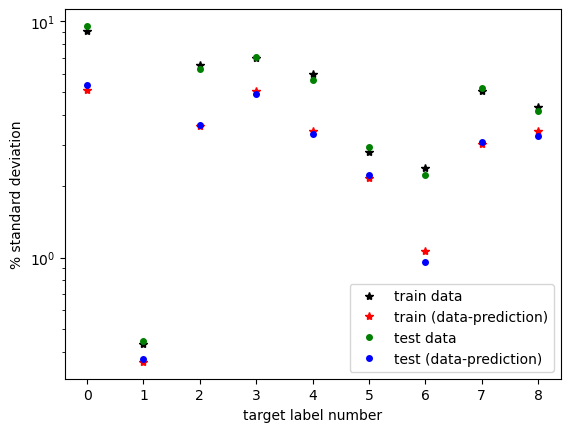

In [231]:
print(listp2)
plt.plot(statlin[6],statlin[1],'*',ms=6,color='black',label='train data') 
plt.plot(statlin[6],statlin[2],'*',ms=6,color='red',label='train (data-prediction)') 
plt.plot(statlin[6],statlin[4],'o',ms=4,color='green',label='test data') 
plt.plot(statlin[6],statlin[5],'o',ms=4,color='blue',label='test (data-prediction)') 
plt.legend(loc="best")
plt.ylabel("% standard deviation")
plt.xlabel("target label number")
plt.yscale("log")
#does not change after normnalization

['male', 'single_male', 'single_female', 'married_total', 'widowed_total', 'divorced_male', 'male_18_24', 'female_18_24', 'male_25_29', 'female_25_29', 'male_30_39', 'female_30_39', 'male_40_49', 'female_40_49', 'male_50_64', 'female_50_64', 'male_65_74', 'female_65_74', 'male_75_and_older', 'female_75_and_older', 'birth_country_germany', 'birth_country_eu27', 'birth_country_other_europe', 'birth_country_other_continents', 'religion_catholic', 'religion_protestant']
[ 0.86368652 -2.95590006 -0.92210937 -5.14188796 -4.45374309 -2.03039994
 -0.04857385  0.17026781 -0.33287593  0.36314826 -0.47571768  0.65756612
 -0.02763378  1.06478779 -0.81779299  0.71007667  0.61138233  0.20850727
  0.63609873  1.02787694 -0.99016901  0.05595919 -0.10024635 -0.25303705
  0.21071568  1.38648384 11.88110939]


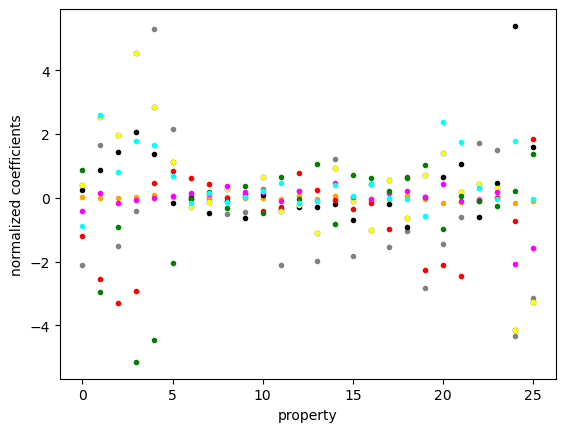

In [232]:
print(listg2)
plt.plot(coefs[0:26,9],coefs[0:26,0],'o',ms=3,color='gray',label=f'{listp2[0]}') 
plt.plot(coefs[0:26,9],coefs[0:26,1],'o',ms=3,color='orange',label=f'{listp2[1]}')
plt.plot(coefs[0:26,9],coefs[0:26,2],'o',ms=3,color='black',label=f'{listp2[2]}') 
plt.plot(coefs[0:26,9],coefs[0:26,3],'o',ms=3,color='red',label=f'{listp2[3]}')
plt.plot(coefs[0:26,9],coefs[0:26,4],'o',ms=3,color='blue',label=f'{listp2[4]}') 
plt.plot(coefs[0:26,9],coefs[0:26,4],'o',ms=3,color='yellow',label=f'{listp2[5]}')
plt.plot(coefs[0:26,9],coefs[0:26,6],'o',ms=3,color='magenta',label=f'{listp2[6]}') 
plt.plot(coefs[0:26,9],coefs[0:26,7],'o',ms=3,color='green',label=f'{listp2[7]}')
plt.plot(coefs[0:26,9],coefs[0:26,8],'o',ms=3,color='cyan',label=f'{listp2[8]}')
#plt.legend(loc="best")
plt.ylabel("normalized coefficients")
plt.xlabel("property")
#plt.xscale("log")
#plt.yscale("log")
#something wrong all religion positive for chrsiatin is wrong 
#now somewhat more differences and more seem irrelevant (all the ince which have small shares)
#values cahnge a lot here, prediction goodness less
print(coefs[0:29,7])
#still big signal in first part  civil union is too small part for omitting for stable fits 

(2020, 9)


Text(0.5, 0, 'prediction')

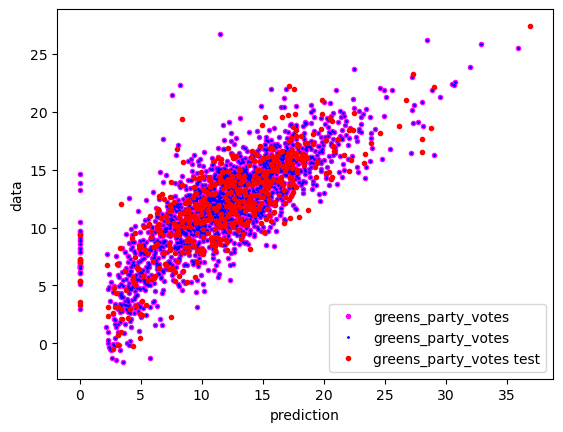

In [233]:
print(np.shape(predtr))
pg=coefs[26,7]+np.matmul(norm_feat_train,coefs[0:26,7]) #prediction works and does what it should but still strange numnbers
plt.plot(tar_train.iloc[:,7],predtr[:,7],'o',ms=3,color='magenta',label=f'{listp2[7]}') 
plt.plot(tar_train.iloc[:,7],pg,'o',ms=1,color='blue',label=f'{listp2[7]}') 
plt.plot(tar_test.iloc[:,7],predte[:,7],'o',ms=3,color='red',label=f'{listp2[7]} test') 
plt.legend(loc="best")
plt.ylabel("data")
plt.xlabel("prediction")
#prediction o.k. but seem that minors are not well done 
#seems like only get 

We try now to use Lasso L1 regularization to reduce the number of features. We do this for each label (party) separately, since it is not expected that the same are important for all. As criterain we use that the score in the test set is thhe same as in the origal sample. It is expected when excluding a few the scores first improves. However, that should be caused by random overfitting on training, the true perfamnace should be reached when the score is again the same as at the beginning. 

In [234]:
#first just doing for one at a time without a function

pars=np.zeros((8,40,len(listp2)))
for i in range(40):
    pars[0,i,0]=0.0001*1.35**i

    
for j in range(len(listp2)):
    print(listp2[j])
    for i in range(np.shape(pars)[1]):
        print(pars[0,i,0])
        reg = Lasso(alpha=pars[0,i,0],max_iter=1000).fit(norm_feat_train, tar_train.iloc[:,j]) 
        #print(reg.coef_)
        pars[1,i,j]=np.count_nonzero(reg.coef_!=0)
        print(np.where(reg.coef_==0,listg2, 0))
        predtrl=reg.predict(norm_feat_train)    
        predtel=reg.predict(norm_feat_test)
        pars[2,i,j]=tar_train.iloc[:,j].mean()
        pars[3,i,j]=tar_train.iloc[:,j].std()  
        pars[4,i,j]=np.std(tar_train.iloc[:,j]-predtrl)   
        pars[5,i,j]=tar_test.iloc[:,j].mean()
        pars[6,i,j]=tar_test.iloc[:,j].std()  
        pars[7,i,j]=np.std(tar_test.iloc[:,j]-predtel)
#somehow not converged     and increase does not help, likely correlation problem 
print(pars[1,:,:])
#too often of first part, need to exclude one there 

eligible_voters
0.0001
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.00013500000000000003
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.00018225000000000004
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.00024603750000000006
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.00033215062500000013
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.0004484033437500002
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.0006053445140625002
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.0008172150939843753
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '

['0' 'single_male' '0' '0' '0' '0' '0' '0' '0' '0' 'male_30_39' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
0.00024603750000000006
['0' 'single_male' '0' '0' '0' '0' '0' '0' '0' '0' 'male_30_39' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
0.00033215062500000013
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' 'male_30_39' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
0.0004484033437500002
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' 'male_30_39' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
0.0006053445140625002
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' 'male_30_39' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
0.0008172150939843753
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' 'male_30_39' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
0.001103240376878907
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' 'male_30_39' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' 'birth_country_other_europe' '0' '0' '0']
0.00148937

['0' '0' '0' '0' '0' '0' 'male_18_24' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
0.00018225000000000004
['0' '0' '0' '0' '0' '0' 'male_18_24' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
0.00024603750000000006
['0' '0' '0' '0' '0' '0' 'male_18_24' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
0.00033215062500000013
['0' '0' '0' '0' '0' '0' 'male_18_24' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
0.0004484033437500002
['0' '0' '0' '0' '0' '0' 'male_18_24' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
0.0006053445140625002
['0' '0' '0' '0' '0' '0' 'male_18_24' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
0.0008172150939843753
['0' '0' '0' '0' '0' '0' 'male_18_24' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
0.001103240376878907
['0' '0' '0' '0' '0' '0' 'male_1

8.967744015383046
['male' 'single_male' 'single_female' 'married_total' 'widowed_total'
 'divorced_male' 'male_18_24' 'female_18_24' 'male_25_29' 'female_25_29'
 'male_30_39' 'female_30_39' 'male_40_49' 'female_40_49' 'male_50_64'
 'female_50_64' 'male_65_74' 'female_65_74' 'male_75_and_older'
 'female_75_and_older' 'birth_country_germany' 'birth_country_eu27'
 'birth_country_other_europe' 'birth_country_other_continents'
 'religion_catholic' 'religion_protestant']
12.106454420767113
['male' 'single_male' 'single_female' 'married_total' 'widowed_total'
 'divorced_male' 'male_18_24' 'female_18_24' 'male_25_29' 'female_25_29'
 'male_30_39' 'female_30_39' 'male_40_49' 'female_40_49' 'male_50_64'
 'female_50_64' 'male_65_74' 'female_65_74' 'male_75_and_older'
 'female_75_and_older' 'birth_country_germany' 'birth_country_eu27'
 'birth_country_other_europe' 'birth_country_other_continents'
 'religion_catholic' 'religion_protestant']
social_democrats_party_votes
0.0001
['0' '0' '0' '0' '0' '0

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.00013500000000000003
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.00018225000000000004
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.00024603750000000006
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.00033215062500000013
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.0004484033437500002
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.0006053445140625002
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.0008172150939843753
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0'

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.00013500000000000003
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.00018225000000000004
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.00024603750000000006
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.00033215062500000013
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.0004484033437500002
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.0006053445140625002
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.0008172150939843753
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0'

0.00013500000000000003
['0' '0' '0' '0' 'widowed_total' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
0.00018225000000000004
['0' '0' '0' '0' 'widowed_total' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
0.00024603750000000006
['0' '0' '0' '0' 'widowed_total' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
0.00033215062500000013
['0' '0' '0' '0' 'widowed_total' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
0.0004484033437500002
['0' '0' '0' '0' 'widowed_total' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
0.0006053445140625002
['0' '0' '0' '0' 'widowed_total' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
0.0008172150939843753
['0' '0' '0' '0' 'widowed_total' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
0.0011032

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.00013500000000000003
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.00018225000000000004
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.00024603750000000006
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.00033215062500000013
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.0004484033437500002
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.0006053445140625002
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.0008172150939843753
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0'

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.00013500000000000003
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.00018225000000000004
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.00024603750000000006
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.00033215062500000013
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.0004484033437500002
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.0006053445140625002
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0']
0.0008172150939843753
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0'

8.967744015383046
['male' 'single_male' 'single_female' 'married_total' 'widowed_total'
 'divorced_male' 'male_18_24' 'female_18_24' 'male_25_29' 'female_25_29'
 'male_30_39' 'female_30_39' 'male_40_49' 'female_40_49' 'male_50_64'
 'female_50_64' 'male_65_74' 'female_65_74' 'male_75_and_older'
 'female_75_and_older' 'birth_country_germany' 'birth_country_eu27'
 'birth_country_other_europe' 'birth_country_other_continents'
 'religion_catholic' 'religion_protestant']
12.106454420767113
['male' 'single_male' 'single_female' 'married_total' 'widowed_total'
 'divorced_male' 'male_18_24' 'female_18_24' 'male_25_29' 'female_25_29'
 'male_30_39' 'female_30_39' 'male_40_49' 'female_40_49' 'male_50_64'
 'female_50_64' 'male_65_74' 'female_65_74' 'male_75_and_older'
 'female_75_and_older' 'birth_country_germany' 'birth_country_eu27'
 'birth_country_other_europe' 'birth_country_other_continents'
 'religion_catholic' 'religion_protestant']
[[26. 25. 25. 26. 26. 26. 25. 26. 26.]
 [26. 25. 25. 26. 26

['eligible_voters', 'not_valid_votes_party_votes', 'christian_unions_party_votes', 'social_democrats_party_votes', 'alternative_for_germany_party_votes', 'libertarians_party_votes', 'lefts_party_votes', 'greens_party_votes', 'others_party_votes']


(-0.01, 0.005)

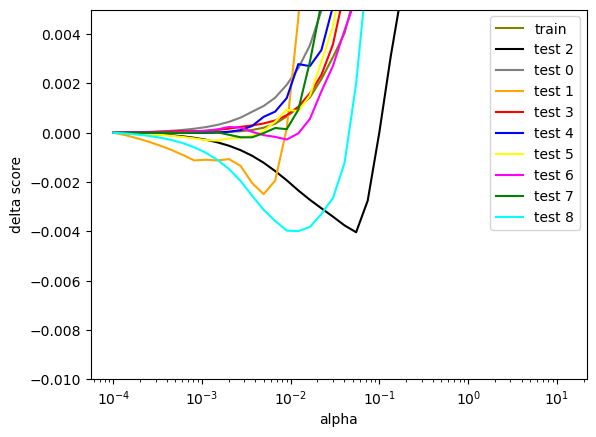

In [235]:
print(listp2)
plt.plot(pars[0,:,0],pars[4,:,2]/pars[3,:,2]-pars[4,0,2]/pars[3,0,2],'-',ms=1,color='olive',label='train')
plt.plot(pars[0,:,0],pars[7,:,2]/pars[6,:,2]-pars[7,0,2]/pars[6,0,2],'-',ms=1,color='black',label='test 2')
plt.plot(pars[0,:,0],pars[7,:,0]/pars[6,:,0]-pars[7,0,0]/pars[6,0,0],'-',ms=1,color='gray',label='test 0')
plt.plot(pars[0,:,0],pars[7,:,1]/pars[6,:,1]-pars[7,0,1]/pars[6,0,1],'-',ms=1,color='orange',label='test 1')
plt.plot(pars[0,:,0],pars[7,:,3]/pars[6,:,3]-pars[7,0,3]/pars[6,0,3],'-',ms=1,color='red',label='test 3')
plt.plot(pars[0,:,0],pars[7,:,4]/pars[6,:,4]-pars[7,0,4]/pars[6,0,4],'-',ms=1,color='blue',label='test 4')
plt.plot(pars[0,:,0],pars[7,:,5]/pars[6,:,5]-pars[7,0,5]/pars[6,0,5],'-',ms=1,color='yellow',label='test 5')
plt.plot(pars[0,:,0],pars[7,:,6]/pars[6,:,6]-pars[7,0,6]/pars[6,0,6],'-',ms=1,color='magenta',label='test 6')
plt.plot(pars[0,:,0],pars[7,:,7]/pars[6,:,7]-pars[7,0,7]/pars[6,0,7],'-',ms=1,color='green',label='test 7')
plt.plot(pars[0,:,0],pars[7,:,8]/pars[6,:,8]-pars[7,0,8]/pars[6,0,8],'-',ms=1,color='cyan',label='test 8')
plt.legend(loc="best")
plt.xlabel("alpha")
plt.ylabel("delta score")
plt.xscale("log")
plt.ylim(-0.01,0.005)
#some limit above to exclude maybe more subsets automatic ofr just repat

(-0.01, 0.005)

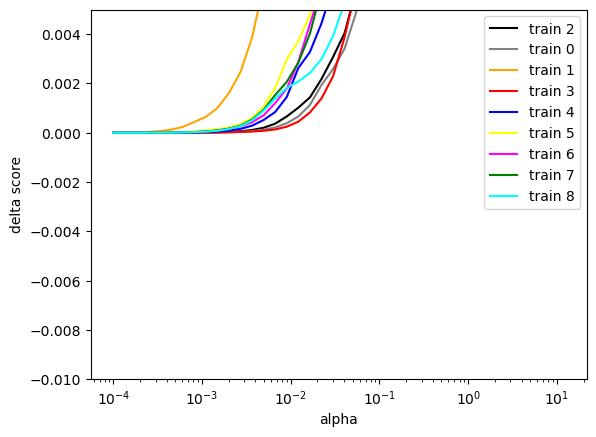

In [236]:
plt.plot(pars[0,:,0],pars[4,:,2]/pars[3,:,2]-pars[4,0,2]/pars[3,0,2],'-',ms=1,color='black',label='train 2')
plt.plot(pars[0,:,0],pars[4,:,0]/pars[3,:,0]-pars[4,0,0]/pars[3,0,0],'-',ms=1,color='gray',label='train 0')
plt.plot(pars[0,:,0],pars[4,:,1]/pars[3,:,1]-pars[4,0,1]/pars[3,0,1],'-',ms=1,color='orange',label='train 1')
plt.plot(pars[0,:,0],pars[4,:,3]/pars[3,:,3]-pars[4,0,3]/pars[3,0,3],'-',ms=1,color='red',label='train 3')
plt.plot(pars[0,:,0],pars[4,:,4]/pars[3,:,4]-pars[4,0,4]/pars[3,0,4],'-',ms=1,color='blue',label='train 4')
plt.plot(pars[0,:,0],pars[4,:,5]/pars[3,:,5]-pars[4,0,5]/pars[3,0,5],'-',ms=1,color='yellow',label='train 5')
plt.plot(pars[0,:,0],pars[4,:,6]/pars[3,:,6]-pars[4,0,6]/pars[3,0,6],'-',ms=1,color='magenta',label='train 6')
plt.plot(pars[0,:,0],pars[4,:,7]/pars[3,:,7]-pars[4,0,7]/pars[3,0,7],'-',ms=1,color='green',label='train 7')
plt.plot(pars[0,:,0],pars[4,:,8]/pars[3,:,8]-pars[4,0,8]/pars[3,0,8],'-',ms=1,color='cyan',label='train 8')
plt.legend(loc="best")
plt.xlabel("alpha")
plt.ylabel("delta score")
plt.xscale("log")
plt.ylim(-0.01,0.005)

In [237]:
for i in range(len(listp2)):
    print(listp2[i])
    delt=abs(pars[7,:,i]/pars[6,:,i]-pars[7,0,i]/pars[6,0,i]-0.002)
    s=np.argsort(delt)
    print(f"it are {int(pars[1,s[0],i])} features")
    reg = Lasso(alpha=pars[0,s[0],0],max_iter=1000).fit(norm_feat_train, tar_train.iloc[:,i]) 
    print(f"needed features are {np.where(reg.coef_!=0,listg2, 0)}")
#number of features varies a lot, without not ideal probably    

eligible_voters
it are 26 features
needed features are ['male' 'single_male' 'single_female' 'married_total' 'widowed_total'
 'divorced_male' 'male_18_24' 'female_18_24' 'male_25_29' 'female_25_29'
 'male_30_39' 'female_30_39' 'male_40_49' 'female_40_49' 'male_50_64'
 'female_50_64' 'male_65_74' 'female_65_74' 'male_75_and_older'
 'female_75_and_older' 'birth_country_germany' 'birth_country_eu27'
 'birth_country_other_europe' 'birth_country_other_continents'
 'religion_catholic' 'religion_protestant']
not_valid_votes_party_votes
it are 16 features
needed features are ['male' '0' 'single_female' '0' 'widowed_total' 'divorced_male'
 'male_18_24' '0' 'male_25_29' '0' '0' 'female_30_39' 'male_40_49'
 'female_40_49' 'male_50_64' '0' '0' '0' 'male_75_and_older' '0' '0'
 'birth_country_eu27' 'birth_country_other_europe'
 'birth_country_other_continents' 'religion_catholic'
 'religion_protestant']
christian_unions_party_votes
it are 11 features
needed features are ['male' '0' '0' 'married_tota

In [329]:
#now really feature omitting define function which does it for one label 
#gets features_train, labels_train, features_test, labels_train
def omit1(feat_train,tar_train,feat_test,tar_test,listg):
    statlind4=np.zeros((11,feat_train.shape[1]))
    statlind4[0,:]=np.arange(0,feat_train.shape[1],1)
    for i in range(feat_train.shape[1]):
        norm_feat_train_d4=feat_train.drop(labels=listg[i],axis=1).copy()
        norm_feat_test_d4=feat_test.drop(labels=listg[i],axis=1).copy()
        reg = LinearRegression().fit(norm_feat_train_d4, tar_train) 
        predtr=reg.predict(norm_feat_train_d4)    
        predte=reg.predict(norm_feat_test_d4)
        statlind4[1,i]=tar_train.mean()
        statlind4[2,i]=tar_train.std()  
        statlind4[3,i]=np.std(tar_train-predtr)   
        statlind4[4,i]=tar_test.mean()
        statlind4[5,i]=tar_test.std()  
        statlind4[6,i]=np.std(tar_test-predte)   
        statlind4[7,i]=statlind4[3,i]/statlind4[2,i]
        statlind4[8,i]=statlind4[6,i]/statlind4[5,i]
        statlind4[9,i]=0.5*statlind4[7,i]+0.5*statlind4[8,i]
        statlind4[10,i]=0.8*statlind4[7,i]+0.2*statlind4[8,i]        
    return statlind4

In [330]:
res=omit1(norm_feat_train,tar_train.iloc[:,0],norm_feat_test,tar_test.iloc[:,0],listg2)
print(res[7:11])

[[0.56490473 0.56405426 0.56450692 0.56359119 0.57627146 0.56667875
  0.56357459 0.56356827 0.56439024 0.56418395 0.56375527 0.57379826
  0.56365669 0.57150742 0.56579492 0.56847724 0.56358108 0.56627919
  0.56590695 0.56972392 0.56415158 0.56407278 0.56679142 0.56670747
  0.60301847 0.59117419]
 [0.56254712 0.55942722 0.56184821 0.55974742 0.56553462 0.56139373
  0.55986423 0.55959876 0.55859195 0.56331836 0.56052367 0.57378423
  0.56021547 0.57510164 0.56160288 0.56588081 0.5596072  0.56433389
  0.55945491 0.56594259 0.56154484 0.56120455 0.55972165 0.56237137
  0.61596266 0.60787857]
 [0.56372593 0.56174074 0.56317756 0.5616693  0.57090304 0.56403624
  0.56171941 0.56158352 0.56149109 0.56375115 0.56213947 0.57379125
  0.56193608 0.57330453 0.5636989  0.56717902 0.56159414 0.56530654
  0.56268093 0.56783325 0.56284821 0.56263866 0.56325654 0.56453942
  0.60949056 0.59952638]
 [0.56443321 0.56312885 0.56397518 0.56282244 0.5741241  0.56562174
  0.56283252 0.56277437 0.56323058 0.5640

In [338]:
#as before but add iterations to it and which is minimized 
def itomit(feat_train,tar_train,feat_test,tar_test,listg,x,y):
    its=np.zeros((11,x))
    print("iteration 0")
    res=omit1(feat_train,tar_train,feat_test,tar_test,listg)
    s=np.argmin(res[y,:])
    print(f"omitted is {listg[s]}")
    its[:,0]=res[:,s]
    listd2=[listg[s]]
    listg2=listg.copy()
    listg2.remove(listg[s])
    feat_train2=feat_train.drop(labels=listg[s],axis=1).copy()
    feat_test2=feat_test.drop(labels=listg[s],axis=1).copy()  
    feat_train=feat_train2.copy()
    feat_test=feat_test2.copy() 
    for j in range (1,x):
        print(f"iteration {j}")
        res=omit1(feat_train,tar_train,feat_test,tar_test,listg2)
        s=np.argmin(res[y,:])
        print(f"omitted is {listg2[s]}")
        its[:,j]=res[:,s]
        listd2.append(listg2[s])
        listg2=listg2.copy()
        listg2.remove(listg2[s])
        feat_train2=feat_train.drop(labels=listd2[j],axis=1).copy()
        feat_test2=feat_test.drop(labels=listd2[j],axis=1).copy() 
        feat_train=feat_train2.copy()
        feat_test=feat_test2.copy() 
    return listd2, its

In [360]:
listd0,its0=itomit(norm_feat_train,tar_train.iloc[:,0],norm_feat_test,tar_test.iloc[:,0],listg2,25,9)
print(listd0)
print(its0)
listd1,its1=itomit(norm_feat_train,tar_train.iloc[:,1],norm_feat_test,tar_test.iloc[:,1],listg2,25,9)
print(listd0)
print(its1)
listd2,its2=itomit(norm_feat_train,tar_train.iloc[:,2],norm_feat_test,tar_test.iloc[:,2],listg2,25,9)
print(listd0)
print(its2)
listd3,its3=itomit(norm_feat_train,tar_train.iloc[:,3],norm_feat_test,tar_test.iloc[:,3],listg2,25,9)
print(listd3)
print(its3)
listd4,its4=itomit(norm_feat_train,tar_train.iloc[:,4],norm_feat_test,tar_test.iloc[:,4],listg2,25,9)
print(listd4)
print(its4)
listd5,its5=itomit(norm_feat_train,tar_train.iloc[:,5],norm_feat_test,tar_test.iloc[:,5],listg2,25,9)
print(listd5)
print(its5)
listd6,its6=itomit(norm_feat_train,tar_train.iloc[:,6],norm_feat_test,tar_test.iloc[:,6],listg2,25,9)
print(listd6)
print(its6)
listd7,its7=itomit(norm_feat_train,tar_train.iloc[:,7],norm_feat_test,tar_test.iloc[:,7],listg2,25,9)
print(listd7)
print(its7)
listd8,its8=itomit(norm_feat_train,tar_train.iloc[:,8],norm_feat_test,tar_test.iloc[:,8],listg2,25,9)
print(listd8)
print(its8)

iteration 0
omitted is male_25_29
iteration 1
omitted is female_18_24
iteration 2
omitted is male_65_74
iteration 3
omitted is married_total
iteration 4
omitted is male_18_24
iteration 5
omitted is male_40_49
iteration 6
omitted is male_30_39
iteration 7
omitted is birth_country_eu27
iteration 8
omitted is birth_country_germany
iteration 9
omitted is single_female
iteration 10
omitted is male_50_64
iteration 11
omitted is male
iteration 12
omitted is single_male
iteration 13
omitted is female_25_29
iteration 14
omitted is male_75_and_older
iteration 15
omitted is female_50_64
iteration 16
omitted is female_75_and_older
iteration 17
omitted is female_40_49
iteration 18
omitted is female_30_39
iteration 19
omitted is birth_country_other_europe
iteration 20
omitted is divorced_male
iteration 21
omitted is female_65_74
iteration 22
omitted is religion_protestant
iteration 23
omitted is religion_catholic
iteration 24
omitted is birth_country_other_continents
['male_25_29', 'female_18_24', '

omitted is female_30_39
iteration 1
omitted is birth_country_germany
iteration 2
omitted is female_65_74
iteration 3
omitted is married_total
iteration 4
omitted is female_75_and_older
iteration 5
omitted is male_50_64
iteration 6
omitted is single_male
iteration 7
omitted is single_female
iteration 8
omitted is male_18_24
iteration 9
omitted is male_30_39
iteration 10
omitted is female_40_49
iteration 11
omitted is male_25_29
iteration 12
omitted is male_40_49
iteration 13
omitted is birth_country_other_continents
iteration 14
omitted is female_18_24
iteration 15
omitted is male
iteration 16
omitted is widowed_total
iteration 17
omitted is male_65_74
iteration 18
omitted is male_75_and_older
iteration 19
omitted is female_50_64
iteration 20
omitted is birth_country_other_europe
iteration 21
omitted is birth_country_eu27
iteration 22
omitted is female_25_29
iteration 23
omitted is divorced_male
iteration 24
omitted is religion_protestant
['male_25_29', 'female_18_24', 'male_65_74', 'ma

omitted is female_65_74
iteration 1
omitted is male_18_24
iteration 2
omitted is male_40_49
iteration 3
omitted is male
iteration 4
omitted is birth_country_other_europe
iteration 5
omitted is birth_country_eu27
iteration 6
omitted is female_25_29
iteration 7
omitted is birth_country_other_continents
iteration 8
omitted is male_25_29
iteration 9
omitted is female_18_24
iteration 10
omitted is female_50_64
iteration 11
omitted is male_75_and_older
iteration 12
omitted is female_75_and_older
iteration 13
omitted is female_30_39
iteration 14
omitted is male_65_74
iteration 15
omitted is birth_country_germany
iteration 16
omitted is divorced_male
iteration 17
omitted is single_female
iteration 18
omitted is female_40_49
iteration 19
omitted is male_50_64
iteration 20
omitted is male_30_39
iteration 21
omitted is single_male
iteration 22
omitted is married_total
iteration 23
omitted is widowed_total
iteration 24
omitted is religion_protestant
['female_65_74', 'male_18_24', 'male_40_49', 'ma

omitted is single_female
iteration 1
omitted is female_75_and_older
iteration 2
omitted is female_30_39
iteration 3
omitted is male_65_74
iteration 4
omitted is female_25_29
iteration 5
omitted is birth_country_other_europe
iteration 6
omitted is birth_country_eu27
iteration 7
omitted is female_65_74
iteration 8
omitted is female_50_64
iteration 9
omitted is male_40_49
iteration 10
omitted is female_40_49
iteration 11
omitted is married_total
iteration 12
omitted is divorced_male
iteration 13
omitted is male_18_24
iteration 14
omitted is male_30_39
iteration 15
omitted is male_75_and_older
iteration 16
omitted is single_male
iteration 17
omitted is male
iteration 18
omitted is birth_country_other_continents
iteration 19
omitted is female_18_24
iteration 20
omitted is male_50_64
iteration 21
omitted is widowed_total
iteration 22
omitted is male_25_29
iteration 23
omitted is birth_country_germany
iteration 24
omitted is religion_protestant
['single_female', 'female_75_and_older', 'female

omitted is single_female
iteration 1
omitted is female_30_39
iteration 2
omitted is female_75_and_older
iteration 3
omitted is birth_country_other_europe
iteration 4
omitted is birth_country_other_continents
iteration 5
omitted is male_25_29
iteration 6
omitted is female_25_29
iteration 7
omitted is female_18_24
iteration 8
omitted is male_18_24
iteration 9
omitted is married_total
iteration 10
omitted is divorced_male
iteration 11
omitted is female_65_74
iteration 12
omitted is male_40_49
iteration 13
omitted is male
iteration 14
omitted is female_50_64
iteration 15
omitted is religion_protestant
iteration 16
omitted is male_50_64
iteration 17
omitted is male_65_74
iteration 18
omitted is male_30_39
iteration 19
omitted is female_40_49
iteration 20
omitted is male_75_and_older
iteration 21
omitted is widowed_total
iteration 22
omitted is single_male
iteration 23
omitted is birth_country_eu27
iteration 24
omitted is birth_country_germany
['single_female', 'female_30_39', 'female_75_and

(25,)
(11, 25)


Text(0, 0.5, 'test score')

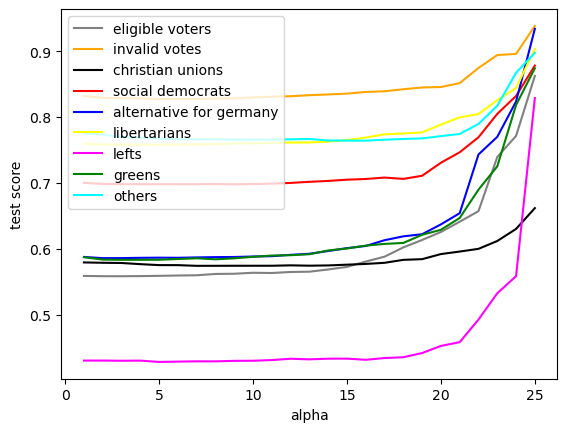

In [361]:
omit=np.arange(1,26,1)
print(np.shape(omit))
print(np.shape(its0))
listp4=['eligible voters','invalid votes','christian unions', 'social democrats', 'alternative for germany', 'libertarians', 'lefts', 'greens', 'others']
plt.plot(omit,its0[8,:],'-',ms=1,color='gray',label=listp4[0])
plt.plot(omit,its1[8,:],'-',ms=1,color='orange',label=listp4[1])
plt.plot(omit,its2[8,:],'-',ms=1,color='black',label=listp4[2])
plt.plot(omit,its3[8,:],'-',ms=1,color='red',label=listp4[3])
plt.plot(omit,its4[8,:],'-',ms=1,color='blue',label=listp4[4])
plt.plot(omit,its5[8,:],'-',ms=1,color='yellow',label=listp4[5])
plt.plot(omit,its6[8,:],'-',ms=1,color='magenta',label=listp4[6])
plt.plot(omit,its7[8,:],'-',ms=1,color='green',label=listp4[7])
plt.plot(omit,its8[8,:],'-',ms=1,color='cyan',label=listp4[8])
plt.legend(loc="best")
plt.xlabel("alpha")
plt.ylabel("test score")
#plt.xscale("log")
#plt.ylim(-0.01,0.005)
#o.k. maybe more partitation of data? 

[0.5595934  0.84150972 0.58066486 0.70166784 0.59064057 0.76179932
 0.43059596 0.59151876 0.77876225]


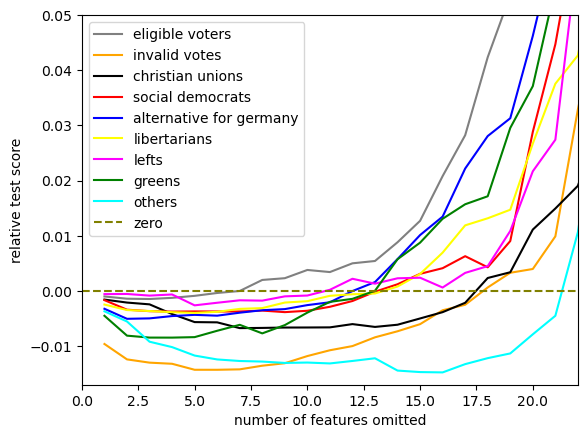

In [384]:
listp4=['eligible voters','invalid votes','christian unions', 'social democrats', 'alternative for germany', 'libertarians', 'lefts', 'greens', 'others']
plt.plot(omit,its0[8,:]-statlin[5,0]/statlin[4,0],'-',ms=1,color='gray',label=listp4[0])
plt.plot(omit,its1[8,:]-statlin[5,1]/statlin[4,1],'-',ms=1,color='orange',label=listp4[1])
plt.plot(omit,its2[8,:]-statlin[5,2]/statlin[4,2],'-',ms=1,color='black',label=listp4[2])
plt.plot(omit,its3[8,:]-statlin[5,3]/statlin[4,3],'-',ms=1,color='red',label=listp4[3])
plt.plot(omit,its4[8,:]-statlin[5,4]/statlin[4,4],'-',ms=1,color='blue',label=listp4[4])
plt.plot(omit,its5[8,:]-statlin[5,5]/statlin[4,5],'-',ms=1,color='yellow',label=listp4[5])
plt.plot(omit,its6[8,:]-statlin[5,6]/statlin[4,6],'-',ms=1,color='magenta',label=listp4[6])
plt.plot(omit,its7[8,:]-statlin[5,7]/statlin[4,7],'-',ms=1,color='green',label=listp4[7])
plt.plot(omit,its8[8,:]-statlin[5,8]/statlin[4,8],'-',ms=1,color='cyan',label=listp4[8])
plt.axhline(y=0, color='olive', linestyle='--', label='zero')
plt.legend(loc="best")
plt.xlabel("number of features omitted")
plt.ylabel("relative test score")
plt.xlim(0,22)
plt.ylim(-0.017, 0.05)
print(statlin[5]/statlin[4])

In our fit we omit always the feature without which the combined score (average of test and train) improves most. In all cases the score improves first indicating that there was overfitting. The amount varies a lot. For eligle voters after only 7 features the score is again as large as before. For all others at least 11 features can be omitted without decreasing the performcance on test, 21 in case of others. 

['eligible_voters', 'not_valid_votes_party_votes', 'christian_unions_party_votes', 'social_democrats_party_votes', 'alternative_for_germany_party_votes', 'libertarians_party_votes', 'lefts_party_votes', 'greens_party_votes', 'others_party_votes']
['male', 'single_male', 'single_female', 'married_total', 'widowed_total', 'divorced_male', 'divorced_female', 'male_18_24', 'female_18_24', 'male_25_29', 'female_25_29', 'male_30_39', 'female_30_39', 'male_40_49', 'female_40_49', 'male_50_64', 'female_50_64', 'male_65_74', 'female_65_74', 'male_75_and_older', 'female_75_and_older', 'birth_country_germany', 'birth_country_eu27', 'birth_country_other_europe', 'birth_country_other_continents', 'religion_catholic', 'religion_protestant']


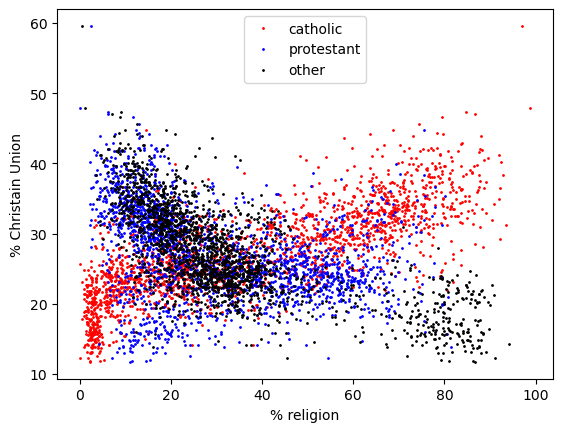

In [62]:
print(listp2)
plt.plot(feat_train['religion_catholic'],tar_train['christian_unions_party_votes'],'o',ms=1,color='red',label='catholic')
plt.plot(feat_train['religion_protestant'],tar_train['christian_unions_party_votes'],'o',ms=1,color='blue',label='protestant') 
plt.plot(100-feat_train['religion_catholic']-feat_train['religion_protestant'],tar_train['christian_unions_party_votes'],'o',ms=1,color='black',label='other')
plt.legend(loc="best")
plt.xlabel("% religion")
plt.ylabel("% Christain Union")
#plt.xscale("log")
#plt.yscale("log")
print(listg2)
#plot seems right why tehn coeeficient wrong? 

For most properties until now only few rather small countries are missing. This is no different for extreme poverty. We check how that relates with GDP per capita. 

In [61]:
reg = RandomForestRegressor(random_state=1,max_samples=0.5)
statfor=np.zeros((5,len(listp2)))
for i in range(0, len(listp2)):  
    statfor[0,i]=i
    print(listp2[i])

    reg.fit(feat_train,tar_train.iloc[:,i])
    predtr= reg.predict(feat_train)
    predte= reg.predict(feat_test)  
    statfor[1,i]=np.std(tar_train.iloc[:,i])    
    statfor[2,i]=np.std(predtr-tar_train.iloc[:,i])
    statfor[3,i]=np.std(tar_test.iloc[:,i])    
    statfor[4,i]=np.std(predte-tar_test.iloc[:,i])   

eligible_voters
not_valid_votes_party_votes
christian_unions_party_votes
social_democrats_party_votes
alternative_for_germany_party_votes
libertarians_party_votes
lefts_party_votes
greens_party_votes
others_party_votes


[[0.    9.274 3.161 8.931 5.04 ]
 [1.    0.43  0.215 0.432 0.344]
 [2.    6.515 2.08  6.482 3.333]
 [3.    6.931 2.627 7.194 4.251]
 [4.    5.898 1.835 6.167 3.082]
 [5.    2.856 1.227 2.825 1.942]
 [6.    2.417 0.647 2.309 0.899]
 [7.    5.028 1.595 5.121 2.444]
 [8.    4.288 1.641 4.257 2.511]]


Text(0.5, 0, 'target label number')

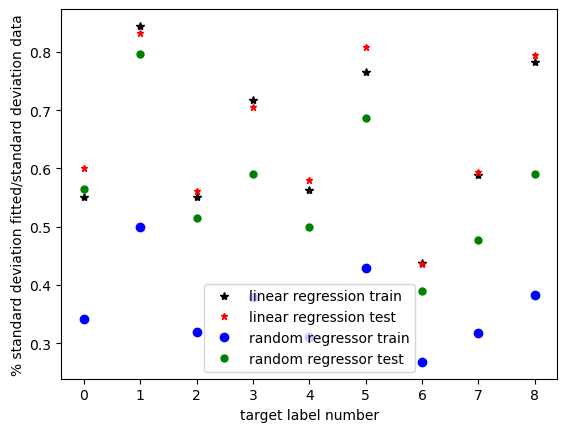

In [62]:
    
print(np.round(statfor.T,3))
plt.plot(statlin[6],statlin[2]/statlin[1],'*',ms=6,color='black',label='linear regression train') 
plt.plot(statlin[6],statlin[5]/statlin[4],'*',ms=5,color='red',label='linear regression test') 
plt.plot(statfor[0],statfor[2]/statfor[1],'o',ms=6,color='blue',label='random regressor train') 
plt.plot(statfor[0],statfor[4]/statfor[3],'o',ms=5,color='green',label='random regressor test') 
plt.legend(loc="best")
plt.ylabel("% standard deviation fitted/standard deviation data")
plt.xlabel("target label number")
#plt.yscale("log")
#random rgessor better bit not much still unclear why coefficent are as they are

In [63]:
#get coefs start with religions assume independence of others 
#normalized means that mean values are already the base
rel=np.zeros((3,9))
for i in range(9):
    rel[0,i]=coefs[27,i]+coefs[25,i]*(100-statg2[0,25])/statg2[1,25]+coefs[26,i]*(0-statg2[0,26])/statg2[1,26]
    rel[1,i]=coefs[27,i]+coefs[25,i]*(0-statg2[0,25])/statg2[1,25]+coefs[26,i]*(100-statg2[0,26])/statg2[1,26]
    rel[2,i]=coefs[27,i]+coefs[25,i]*(0-statg2[0,25])/statg2[1,25]+coefs[26,i]*(0-statg2[0,26])/statg2[1,26]    
print(rel)
print(statg2[0,25])

[[124.78592746   0.65491742  37.2527003   19.74619808   6.79178659
   10.61131998   1.24400099  10.24897163  14.10502242]
 [124.22223195   0.77544422  25.32239117  31.8802695    5.73294114
   12.1445898    0.93075719  16.19301468   7.79603652]
 [142.53355908   1.25162415  17.56225075  22.82762697  21.73345381
   12.61930658   8.98643728   9.72792433   6.54300029]]
37.963662304887514


['christian_unions_party_votes', 'social_democrats_party_votes', 'alternative_for_germany_party_votes', 'libertarians_party_votes', 'lefts_party_votes', 'greens_party_votes', 'others_party_votes']


Text(0.5, 1.0, 'catholic')

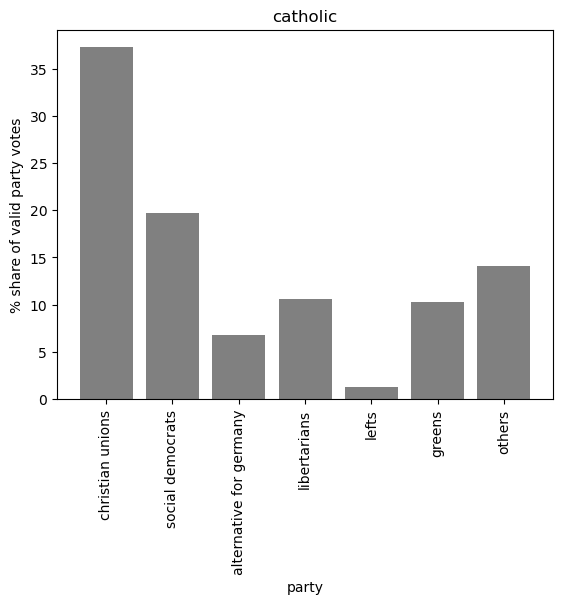

In [64]:
print(listp2[2:9])
listp3=['christian unions', 'social democrats', 'alternative for germany', 'libertarians', 'lefts', 'greens', 'others']
plt.bar(listp3,rel[0,2:9],color='gray') 
#plt.legend(loc="best")
plt.xticks(rotation='vertical')
plt.ylabel("% share of valid party votes")
plt.xlabel("party")
plt.title("catholic")

Text(0.5, 1.0, 'protestants')

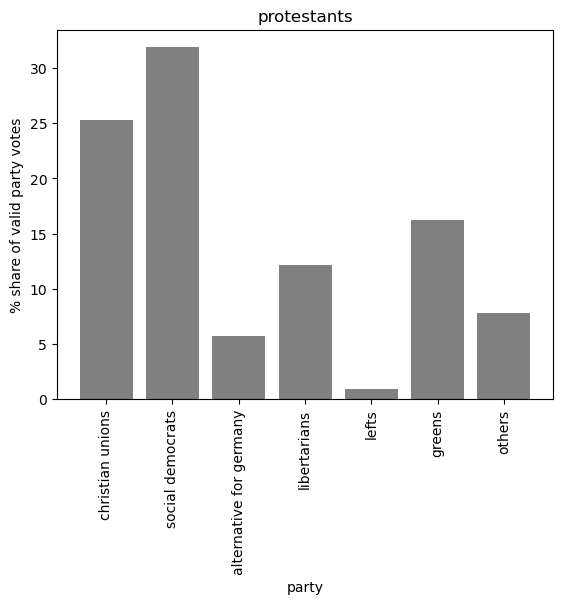

In [65]:
plt.bar(listp3,rel[1,2:9],color='gray') 
#plt.legend(loc="best")
plt.xticks(rotation='vertical')
plt.ylabel("% share of valid party votes")
plt.xlabel("party")
plt.title("protestants")

Text(0.5, 1.0, 'none or other religion')

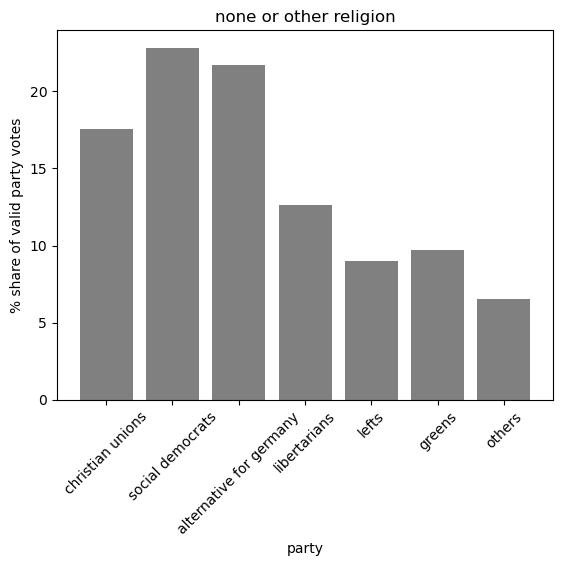

In [66]:
plt.bar(listp3,rel[2,2:9],color='gray') 
#plt.legend(loc="best")
plt.xticks(rotation=45)
plt.ylabel("% share of valid party votes")
plt.xlabel("party")
plt.title("none or other religion")

Text(0.5, 1.0, 'religion')

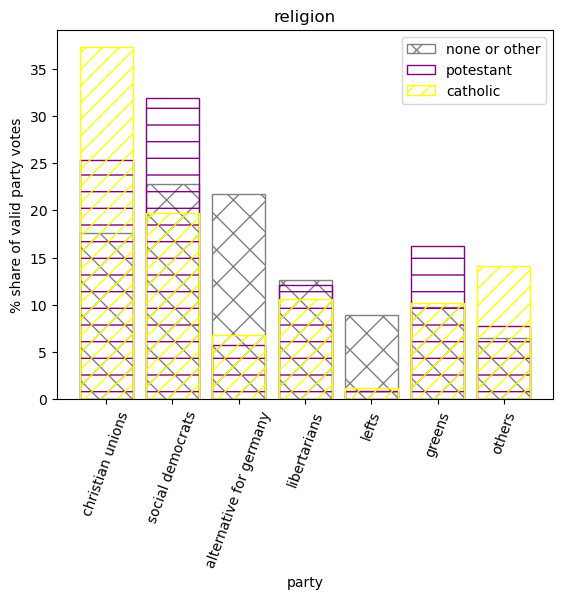

In [67]:
plt.bar(listp3,rel[2,2:9],facecolor='none',edgecolor='gray',hatch='\\/',label='none or other') 
plt.bar(listp3,rel[1,2:9],facecolor='none',edgecolor='purple',hatch='-',label='potestant') 
plt.bar(listp3,rel[0,2:9],facecolor='none',edgecolor='yellow',hatch='//',label='catholic') 
plt.legend(loc="best")
plt.xticks(rotation=70)
plt.ylabel("% share of valid party votes")
plt.xlabel("party")
plt.title("religion")


In [68]:
#status
print(listg2)
rel=np.zeros((7,9))
for i in range(9):
    rel[0,i]=coefs[27,i]+coefs[0,i]*(100-statg2[0,0])/statg2[1,0]+coefs[1,i]*(0-statg2[0,1])/statg2[1,1]+coefs[2,i]*(0-statg2[0,2])/statg2[1,2]+coefs[3,i]*(0-statg2[0,3])/statg2[1,3]+coefs[4,i]*(0-statg2[0,4])/statg2[1,4]+coefs[5,i]*(0-statg2[0,5])/statg2[1,5]+coefs[6,i]*(0-statg2[0,6])/statg2[1,6] 
print(rel)
#gets negative cote shares clear that diffiucl since variation is not giant
print(np.round(statg2[:,0:7],3))
print(statg2[0,6])

['single_male', 'single_female', 'married_total', 'widowed_total', 'divorced_male', 'divorced_female', 'civil_union_total', 'male_18_24', 'female_18_24', 'male_25_29', 'female_25_29', 'male_30_39', 'female_30_39', 'male_40_49', 'female_40_49', 'male_50_64', 'female_50_64', 'male_65_74', 'female_65_74', 'male_75_and_older', 'female_75_and_older', 'birth_country_germany', 'birth_country_eu27', 'birth_country_other_europe', 'birth_country_other_continents', 'religion_catholic', 'religion_protestant']
[[108.73378398   0.49065118  20.66044715 -69.13388632  26.46403193
   17.49490894   4.58567938  23.73105306  76.19776587]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.           0. 

The fact that the predictions in test are usually worse than in train shows that there are strong correlation between difefrent parameters. Besides making slightly predictions worse it also makes it very difficult to find which paramters matter most. Therefore we now omitt one parameter after the other starting with the full data sets.

In [69]:
print(norm_feat_train)
statlind1=np.zeros((10,len(listp2)+1,len(listg2)))
statlind1[6,:,0]=np.arange(0,10,1)
statlind1[9,0,:]=np.arange(0,27,1)
for i in range(len(listg2)):
    print(listg2[i])
    norm_feat_train_d=norm_feat_train.drop(labels=listg2[i],axis=1).copy()
    norm_feat_test_d=norm_feat_test.drop(labels=listg2[i],axis=1).copy()

    for j in range(len(listp2)):
        print(j)
        reg = LinearRegression().fit(norm_feat_train_d, tar_train.iloc[:,j]) #fit results seem to be bad
        predtr=reg.predict(norm_feat_train_d)    
        predte=reg.predict(norm_feat_test_d)
        statlind1[0,j,i]=tar_train.iloc[:,j].mean()
        statlind1[1,j,i]=tar_train.iloc[:,j].std()  
        statlind1[2,j,i]=np.std(tar_train.iloc[:,j]-predtr)   
        statlind1[3,j,i]=tar_test.iloc[:,j].mean()
        statlind1[4,j,i]=tar_test.iloc[:,j].std()  
        statlind1[5,j,i]=np.std(tar_test.iloc[:,j]-predte)   
        statlind1[7,j,i]=statlind1[2,j,i]/statlind1[1,j,i]
        statlind1[8,j,i]=statlind1[5,j,i]/statlind1[4,j,i]
    statlind1[7,len(listp2),i]=np.mean(statlind1[7,0:len(listp2),i])  
    statlind1[8,len(listp2),i]=np.mean(statlind1[8,0:len(listp2),i]) 

      single_male  single_female  married_total  widowed_total  divorced_male  \
9343    -0.325212      -1.704981       0.843980       1.480058       0.315360   
5603     1.171698       0.479061      -0.387135      -0.214080      -0.811951   
1991    -0.906524      -0.602142       0.409508       0.704295       0.478584   
6920    -0.202786      -1.075535       0.547743      -0.207970       1.173211   
5776     1.412724       0.982452       0.056460      -1.620370      -1.011449   
...           ...            ...            ...            ...            ...   
4900     0.048646       0.674762       0.306799      -1.135140      -0.480718   
4795     0.602712       0.822185      -0.066500      -1.267935      -0.458420   
5168    -0.204991      -0.273384       0.545377       0.423884      -0.656764   
1920    -0.985570      -0.554548       1.160307      -0.463604      -0.210553   
5120    -1.202683       0.367531      -0.804143       1.059098       0.442211   

      divorced_female  civi

smallest effect in train has property (4, 'divorced_male')
smallest effect in test has property (9, 'male_25_29')
smallest effect in test+ train has property nr (13, 'male_40_49')


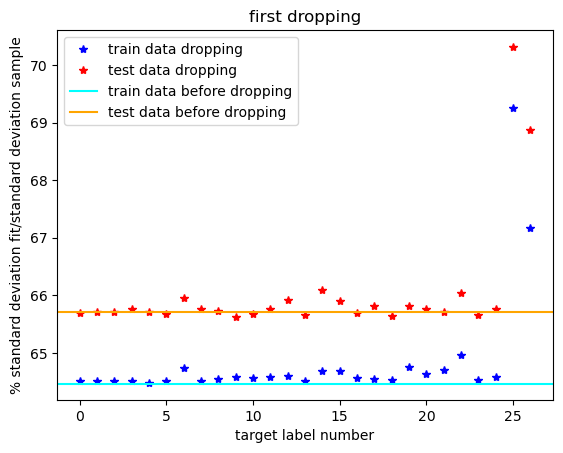

In [70]:


plt.plot(statlind1[9,0,:],100*statlind1[7,9,:],'*',ms=6,color='blue',label='train data dropping ') 
plt.plot(statlind1[9,0,:],100*statlind1[8,9,:],'*',ms=6,color='red',label='test data dropping') 
plt.axhline(y=100*np.mean(statlin[2,:]/statlin[1,:]), color='cyan', linestyle='-', label='train data before dropping')
plt.axhline(y=100*np.mean(statlin[5,:]/statlin[4,:]), color='orange', linestyle='-', label='test data before dropping')
plt.legend(loc="best")
plt.ylabel("% standard deviation fit/standard deviation sample")
plt.xlabel("target label number")
plt.title("first dropping")
#plt.yscale("log")
print(f"smallest effect in train has property {np.argmin(statlind1[7,9,:]), listg2[np.argmin(statlind1[7,9,:])]}")
print(f"smallest effect in test has property {np.argmin(statlind1[8,9,:]), listg2[np.argmin(statlind1[8,9,:])]}")
print(f"smallest effect in test+ train has property nr {np.argmin(statlind1[8,9,:]+statlind1[7,9,:]), listg2[np.argmin(statlind1[8,9,:]+statlind1[7,9,:])]}")

There are several which have similar very small predictive power, we use train and test together for now and exclude male_40_49 for now. We iterate further since it is rather clear that several are not needed.

In [71]:
norm_feat_train_d=norm_feat_train.drop(labels='male_40_49',axis=1).copy()
norm_feat_test_d=norm_feat_test.drop(labels='male_40_49',axis=1).copy()
listg3=listg2.copy()
listg3.remove('male_40_49')
print(listg3)
statlind2=np.zeros((10,len(listp2)+1,len(listg3)))
statlind2[6,:,0]=np.arange(0,10,1)
statlind2[9,0,:]=np.arange(0,26,1)
for i in range(len(listg3)):
    print(listg3[i])
    norm_feat_train_d2=norm_feat_train_d.drop(labels=listg3[i],axis=1).copy()
    norm_feat_test_d2=norm_feat_test_d.drop(labels=listg3[i],axis=1).copy()

    for j in range(len(listp2)):
        print(j)
        reg = LinearRegression().fit(norm_feat_train_d2, tar_train.iloc[:,j]) #fit results seem to be bad
        predtr=reg.predict(norm_feat_train_d2)    
        predte=reg.predict(norm_feat_test_d2)
        statlind2[0,j,i]=tar_train.iloc[:,j].mean()
        statlind2[1,j,i]=tar_train.iloc[:,j].std()  
        statlind2[2,j,i]=np.std(tar_train.iloc[:,j]-predtr)   
        statlind2[3,j,i]=tar_test.iloc[:,j].mean()
        statlind2[4,j,i]=tar_test.iloc[:,j].std()  
        statlind2[5,j,i]=np.std(tar_test.iloc[:,j]-predte)   
        statlind2[7,j,i]=statlind2[2,j,i]/statlind2[1,j,i]
        statlind2[8,j,i]=statlind2[5,j,i]/statlind2[4,j,i]
    statlind2[7,len(listp2),i]=np.mean(statlind2[7,0:len(listp2),i])  
    statlind2[8,len(listp2),i]=np.mean(statlind2[8,0:len(listp2),i]) 

['single_male', 'single_female', 'married_total', 'widowed_total', 'divorced_male', 'divorced_female', 'civil_union_total', 'male_18_24', 'female_18_24', 'male_25_29', 'female_25_29', 'male_30_39', 'female_30_39', 'female_40_49', 'male_50_64', 'female_50_64', 'male_65_74', 'female_65_74', 'male_75_and_older', 'female_75_and_older', 'birth_country_germany', 'birth_country_eu27', 'birth_country_other_europe', 'birth_country_other_continents', 'religion_catholic', 'religion_protestant']
single_male
0
1
2
3
4
5
6
7
8
single_female
0
1
2
3
4
5
6
7
8
married_total
0
1
2
3
4
5
6
7
8
widowed_total
0
1
2
3
4
5
6
7
8
divorced_male
0
1
2
3
4
5
6
7
8
divorced_female
0
1
2
3
4
5
6
7
8
civil_union_total
0
1
2
3
4
5
6
7
8
male_18_24
0
1
2
3
4
5
6
7
8
female_18_24
0
1
2
3
4
5
6
7
8
male_25_29
0
1
2
3
4
5
6
7
8
female_25_29
0
1
2
3
4
5
6
7
8
male_30_39
0
1
2
3
4
5
6
7
8
female_30_39
0
1
2
3
4
5
6
7
8
female_40_49
0
1
2
3
4
5
6
7
8
male_50_64
0
1
2
3
4
5
6
7
8
female_50_64
0
1
2
3
4
5
6
7
8
male_65_74
0

smallest effect in train has property (4, 'divorced_male')
smallest effect in test has property (9, 'male_25_29')
smallest effect in test+ train has property nr (9, 'male_25_29')


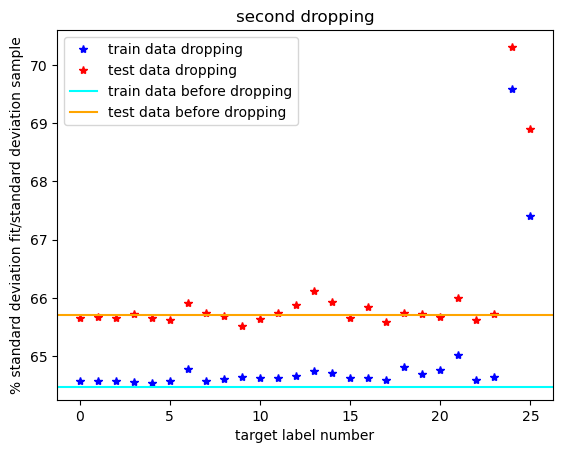

In [72]:
plt.plot(statlind2[9,0,:],100*statlind2[7,9,:],'*',ms=6,color='blue',label='train data dropping ') 
plt.plot(statlind2[9,0,:],100*statlind2[8,9,:],'*',ms=6,color='red',label='test data dropping') 
plt.axhline(y=100*np.mean(statlin[2,:]/statlin[1,:]), color='cyan', linestyle='-', label='train data before dropping')
plt.axhline(y=100*np.mean(statlin[5,:]/statlin[4,:]), color='orange', linestyle='-', label='test data before dropping')
plt.legend(loc="best")
plt.ylabel("% standard deviation fit/standard deviation sample")
plt.xlabel("target label number")
plt.title("second dropping")
#plt.yscale("log")
print(f"smallest effect in train has property {np.argmin(statlind2[7,9,:]), listg3[np.argmin(statlind2[7,9,:])]}")
print(f"smallest effect in test has property {np.argmin(statlind2[8,9,:]), listg3[np.argmin(statlind2[8,9,:])]}")
print(f"smallest effect in test+ train has property nr {np.argmin(statlind2[8,9,:]+statlind2[7,9,:]), listg3[np.argmin(statlind2[8,9,:]+statlind2[7,9,:])]}")

Now omitting property male_25_29.

In [73]:
norm_feat_train_d2=norm_feat_train_d.drop(labels='male_25_29',axis=1).copy()
norm_feat_test_d2=norm_feat_test_d.drop(labels='male_25_29',axis=1).copy()
listg4=listg3.copy()
listg4.remove('male_25_29')
print(listg4)
statlind3=np.zeros((10,len(listp2)+1,len(listg4)))
statlind3[6,:,0]=np.arange(0,10,1)
statlind3[9,0,:]=np.arange(0,25,1)
for i in range(len(listg4)):
    print(listg4[i])
    norm_feat_train_d3=norm_feat_train_d2.drop(labels=listg4[i],axis=1).copy()
    norm_feat_test_d3=norm_feat_test_d2.drop(labels=listg4[i],axis=1).copy()

    for j in range(len(listp2)):
        print(j)
        reg = LinearRegression().fit(norm_feat_train_d3, tar_train.iloc[:,j]) #fit results seem to be bad
        predtr=reg.predict(norm_feat_train_d3)    
        predte=reg.predict(norm_feat_test_d3)
        statlind3[0,j,i]=tar_train.iloc[:,j].mean()
        statlind3[1,j,i]=tar_train.iloc[:,j].std()  
        statlind3[2,j,i]=np.std(tar_train.iloc[:,j]-predtr)   
        statlind3[3,j,i]=tar_test.iloc[:,j].mean()
        statlind3[4,j,i]=tar_test.iloc[:,j].std()  
        statlind3[5,j,i]=np.std(tar_test.iloc[:,j]-predte)   
        statlind3[7,j,i]=statlind3[2,j,i]/statlind3[1,j,i]
        statlind3[8,j,i]=statlind3[5,j,i]/statlind3[4,j,i]
    statlind3[7,len(listp2),i]=np.mean(statlind3[7,0:len(listp2),i])  
    statlind3[8,len(listp2),i]=np.mean(statlind3[8,0:len(listp2),i]) 

['single_male', 'single_female', 'married_total', 'widowed_total', 'divorced_male', 'divorced_female', 'civil_union_total', 'male_18_24', 'female_18_24', 'female_25_29', 'male_30_39', 'female_30_39', 'female_40_49', 'male_50_64', 'female_50_64', 'male_65_74', 'female_65_74', 'male_75_and_older', 'female_75_and_older', 'birth_country_germany', 'birth_country_eu27', 'birth_country_other_europe', 'birth_country_other_continents', 'religion_catholic', 'religion_protestant']
single_male
0
1
2
3
4
5
6
7
8
single_female
0
1
2
3
4
5
6
7
8
married_total
0
1
2
3
4
5
6
7
8
widowed_total
0
1
2
3
4
5
6
7
8
divorced_male
0
1
2
3
4
5
6
7
8
divorced_female
0
1
2
3
4
5
6
7
8
civil_union_total
0
1
2
3
4
5
6
7
8
male_18_24
0
1
2
3
4
5
6
7
8
female_18_24
0
1
2
3
4
5
6
7
8
female_25_29
0
1
2
3
4
5
6
7
8
male_30_39
0
1
2
3
4
5
6
7
8
female_30_39
0
1
2
3
4
5
6
7
8
female_40_49
0
1
2
3
4
5
6
7
8
male_50_64
0
1
2
3
4
5
6
7
8
female_50_64
0
1
2
3
4
5
6
7
8
male_65_74
0
1
2
3
4
5
6
7
8
female_65_74
0
1
2
3
4
5
6

smallest effect in train has property (4, 'divorced_male')
smallest effect in test has property (16, 'female_65_74')
smallest effect in test+ train has property nr (5, 'divorced_female')


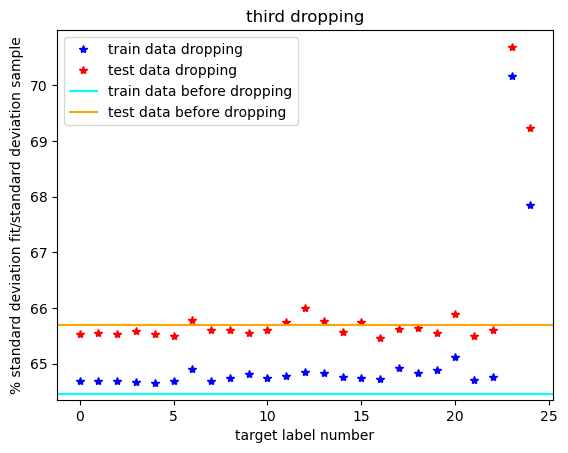

In [74]:
plt.plot(statlind3[9,0,:],100*statlind3[7,9,:],'*',ms=6,color='blue',label='train data dropping ') 
plt.plot(statlind3[9,0,:],100*statlind3[8,9,:],'*',ms=6,color='red',label='test data dropping') 
plt.axhline(y=100*np.mean(statlin[2,:]/statlin[1,:]), color='cyan', linestyle='-', label='train data before dropping')
plt.axhline(y=100*np.mean(statlin[5,:]/statlin[4,:]), color='orange', linestyle='-', label='test data before dropping')
plt.legend(loc="best")
plt.ylabel("% standard deviation fit/standard deviation sample")
plt.xlabel("target label number")
plt.title("third dropping")
#plt.yscale("log")
print(f"smallest effect in train has property {np.argmin(statlind3[7,9,:]), listg4[np.argmin(statlind3[7,9,:])]}")
print(f"smallest effect in test has property {np.argmin(statlind3[8,9,:]), listg4[np.argmin(statlind3[8,9,:])]}")
print(f"smallest effect in test+ train has property nr {np.argmin(statlind3[8,9,:]+statlind3[7,9,:]), listg4[np.argmin(statlind3[8,9,:]+statlind3[7,9,:])]}")

Omitting divorced female now.

In [75]:
norm_feat_train_d3=norm_feat_train_d2.drop(labels='divorced_female',axis=1).copy()
norm_feat_test_d3=norm_feat_test_d2.drop(labels='divorced_female',axis=1).copy()
listg5=listg4.copy()
listg5.remove('divorced_female')
print(listg5)
statlind4=np.zeros((10,len(listp2)+1,len(listg5)))
statlind4[6,:,0]=np.arange(0,10,1)
statlind4[9,0,:]=np.arange(0,24,1)
for i in range(len(listg5)):
    print(listg5[i])
    norm_feat_train_d4=norm_feat_train_d3.drop(labels=listg5[i],axis=1).copy()
    norm_feat_test_d4=norm_feat_test_d3.drop(labels=listg5[i],axis=1).copy()

    for j in range(len(listp2)):
        print(j)
        reg = LinearRegression().fit(norm_feat_train_d4, tar_train.iloc[:,j]) #fit results seem to be bad
        predtr=reg.predict(norm_feat_train_d4)    
        predte=reg.predict(norm_feat_test_d4)
        statlind4[0,j,i]=tar_train.iloc[:,j].mean()
        statlind4[1,j,i]=tar_train.iloc[:,j].std()  
        statlind4[2,j,i]=np.std(tar_train.iloc[:,j]-predtr)   
        statlind4[3,j,i]=tar_test.iloc[:,j].mean()
        statlind4[4,j,i]=tar_test.iloc[:,j].std()  
        statlind4[5,j,i]=np.std(tar_test.iloc[:,j]-predte)   
        statlind4[7,j,i]=statlind4[2,j,i]/statlind4[1,j,i]
        statlind4[8,j,i]=statlind4[5,j,i]/statlind4[4,j,i]
    statlind4[7,len(listp2),i]=np.mean(statlind4[7,0:len(listp2),i])  
    statlind4[8,len(listp2),i]=np.mean(statlind4[8,0:len(listp2),i]) 

['single_male', 'single_female', 'married_total', 'widowed_total', 'divorced_male', 'civil_union_total', 'male_18_24', 'female_18_24', 'female_25_29', 'male_30_39', 'female_30_39', 'female_40_49', 'male_50_64', 'female_50_64', 'male_65_74', 'female_65_74', 'male_75_and_older', 'female_75_and_older', 'birth_country_germany', 'birth_country_eu27', 'birth_country_other_europe', 'birth_country_other_continents', 'religion_catholic', 'religion_protestant']
single_male
0
1
2
3
4
5
6
7
8
single_female
0
1
2
3
4
5
6
7
8
married_total
0
1
2
3
4
5
6
7
8
widowed_total
0
1
2
3
4
5
6
7
8
divorced_male
0
1
2
3
4
5
6
7
8
civil_union_total
0
1
2
3
4
5
6
7
8
male_18_24
0
1
2
3
4
5
6
7
8
female_18_24
0
1
2
3
4
5
6
7
8
female_25_29
0
1
2
3
4
5
6
7
8
male_30_39
0
1
2
3
4
5
6
7
8
female_30_39
0
1
2
3
4
5
6
7
8
female_40_49
0
1
2
3
4
5
6
7
8
male_50_64
0
1
2
3
4
5
6
7
8
female_50_64
0
1
2
3
4
5
6
7
8
male_65_74
0
1
2
3
4
5
6
7
8
female_65_74
0
1
2
3
4
5
6
7
8
male_75_and_older
0
1
2
3
4
5
6
7
8
female_75_an

smallest effect in train has property (6, 'male_18_24')
smallest effect in test has property (0, 'single_male')
smallest effect in test+ train has property nr (20, 'birth_country_other_europe')


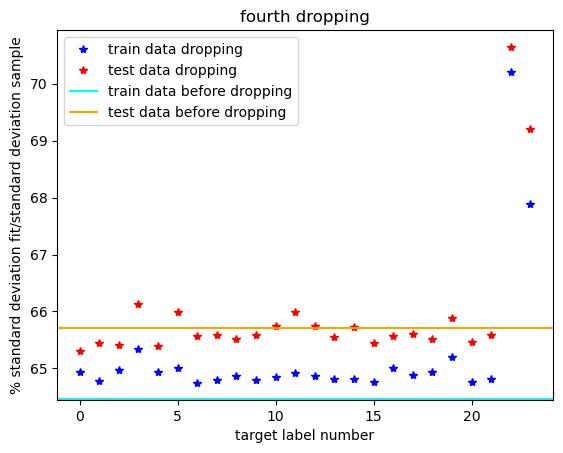

In [76]:
plt.plot(statlind4[9,0,:],100*statlind4[7,9,:],'*',ms=6,color='blue',label='train data dropping ') 
plt.plot(statlind4[9,0,:],100*statlind4[8,9,:],'*',ms=6,color='red',label='test data dropping') 
plt.axhline(y=100*np.mean(statlin[2,:]/statlin[1,:]), color='cyan', linestyle='-', label='train data before dropping')
plt.axhline(y=100*np.mean(statlin[5,:]/statlin[4,:]), color='orange', linestyle='-', label='test data before dropping')
plt.legend(loc="best")
plt.ylabel("% standard deviation fit/standard deviation sample")
plt.xlabel("target label number")
plt.title("fourth dropping")
#plt.yscale("log")
print(f"smallest effect in train has property {np.argmin(statlind4[7,9,:]), listg5[np.argmin(statlind4[7,9,:])]}")
print(f"smallest effect in test has property {np.argmin(statlind4[8,9,:]), listg5[np.argmin(statlind4[8,9,:])]}")
print(f"smallest effect in test+ train has property nr {np.argmin(statlind4[8,9,:]+statlind4[7,9,:]), listg5[np.argmin(statlind4[8,9,:]+statlind4[7,9,:])]}")

Remove birth country other europe

In [77]:
norm_feat_train_d4=norm_feat_train_d3.drop(labels='birth_country_other_europe',axis=1).copy()
norm_feat_test_d4=norm_feat_test_d3.drop(labels='birth_country_other_europe',axis=1).copy()
listg6=listg5.copy()
listg6.remove('birth_country_other_europe')
print(listg6)
print(norm_feat_train_d4.shape)
print(len(listp2))

['single_male', 'single_female', 'married_total', 'widowed_total', 'divorced_male', 'civil_union_total', 'male_18_24', 'female_18_24', 'female_25_29', 'male_30_39', 'female_30_39', 'female_40_49', 'male_50_64', 'female_50_64', 'male_65_74', 'female_65_74', 'male_75_and_older', 'female_75_and_older', 'birth_country_germany', 'birth_country_eu27', 'birth_country_other_continents', 'religion_catholic', 'religion_protestant']
(1864, 23)
9


In [78]:
#define function
def droppingone(feat_train,feat_test,tar_train,tar_test,listg):
    statlind4=np.zeros((10,10,feat_train.shape[1]))
    statlind4[6,:,0]=np.arange(0,10,1)
    statlind4[9,0,:]=np.arange(0,feat_train.shape[1],1)
    for i in range(feat_train.shape[1]):
        print(i)
        norm_feat_train_d4=feat_train.drop(labels=listg[i],axis=1).copy()
        norm_feat_test_d4=feat_test.drop(labels=listg[i],axis=1).copy()
        
        for j in range(len(listp2)):
            print(j)
            reg = LinearRegression().fit(norm_feat_train_d4, tar_train.iloc[:,j]) 
            predtr=reg.predict(norm_feat_train_d4)    
            predte=reg.predict(norm_feat_test_d4)
            statlind4[0,j,i]=tar_train.iloc[:,j].mean()
            statlind4[1,j,i]=tar_train.iloc[:,j].std()  
            statlind4[2,j,i]=np.std(tar_train.iloc[:,j]-predtr)   
            statlind4[3,j,i]=tar_test.iloc[:,j].mean()
            statlind4[4,j,i]=tar_test.iloc[:,j].std()  
            statlind4[5,j,i]=np.std(tar_test.iloc[:,j]-predte)   
            statlind4[7,j,i]=statlind4[2,j,i]/statlind4[1,j,i]
            statlind4[8,j,i]=statlind4[5,j,i]/statlind4[4,j,i]
        statlind4[7,9,i]=np.mean(statlind4[7,0:9,i])  
        statlind4[8,9,i]=np.mean(statlind4[8,0:9,i]) 
    return statlind4    

In [79]:
statlind5=droppingone(norm_feat_train_d4,norm_feat_test_d4,tar_train,tar_test,listg6)

0
0
1
2
3
4
5
6
7
8
1
0
1
2
3
4
5
6
7
8
2
0
1
2
3
4
5
6
7
8
3
0
1
2
3
4
5
6
7
8
4
0
1
2
3
4
5
6
7
8
5
0
1
2
3
4
5
6
7
8
6
0
1
2
3
4
5
6
7
8
7
0
1
2
3
4
5
6
7
8
8
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
10
0
1
2
3
4
5
6
7
8
11
0
1
2
3
4
5
6
7
8
12
0
1
2
3
4
5
6
7
8
13
0
1
2
3
4
5
6
7
8
14
0
1
2
3
4
5
6
7
8
15
0
1
2
3
4
5
6
7
8
16
0
1
2
3
4
5
6
7
8
17
0
1
2
3
4
5
6
7
8
18
0
1
2
3
4
5
6
7
8
19
0
1
2
3
4
5
6
7
8
20
0
1
2
3
4
5
6
7
8
21
0
1
2
3
4
5
6
7
8
22
0
1
2
3
4
5
6
7
8


smallest effect in train has property (6, 'male_18_24')
smallest effect in test has property (0, 'single_male')
smallest effect in test+ train has property nr (15, 'female_65_74')


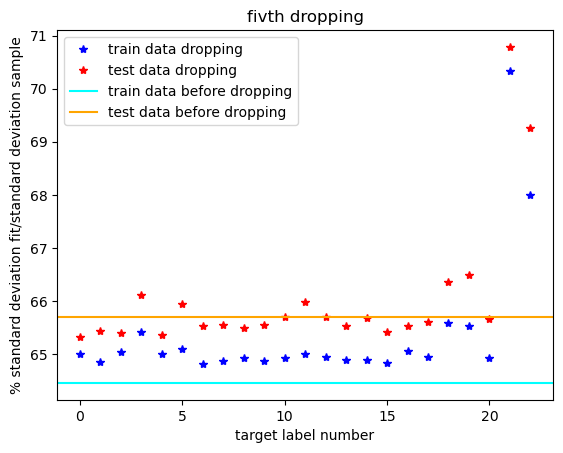

In [80]:
plt.plot(statlind5[9,0,:],100*statlind5[7,9,:],'*',ms=6,color='blue',label='train data dropping ') 
plt.plot(statlind5[9,0,:],100*statlind5[8,9,:],'*',ms=6,color='red',label='test data dropping') 
plt.axhline(y=100*np.mean(statlin[2,:]/statlin[1,:]), color='cyan', linestyle='-', label='train data before dropping')
plt.axhline(y=100*np.mean(statlin[5,:]/statlin[4,:]), color='orange', linestyle='-', label='test data before dropping')
plt.legend(loc="best")
plt.ylabel("% standard deviation fit/standard deviation sample")
plt.xlabel("target label number")
plt.title("fivth dropping")
#plt.yscale("log")
print(f"smallest effect in train has property {np.argmin(statlind5[7,9,:]), listg6[np.argmin(statlind5[7,9,:])]}")
print(f"smallest effect in test has property {np.argmin(statlind5[8,9,:]), listg6[np.argmin(statlind5[8,9,:])]}")
print(f"smallest effect in test+ train has property nr {np.argmin(statlind5[8,9,:]+statlind5[7,9,:]), listg6[np.argmin(statlind5[8,9,:]+statlind5[7,9,:])]}")

Smallest is female 65 to 74. 

In [81]:
norm_feat_train_d5=norm_feat_train_d4.drop(labels='female_65_74',axis=1).copy()
norm_feat_test_d5=norm_feat_test_d4.drop(labels='female_65_74',axis=1).copy()
listg7=listg6.copy()
listg7.remove('female_65_74')
print(listg7)


['single_male', 'single_female', 'married_total', 'widowed_total', 'divorced_male', 'civil_union_total', 'male_18_24', 'female_18_24', 'female_25_29', 'male_30_39', 'female_30_39', 'female_40_49', 'male_50_64', 'female_50_64', 'male_65_74', 'male_75_and_older', 'female_75_and_older', 'birth_country_germany', 'birth_country_eu27', 'birth_country_other_continents', 'religion_catholic', 'religion_protestant']


In [82]:
statlind6=droppingone(norm_feat_train_d5,norm_feat_test_d5,tar_train,tar_test,listg7)

0
0
1
2
3
4
5
6
7
8
1
0
1
2
3
4
5
6
7
8
2
0
1
2
3
4
5
6
7
8
3
0
1
2
3
4
5
6
7
8
4
0
1
2
3
4
5
6
7
8
5
0
1
2
3
4
5
6
7
8
6
0
1
2
3
4
5
6
7
8
7
0
1
2
3
4
5
6
7
8
8
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
10
0
1
2
3
4
5
6
7
8
11
0
1
2
3
4
5
6
7
8
12
0
1
2
3
4
5
6
7
8
13
0
1
2
3
4
5
6
7
8
14
0
1
2
3
4
5
6
7
8
15
0
1
2
3
4
5
6
7
8
16
0
1
2
3
4
5
6
7
8
17
0
1
2
3
4
5
6
7
8
18
0
1
2
3
4
5
6
7
8
19
0
1
2
3
4
5
6
7
8
20
0
1
2
3
4
5
6
7
8
21
0
1
2
3
4
5
6
7
8


smallest effect in train has property (6, 'male_18_24')
smallest effect in test has property (0, 'single_male')
smallest effect in test+ train has property nr (1, 'single_female')


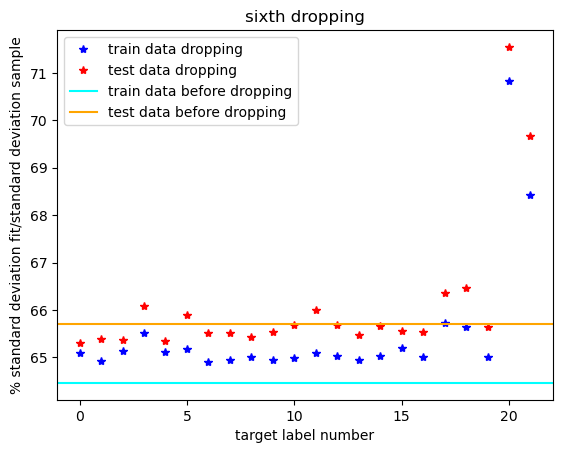

In [83]:
plt.plot(statlind6[9,0,:],100*statlind6[7,9,:],'*',ms=6,color='blue',label='train data dropping ') 
plt.plot(statlind6[9,0,:],100*statlind6[8,9,:],'*',ms=6,color='red',label='test data dropping') 
plt.axhline(y=100*np.mean(statlin[2,:]/statlin[1,:]), color='cyan', linestyle='-', label='train data before dropping')
plt.axhline(y=100*np.mean(statlin[5,:]/statlin[4,:]), color='orange', linestyle='-', label='test data before dropping')
plt.legend(loc="best")
plt.ylabel("% standard deviation fit/standard deviation sample")
plt.xlabel("target label number")
plt.title("sixth dropping")
#plt.yscale("log")
print(f"smallest effect in train has property {np.argmin(statlind6[7,9,:]), listg7[np.argmin(statlind6[7,9,:])]}")
print(f"smallest effect in test has property {np.argmin(statlind6[8,9,:]), listg7[np.argmin(statlind6[8,9,:])]}")
print(f"smallest effect in test+ train has property nr {np.argmin(statlind6[8,9,:]+statlind6[7,9,:]), listg7[np.argmin(statlind6[8,9,:]+statlind6[7,9,:])]}")

Smallest is single female

In [84]:
#or should be done sepeartely for all properties, but some are btter in test than train 
#most important for now
print(listg7[3],listg7[17],listg7[18],listg7[20],listg7[21])
#next to omit single female
#for fraction in population just use one category (and exclude one and maybe summarize very small) and fit
#in interpreration then disucss with others how reliable, because based on corrleations, to omit parameters
#thus omitting should be separately

widowed_total birth_country_germany birth_country_eu27 religion_catholic religion_protestant


We now analyse the religion voting pattern which seems to be one of the most important indicators. For the analysis we just use catholic and protestant, since the rest is fully determined by it. The rest is a combination of several, most important of non believers, but also of anthing else besides roman catholic and the main protestant church.  Besides the full Germany analysis we also split the sample into West and East to see how much of the variatian is caused by that. 

In [143]:
#should weight by population or not to get results? 
print(listg2[25:27])
sel4=sel2[(sel2[listg2[25]]>-0.5) & (sel2['qual_'+listg2[25]]!=1) & (sel2[listg2[26]]>-0.5) & (sel2['qual_'+listg2[26]]!=1)]
print(len(sel2))
print(len(sel4))
sel4e=sel4[sel4['unification']=='East']
sel4w=sel4[sel4['unification']=='West']
print(len(sel4e))

['religion_catholic', 'religion_protestant']
5088
4859
605


In [178]:
#get features
print(listg2)
featr=sel4.loc[:,['religion_catholic','religion_protestant']]
featr.iloc[:,0]=featr.iloc[:,0]/sel4.loc[:,'population']*100
featr.iloc[:,1]=featr.iloc[:,1]/sel4.loc[:,'population']*100
featre=sel4e.loc[:,['religion_catholic','religion_protestant']]
featre.iloc[:,0]=featre.iloc[:,0]/sel4e.loc[:,'population']*100
featre.iloc[:,1]=featre.iloc[:,1]/sel4e.loc[:,'population']*100
featrw=sel4w.loc[:,['religion_catholic','religion_protestant']]
featrw.iloc[:,0]=featrw.iloc[:,0]/sel4w.loc[:,'population']*100
featrw.iloc[:,1]=featrw.iloc[:,1]/sel4w.loc[:,'population']*100
print(featr)

['single_male', 'single_female', 'married_total', 'widowed_total', 'divorced_male', 'divorced_female', 'civil_union_total', 'male_18_24', 'female_18_24', 'male_25_29', 'female_25_29', 'male_30_39', 'female_30_39', 'male_40_49', 'female_40_49', 'male_50_64', 'female_50_64', 'male_65_74', 'female_65_74', 'male_75_and_older', 'female_75_and_older', 'birth_country_germany', 'birth_country_eu27', 'birth_country_other_europe', 'birth_country_other_continents', 'religion_catholic', 'religion_protestant']
      religion_catholic  religion_protestant
0              6.345887            49.681490
1              7.366126            41.290260
2              8.460569            48.263237
3              6.497171            49.652423
4              5.976313            56.630824
...                 ...                  ...
9964           2.854298            30.833057
9989           3.836645            21.346392
9996           2.810208            10.935758
9997           1.757812            10.180664
99

We calculate the voting share as function of the eligible voters because the turnout can vary between different religions. 

In [147]:

listp4=['valid_votes_party_votes','not_valid_votes_party_votes', 'christian_unions_party_votes', 'social_democrats_party_votes', 'alternative_for_germany_party_votes', 'libertarians_party_votes', 'lefts_party_votes', 'greens_party_votes', 'others_party_votes']
tarr=sel4.loc[:,[listp4[0],listp4[1]]]
tarr.iloc[:,0]=tarr.iloc[:,0]/sel4.loc[:,'eligible_voters']*100
tarr.iloc[:,1]=tarr.iloc[:,1]/sel4.loc[:,'eligible_voters']*100
for i in range(2,len(listp4)):
    tarr[listp2[i]]=sel4.loc[:,[listp4[i]]]
    tarr.iloc[:,i]=tarr.iloc[:,i]/sel4.loc[:,'eligible_voters']*100
print(tarr)

tarrw=sel4w.loc[:,[listp4[0],listp4[1]]]
tarrw.iloc[:,0]=tarrw.iloc[:,0]/sel4w.loc[:,'eligible_voters']*100
tarrw.iloc[:,1]=tarrw.iloc[:,1]/sel4w.loc[:,'eligible_voters']*100
for i in range(2,len(listp4)):
    tarrw[listp2[i]]=sel4w.loc[:,[listp4[i]]]
    tarrw.iloc[:,i]=tarrw.iloc[:,i]/sel4w.loc[:,'eligible_voters']*100
   
tarre=sel4e.loc[:,[listp4[0],listp4[1]]]
tarre.iloc[:,0]=tarre.iloc[:,0]/sel4e.loc[:,'eligible_voters']*100
tarre.iloc[:,1]=tarre.iloc[:,1]/sel4e.loc[:,'eligible_voters']*100
for i in range(2,len(listp4)):
    tarre[listp2[i]]=sel4e.loc[:,[listp4[i]]]
    tarre.iloc[:,i]=tarre.iloc[:,i]/sel4e.loc[:,'eligible_voters']*100
#no random split overfot very unlikely east west more meaning full     

['voters', 'not_valid_votes_party_votes', 'valid_votes_party_votes', 'christian_unions_party_votes', 'social_democrats_party_votes', 'alternative_for_germany_party_votes', 'libertarians_party_votes', 'lefts_party_votes', 'greens_party_votes', 'others_party_votes']
0        69302
1       184655
2       164139
3        59460
4         9891
         ...  
9964      2405
9989     16870
9996     25687
9997      3109
9998      8508
Name: eligible_voters, Length: 4859, dtype: int64
      valid_votes_party_votes  not_valid_votes_party_votes  \
0                   73.328331                     0.663762   
1                   75.795944                     0.450570   
2                   71.691676                     0.688441   
3                   67.223343                     0.681130   
4                   71.630775                     0.798706   
...                       ...                          ...   
9964                75.592516                     1.081081   
9989                71.6

In [148]:

norm_featr=featr.copy()
statr=np.zeros((6,2))
m=featr.iloc[:,0].mean()
s=featr.iloc[:,0].std()
statr[0,0]=m
statr[1,0]=s
norm_featr.iloc[:,0]=(featr.iloc[:,0]-m)/s

for i in range(1,2):
    m=featr.iloc[:,i].mean()
    s=featr.iloc[:,i].std()
    norm_featr.iloc[:,i]=(featr.iloc[:,i]-m)/s
    statr[0,i]=m
    statr[1,i]=s
norm_featrw=featrw.copy()
m=featrw.iloc[:,0].mean()
s=featrw.iloc[:,0].std()
statr[2,0]=m
statr[3,0]=s
norm_featrw.iloc[:,0]=(featrw.iloc[:,0]-m)/s
for i in range(1,2):
    m=featrw.iloc[:,i].mean()
    s=featrw.iloc[:,i].std()
    norm_featrw.iloc[:,i]=(featrw.iloc[:,i]-m)/s
    statr[2,i]=m
    statr[3,i]=s 
norm_featre=featre.copy()
m=featre.iloc[:,0].mean()
s=featre.iloc[:,0].std()
statr[4,0]=m
statr[5,0]=s
norm_featre.iloc[:,0]=(featre.iloc[:,0]-m)/s
for i in range(1,2):
    m=featre.iloc[:,i].mean()
    s=featre.iloc[:,i].std()
    norm_featre.iloc[:,i]=(featre.iloc[:,i]-m)/s
    statr[4,i]=m
    statr[5,i]=s     
print(statr)
print(featr.shape[1])

[[42.15830268 29.44772688]
 [28.81921328 20.86970621]
 [47.62054524 30.40509232]
 [26.50424503 21.73043627]
 [ 3.75106321 22.71610281]
 [ 6.78470285 11.23531986]]
2


In [149]:
coefsr=np.zeros((featr.shape[1]+1,len(listp2)+1,3))
coefsr[:,9,0]=np.arange(0,featr.shape[1]+1,1)
print(np.shape(coefsr))
predr=np.zeros((featr.shape[0],len(listp2)))
predrw=np.zeros((featrw.shape[0],len(listp2)))
predre=np.zeros((featre.shape[0],len(listp2)))

statlinr=np.zeros((4,len(listp2),3))
statlinr[3,:,0]=np.arange(0,9,1)
for i in range(len(listp2)):
    print(i)
    reg = LinearRegression().fit(norm_featr,tarr.iloc[:,i]) 
    coefsr[0:featr.shape[1],i,0]=reg.coef_
    coefsr[featr.shape[1],i,0]=reg.intercept_
    predr[:,i]=reg.predict(norm_featr)    
    statlinr[0,i,0]=tarr.iloc[:,i].mean()
    statlinr[1,i,0]=tarr.iloc[:,i].std()  
    statlinr[2,i,0]=np.std(tarr.iloc[:,i]-predr[:,i])      
    reg = LinearRegression().fit(norm_featrw,tarrw.iloc[:,i]) 
    coefsr[0:featr.shape[1],i,1]=reg.coef_
    coefsr[featr.shape[1],i,1]=reg.intercept_
    predrw[:,i]=reg.predict(norm_featrw)    
    statlinr[0,i,1]=tarrw.iloc[:,i].mean()
    statlinr[1,i,1]=tarrw.iloc[:,i].std()  
    statlinr[2,i,1]=np.std(tarrw.iloc[:,i]-predrw[:,i])     
    reg = LinearRegression().fit(norm_featre,tarre.iloc[:,i]) 
    coefsr[0:featr.shape[1],i,2]=reg.coef_
    coefsr[featr.shape[1],i,2]=reg.intercept_
    predre[:,i]=reg.predict(norm_featre)    
    statlinr[0,i,2]=tarre.iloc[:,i].mean()
    statlinr[1,i,2]=tarre.iloc[:,i].std()  
    statlinr[2,i,2]=np.std(tarre.iloc[:,i]-predre[:,i])       
print(np.round(statlinr.T,3))    

(3, 10, 3)
0
1
2
3
4
5
6
7
8
[[[78.792  5.178  4.467  0.   ]
  [ 0.646  0.336  0.314  1.   ]
  [22.871  6.487  4.022  2.   ]
  [17.582  5.335  4.492  3.   ]
  [ 9.011  4.468  3.766  4.   ]
  [ 9.049  2.556  2.537  5.   ]
  [ 2.558  1.608  0.916  6.   ]
  [ 8.849  3.974  3.889  7.   ]
  [ 8.872  4.293  3.571  8.   ]]

 [[79.498  4.699  4.34   0.   ]
  [ 0.604  0.319  0.311  0.   ]
  [24.131  5.834  4.109  0.   ]
  [17.635  5.518  4.446  0.   ]
  [ 7.714  2.268  2.084  0.   ]
  [ 9.305  2.555  2.376  0.   ]
  [ 2.039  0.726  0.664  0.   ]
  [ 9.535  3.666  3.028  0.   ]
  [ 9.139  4.487  3.59   0.   ]]

 [[73.831  5.66   5.014  0.   ]
  [ 0.942  0.302  0.298  0.   ]
  [14.014  3.019  2.561  0.   ]
  [17.212  3.791  3.674  0.   ]
  [18.131  5.399  4.752  0.   ]
  [ 7.246  1.688  1.651  0.   ]
  [ 6.213  1.343  1.301  0.   ]
  [ 4.025  2.397  2.34   0.   ]
  [ 6.991  1.563  1.513  0.   ]]]


In [150]:
rel=np.zeros((3,9,3))
print(np.shape(statr))
for i in range(9):
    for j in range(3):
        rel[0,i,j]=coefsr[2,i,j]+coefsr[0,i,j]*(100-statr[0+2*j,0])/statr[1+2*j,0]+coefsr[1,i,j]*(0-statr[0+2*j,1])/statr[1+2*j,1]
        rel[1,i,j]=coefsr[2,i,j]+coefsr[0,i,j]*(0-statr[0+2*j,0])/statr[1+2*j,0]+coefsr[1,i,j]*(100-statr[0+2*j,1])/statr[1+2*j,1]
        rel[2,i,j]=coefsr[2,i,j]+coefsr[0,i,j]*(0-statr[0+2*j,0])/statr[1+2*j,0]+coefsr[1,i,j]*(0-statr[0+2*j,1])/statr[1+2*j,1]    


(6, 2)


First we look at turnout. We use here as elsewhere valid votes. While that is not the sual definition it is similar due to the small number of invalid votes. Most importantly, it makes the calculations for oarties below easier, because we transform the displayed fraction into fraction of valid votes, by using the turnout of each category. 

Text(0.5, 0, 'Section')

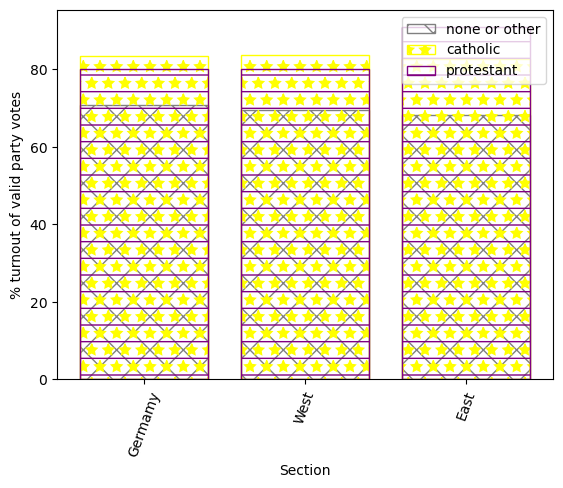

In [155]:
listf=['Germamy','West','East']
plt.bar(listf,rel[2,0,:],facecolor='none',edgecolor='gray',hatch='\\/',label='none or other') 
plt.bar(listf,rel[0,0,:],facecolor='none',edgecolor='yellow',hatch='*',label='catholic') 
plt.bar(listf,rel[1,0,:],facecolor='none',edgecolor='purple',hatch='-',label='protestant') 
plt.legend(loc="best")
plt.xticks(rotation=70)
plt.ylabel("% turnout of valid party votes")
plt.xlabel("Section")
#plt.title("East Germany")

Now we look at the party shares of valid votes. 

Text(0.5, 1.0, 'Full Germany')

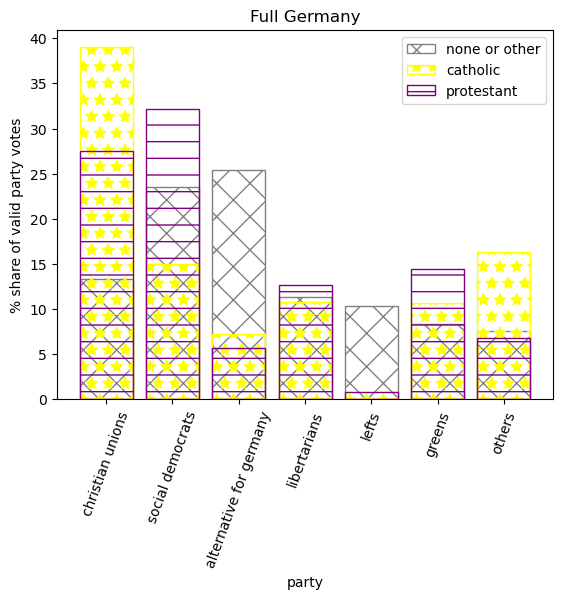

In [160]:
plt.bar(listp3,100*rel[2,2:9,0]/rel[2,0,0],facecolor='none',edgecolor='gray',hatch='\\/',label='none or other') 
plt.bar(listp3,100*rel[0,2:9,0]/rel[0,0,0],facecolor='none',edgecolor='yellow',hatch='*',label='catholic') 
plt.bar(listp3,100*rel[1,2:9,0]/rel[1,0,0],facecolor='none',edgecolor='purple',hatch='-',label='protestant') 
plt.legend(loc="best")
plt.xticks(rotation=70)
plt.ylabel("% share of valid party votes")
plt.xlabel("party")
plt.title("Full Germany")

Text(0.5, 1.0, 'West Germany')

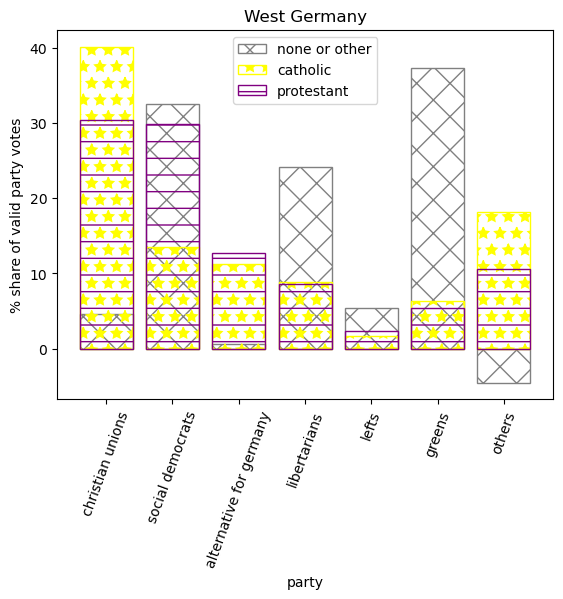

In [162]:
plt.bar(listp3,rel[2,2:9,1]/rel[2,0,1]*100,facecolor='none',edgecolor='gray',hatch='\\/',label='none or other') 
plt.bar(listp3,rel[0,2:9,1]/rel[0,0,1]*100,facecolor='none',edgecolor='yellow',hatch='*',label='catholic') 
plt.bar(listp3,rel[1,2:9,1]/rel[1,0,1]*100,facecolor='none',edgecolor='purple',hatch='-',label='protestant') 
plt.legend(loc="best")
plt.xticks(rotation=70)
plt.ylabel("% share of valid party votes")
plt.xlabel("party")
plt.title("West Germany")

Text(0.5, 1.0, 'East Germany')

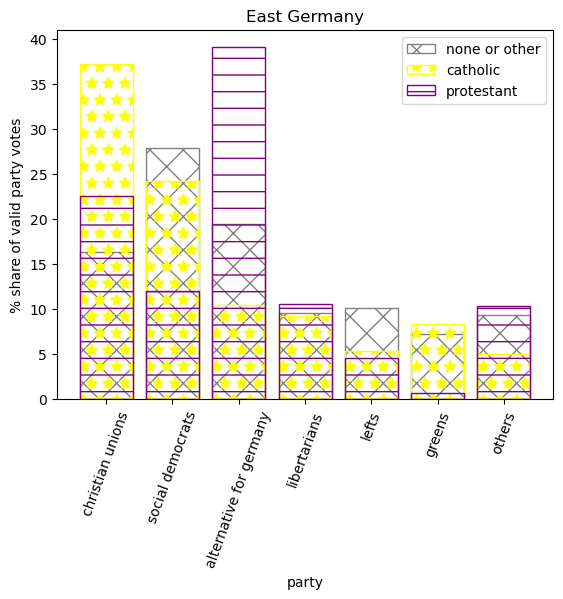

In [164]:
plt.bar(listp3,rel[2,2:9,2]/rel[2,0,2]*100,facecolor='none',edgecolor='gray',hatch='\\/',label='none or other') 
plt.bar(listp3,rel[0,2:9,2]/rel[0,0,2]*100,facecolor='none',edgecolor='yellow',hatch='*',label='catholic') 
plt.bar(listp3,rel[1,2:9,2]/rel[1,0,2]*100,facecolor='none',edgecolor='purple',hatch='-',label='protestant') 
plt.legend(loc="best")
plt.xticks(rotation=70)
plt.ylabel("% share of valid party votes")
plt.xlabel("party")
plt.title("East Germany")

While the results are mostly plausible there seem to be some problems, most obvious for other parties of other reliigion in Western Germany, were a negative fraction is obtained which is not possible. There are several possible reasons like too much outdated census data, differences between the census population and eligible voters and correlation with other properties. 

In [ ]:
We plot the data for other parties in Western Germany below. 

Text(0.5, 1.0, 'West Germany')

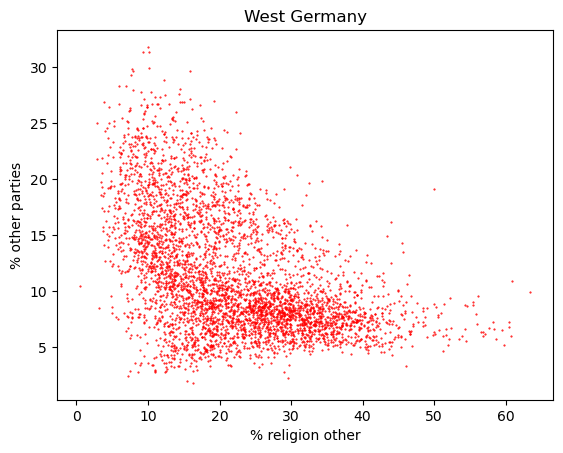

In [174]:

plt.plot(100-featrw['religion_catholic']-featrw['religion_protestant'],100*(tarrw['others_party_votes'])/tarrw['valid_votes_party_votes'],'o',ms=0.5,color='red') 
#plt.legend(loc="best")
plt.xlabel("% religion other")
plt.ylabel("% other parties")
plt.title("West Germany")

It is visisble that the result for 100% requires extrapolation and is such less relaible. Further it is visible the data follows not a simple linear relation. 

Text(0.5, 0, 'Section')

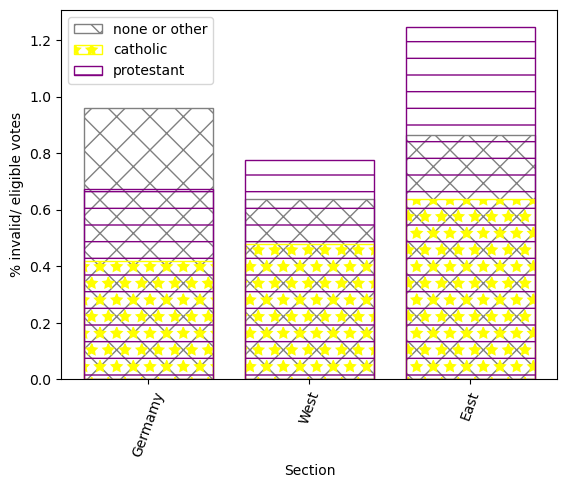

In [166]:
#invalid votes, not important for problem in the way it is set up and numbers are small, thus likely omitted at the end
plt.bar(listf,rel[2,1,:],facecolor='none',edgecolor='gray',hatch='\\/',label='none or other') 
plt.bar(listf,rel[0,1,:],facecolor='none',edgecolor='yellow',hatch='*',label='catholic') 
plt.bar(listf,rel[1,1,:],facecolor='none',edgecolor='purple',hatch='-',label='protestant') 
plt.legend(loc="best")
plt.xticks(rotation=70)
plt.ylabel("% invalid/ eligible votes")
plt.xlabel("Section")
#plt.title("East Germany")


In [ ]:
#next remove features linear fit still should be not totally degenrated at the beginning

In [179]:
print(cdf2)

             AGS_12  RS_Land  RS_RB_NUTS2  RS_Kreis   RS_VB  RS_Gemeinde  \
0       10010000000        1          0.0       1.0     0.0          0.0   
1       10020000000        1          0.0       2.0     0.0          0.0   
2       10030000000        1          0.0       3.0     0.0          0.0   
3       10040000000        1          0.0       4.0     0.0          0.0   
4       10510011011        1          0.0      51.0    11.0         11.0   
...             ...      ...          ...       ...     ...          ...   
11334  160775009049       16          0.0      77.0  5009.0         49.0   
11335  160775009051       16          0.0      77.0  5009.0         51.0   
11336  160775050012       16          0.0      77.0  5050.0         12.0   
11337  160775050017       16          0.0      77.0  5050.0         17.0   
11338  160775050039       16          0.0      77.0  5050.0         39.0   

                         Name  Reg_Hier  population  gender_total  ...  \
0            

/tmp/ipykernel_4196/1080477335.py:1: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  print(cdf2)


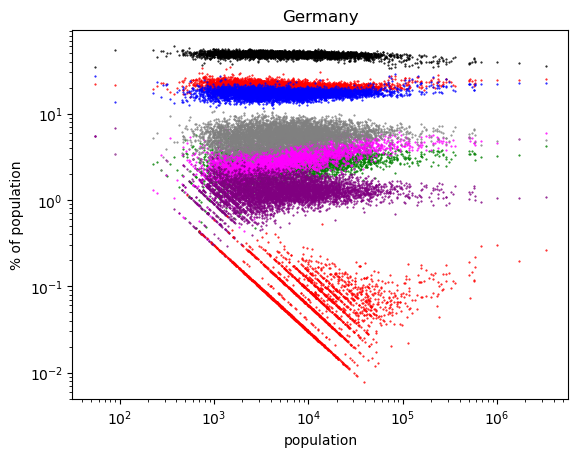

In [197]:
plt.plot(sel2['population'],100*sel2['single_male']/sel2['population'],'o',ms=0.5,color='red',label='single male') 
plt.plot(sel2['population'],100*sel2['single_female']/sel2['population'],'o',ms=0.5,color='blue',label='single female')
plt.plot(sel2['population'],100*sel2['married_total']/sel2['population'],'o',ms=0.5,color='black',label='married')
plt.plot(sel2['population'],100*sel2['divorced_male']/sel2['population'],'o',ms=0.5,color='green',label='divorced male')
plt.plot(sel2['population'],100*sel2['divorced_female']/sel2['population'],'o',ms=0.5,color='magenta',label='divorced female')
plt.plot(sel2['population'],100*sel2['widowed_male']/sel2['population'],'o',ms=0.5,color='purple',label='widowed male')
plt.plot(sel2['population'],100*sel2['widowed_female']/sel2['population'],'o',ms=0.5,color='gray',label='widowed female')
plt.plot(sel2['population'],100*sel2['civil_union_total']/sel2['population'],'o',ms=0.5,color='red',label='civil union')

#plt.legend(loc="best")
plt.xlabel("population")
plt.ylabel("% of population")
plt.title("Germany")
plt.xscale("log")
plt.yscale("log")

In [ ]:
#excluding bad quality at low numbers means some bias towards positive number for small units, some size limit would be good maybe 